In [612]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

In [613]:
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

In [614]:
def annotate_bar(ax, type='barv', position='outside', data=None):
    """
    Menambahkan teks label pada barplot

    Parameters:
    ax (Axes): axes yang ingin ditambahkan teks
    type (str): tipe dari barplot, 'barv' untuk tipe vertikal dan 'barh' untuk tipe horizontal
    position (str): posisi dari teks label, 'outside' untuk diluar bar dan 'inside' untuk didalam bar
    data (list, Series): data label, khusus untuk posisi 'inside'
    """
    if position == 'outside':
        if type == 'barv':
            for p in ax.patches:
                ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')
        elif type == 'barh':
            for p in ax.patches:
                ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                            ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10, color='black')
    elif position == 'inside':
        if data is None:
            raise ValueError("Data harus ada untuk 'inside' position")

        for patch, label in zip(ax.patches, data):
            if type == 'barv':
                height = patch.get_height()
                width = patch.get_width()
                x = patch.get_x() + width / 2
                y = patch.get_y() + height / 2
                alignment = 'center'
                vertical_alignment = 'center'
                ax.text(x, y, f'{label:,.0f}', ha=alignment, va=vertical_alignment, fontsize=10, color='black')
            elif type == 'barh':
                width = patch.get_width()
                height = patch.get_height()
                x = patch.get_x() + width / 2
                y = patch.get_y() + height / 2
                alignment = 'center'
                vertical_alignment = 'center'
                ax.text(x, y, f'{label:,.0f}', ha=alignment, va=vertical_alignment, fontsize=10, color='black')

---
## ***Introduction***

Sebuah perusahaan *developer software* ingin melakukan strategi marketing untuk tahun yang akan datang. Untuk memahami karakteristik market yang ada, perusahaan tersebut merekrut *data analyst* untuk melakukan analisis **karakteristik market dari tahun-tahun sebelumnya**

---
## ***Problem Statement***

Perusahaan ingin mengetahui karakteristik market yang ada dari segi **penjualan dan profit** berdasarkan **produk** yang ditawarkan. Informasi ini akan membantu perusahaan tersebut dalam menentukan **strategi marketing yang lebih sesuai** sehingga bisa didapat **penjualan yang lebih tinggi dan menguntungkan**

Akan dicoba untuk menjawab pertanyaan:
1. Bagaimana kondisi market perusahaan tersebut?
1. Apakah strategi penjualan yang telah digunakan perusahaan tersebut memadai market?

---
## ***Data***

Akan dilakukan *import* dataset awal berupa `SaaS-Sales.csv` dengan sumber data [SaaS-Sales](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales) dan melihat 5 baris teratas dan terbawah.

In [615]:
df = pd.read_csv('SaaS-Sales.csv')

# Menampilkan 5 baris teratas dan terbawah
display(df.head(), df.tail())

Row ID          Order ID  Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017   Energy        SMB              FinanceHub  QLIW57KZUV   
2         1056   Energy  Strategic              FinanceHub  JI6BVL70HQ   
3         1031   Energy        SMB          ContactMatcher  DE9GJKGD44   
4         1031   Energy        SMB  Marketing Suite - Gold  OIF7NY23WD   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

Row ID          Order ID Order Date  Date Key       Contact Name  \
9989    9990  EMEA-2020-110422  1/22/2020  20200122          Dan Allan   
9990    9991  AMER-2023-121258  2/27/2023  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258  2/27/2023  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258  2/27/2023  20230227  Anthony Sanderson   
9993    9994  AMER-2023-119914   5/5/2023  20230505   Jasmine Springer   

            Country       City Region Subregion           Customer  \
9989        Germany    Hamburg   EMEA   EU-WEST  Johnson & Johnson   
9990  United States  Milwaukee   AMER     NAMER   American Express   
9991  United States  Milwaukee   AMER     NAMER   American Express   
9992  United States  Milwaukee   AMER     NAMER   American Express   
9993  United States     Dallas   AMER     NAMER            Comcast   

      Customer ID        Industry Segment              Product     License  \
9989         1055      Healthcare     SMB  SaaS Connector Pack  ETHXMB5TMD   
9990         1005         Finance     SMB  SaaS Connector Pack  LYHOKTRY7L   
9991         1005         Finance     SMB       Site Analytics  I5SVMI6M88   
9992         1005         Finance     SMB              Support  JHLW4P6LQ2   
9993         1022  Communications     SMB              OneView  3NTBV9B3PS   

        Sales  Quantity  Discount   Profit  
9989   25.248         3       0.2   4.1028  
9990   91.960         2       0.0  15.6332  
9991  258.576         2       0.2  19.3932  
9992   29.600         4       0.0  13.3200  
9993  243.160         2       0.0  72.9480

Dataset tersebut memuat informasi transaksi suatu perusahaan terkait penjualan perangkat lunak untuk *sales* dan *marketing* teruntuk perusahaan lain (B2B). Tiap-tiap baris pada dataset memuat informasi **satu transaksi produk**. Informasi yang termuat antara lain mengenai informasi umum *customer*, produk yang terjual, serta keuntungan yang didapat.

Berikut adalah kolom-kolom yang terdapat pada dataset beserta penjelasannya

<div align="center">

| No | Nama Kolom | Tipe Data | Keterangan |
| ---- | ---- | ---- | ---- | 
| 1. | Row ID | Kategorikal Nominal | Penanda unik untuk tiap transaksi |
| 2. | Order ID | Kategorikal Nominal | Penanda unik untuk tiap pemesanan |
| 3. | Order Date | Numerikal Diskrit | Tanggal pemesanan | 
| 4. | Date Key | Numerikal Diskrit | Representasi numerik dari tanggal pemesanan (YYYYMMDD) |
| 5. | Contact Name | Kategorikal Nominal | Nama pemesan |
| 6. | Country | Kategorikal Nominal | Negara asal pemesanan |
| 7. | City | Kategorikal Nominal | Kota asal pemesanan |
| 8. | Region | Kategorikal Nominal | Region asal pemesanan |
| 9. | Subregion | Kategorikal Nominal | Subregion asal pemesanan |
| 10. | Customer | Kategorikal Nominal | Perusahaan pemesan |
| 11. | Customer ID | Kategorikal Nominal | Penanda unik untuk tiap perusanaan pemesan |
| 12. | Industry | Kategorikal Nominal | Fokus industri perusahaan pemesan |
| 13. | Segment | Kategorikal Nominal | Segmen dari perusahaan pemesan |
| 14. | Product | Kategorikal Nominal | Produk yang dipesan |
| 15. | License | Kategorikal Nominal | Kode lisensi produk |
| 16. | Sales | Numerikal Kontinyu | Total penjualan tiap transaksi (dalam US$) |
| 17. | Quantity | Numerikal Diskrit | Banyaknya produk yang dipesan |
| 18. | Discount | Numerikal Kontinyu | Diskon yang diberikan, berupa persen |
| 19. | Profit | Numerikal Kontinyu | Keuntungan yang didapat tiap transaksi (dalam US$) |

</div>

---
## ***Data Understanding***

Sebelum analisis data dilakukan, akan dilakukan *data understanding* untuk memperoleh pemahaman yang lebih detail dari dataset yang diperoleh. Dengan adanya pemahaman data ini, diharapkan ketidakwajaran data dapat diidentifikasi yang nantinya akan ditindaklanjuti pada proses *data cleaning*

Berikut adalah informasi umum mengenai dataset `SaaS-Sales`

In [616]:
print(f'Jumlah baris pada dataset: {df.shape[0]}')
print(f'Jumlah kolom pada dataset: {df.shape[1]}\n')

df.info()

Jumlah baris pada dataset: 9994
Jumlah kolom pada dataset: 19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount

In [617]:
# Pengecekkan data null
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [618]:
# Pengecekkan data duplikat
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 0


In [619]:
# Nilai unik pada masing-masing kolom

pd.set_option('display.max_colwidth', 100)

list_unik = []
for col in df.columns :
    list_unik.append([col, df[col].nunique(), df[col].unique()])

tabel_unik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_unik)
tabel_unik

Column Name  Number of Unique  \
0         Row ID              9994   
1       Order ID              5009   
2     Order Date              1237   
3       Date Key              1237   
4   Contact Name               793   
5        Country                48   
6           City               262   
7         Region                 3   
8      Subregion                12   
9       Customer                99   
10   Customer ID                99   
11      Industry                10   
12       Segment                 3   
13       Product                14   
14       License              9994   
15         Sales              5825   
16      Quantity                14   
17      Discount                12   
18        Profit              7287   

                                                                                          Unique Sample  
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, ...  
1   [EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-...  
2   [11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/...  
3   [20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200...  
4   [Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Mo...  
5   [Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Aust...  
6   [Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San...  
7                                                                                     [EMEA, AMER, APJ]  
8                            [UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]  
9   [Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, H...  
10  [1017, 1056, 1031, 1065, 1062, 1066, 1074, 1087, 1047, 1099, 1048, 1025, 1063, 1043, 1051, 1083,...  
11  [Energy, Finance, Tech, Healthcare, Manufacturing, Retail, Consumer Products, Misc, Transportati...  
12                                                                         [SMB, Strategic, Enterprise]  
13  [Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatB...  
14  [16GRM07R1K, QLIW57KZUV, JI6BVL70HQ, DE9GJKGD44, OIF7NY23WD, 8RM88WFOAE, 4SYTVM0746, 07842ES7DY,...  
15  [261.96, 731.94, 14.62, 957.5775, 22.368, 48.86, 7.28, 907.152, 18.504, 114.9, 1706.184, 911.424...  
16                                                      [2, 3, 5, 7, 4, 6, 9, 1, 8, 14, 11, 13, 10, 12]  
17                                      [0.0, 0.45, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6, 0.32, 0.1, 0.4, 0.15]  
18  [41.9136, 219.582, 6.8714, -383.031, 2.5164, 14.1694, 1.9656, 90.7152, 5.7825, 34.47, 85.3092, 6...

In [735]:
tabel_unik.to_excel('Tabel unik.xlsx')

In [620]:
# Statistik deskriptif untuk kolom numerik
df.describe()

Row ID      Date Key  Customer ID         Sales     Quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  1101.000000  22638.480000    14.000000   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  8399.976000

Berdasarkan informasi umum diatas, dapat dilihat bahwa:
1. Dataset terdiri dari **9994 baris** dan **19 kolom**. 
2. Untuk tiap-tiap baris dan kolom **tidak didapati** **missing value**. 
3. Dataset `SaaS-Sales` **tidak memiliki data duplikat**
4. Penjelasan terkait kolom `Region`:

<div align="center">

| Region | Keterangan |
| ---- | ---- |
| EMEA | Europe, Middle East, and Africa |
| AMER | Americas |
| APJ | Asia-Pacific and Japan |

</div>

5. Penjelasan terkait kolom `Subregion`:

<div align="center">

| Subregion | Keterangan |
| ---- | ---- |
| UKIR | United Kingdom and Ireland|
| NAMER | North America |
| EU-WEST | Western Europe |
| NOR | Nordic Region |
| JAPN | Japan |
| EU | Europe |
| MEA | Middle East and Africa |
| LATAM | Latin America |
| ANZ | Australia and New Zealand |
| APAC | Asia-Pacific |
| IND | India |
| EU-EAST | Eastern Europe |

</div>

Dapat dilihat juga ketidakwajaran data yaitu:
1. *Order Date* yang seharusnya dalam format `datetime` tersimpan dalam format `object`.
2. Kolom `Row ID` tidak relevan dan tidak diperlukan untuk analisis.
3. Kolom `Contact Name` tidak relevan dan tidak diperlukan untuk analisis.
4. Kolom `License` tidak relevan dan tidak diperlukan untuk analisis.
5. Kolom `Order Date` dan `Date Key` repetitif sehingga salah satunya dapat dihilangkan. Akan dilakukan validasi dari kedua kolom terlebih dahulu.
6. Kolom `Order ID` memiliki nilai yang repetitif terhadap kolom lainnya (`Region` - `Order Date`(dalam tahun) - *Uniqe Code*).
7. Kolom `Customer ID` dan `Customer` memiliki arti nilai yang sama.
8. Kolom `Sales` dan `Profit` belum cukup untuk menggambarkan kasus penjualan secara menyeluruh. Diperlukan analisis lebih lanjut
9. Kolom dengan satuan keuangan (`Sales` dan `Profit`) tidak memperhitungkan faktor inflasi sehingga *value* yang tertera **tidak setara** dengan *value* di jangka waktu yang berbeda

---
## ***Data Cleaning & Preprocessing***

### 1. Mengubah tipe data `Order Date` menjadi format `datetime`

In [621]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [622]:
df.head()

Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017   Energy        SMB              FinanceHub  QLIW57KZUV   
2         1056   Energy  Strategic              FinanceHub  JI6BVL70HQ   
3         1031   Energy        SMB          ContactMatcher  DE9GJKGD44   
4         1031   Energy        SMB  Marketing Suite - Gold  OIF7NY23WD   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

### 2. Melakukan validasi data `Order Date` dengan `Date Key`
Validasi data ini dilakukan dengan mengubah format kolom `Date Key` menjadi bentuk `datetime`. Setelah itu, dilakukan pengecekkan dengan kolom `Order Date`. Kedua kolom seharusnya memiliki nilai yang sama. Apabila ditemukan nilai yang tak sama, akan dilakukan analisis lebih lanjut.

In [623]:
# Mengubah format Date Key menjadi bentuk datetime
from datetime import datetime

df['Date Key'] = df['Date Key'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))
df.head()

Row ID          Order ID Order Date    Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  2022-11-09     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  2022-11-09     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  2022-06-13  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  2021-10-11      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  2021-10-11      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017   Energy        SMB              FinanceHub  QLIW57KZUV   
2         1056   Energy  Strategic              FinanceHub  JI6BVL70HQ   
3         1031   Energy        SMB          ContactMatcher  DE9GJKGD44   
4         1031   Energy        SMB  Marketing Suite - Gold  OIF7NY23WD   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

In [624]:
# Melakukan boolean masking untuk nilai antara kolom Order Date dengan Date Key
selisih = df[df['Order Date'] != df['Date Key']]
selisih

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: []

Dari hasil validasi diatas, didapat bahwa kolom `Order Date` dan `Date Key` **bernilai sama**. Hal ini menandakan kedua kolom memiliki nilai yang **valid**. Dikarenakan kedua kolom memiliki nilai dan informasi yang sama, kolom `Date Key` akan dihilangkan

In [625]:
df.drop(columns=['Date Key'], inplace=True)
df.head()

Row ID          Order ID Order Date    Contact Name        Country  \
0       1  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland   
1       2  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland   
2       3  AMER-2022-138688 2022-06-13  Deirdre Bailey  United States   
3       4  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany   
4       5  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany   

            City Region Subregion           Customer  Customer ID Industry  \
0         Dublin   EMEA      UKIR            Chevron         1017   Energy   
1         Dublin   EMEA      UKIR            Chevron         1017   Energy   
2  New York City   AMER     NAMER        Phillips 66         1056   Energy   
3      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy   
4      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy   

     Segment                 Product     License     Sales  Quantity  \
0        SMB         Marketing Suite  16GRM07R1K  261.9600         2   
1        SMB              FinanceHub  QLIW57KZUV  731.9400         3   
2  Strategic              FinanceHub  JI6BVL70HQ   14.6200         2   
3        SMB          ContactMatcher  DE9GJKGD44  957.5775         5   
4        SMB  Marketing Suite - Gold  OIF7NY23WD   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

### 3. Menghilangkan kolom yang tidak relevan untuk analisis
Berikut kolom-kolom yang dirasa tidak diperlukan dalam melakukan analisis beserta alasannya:
- `Row ID`: Penanda baris dan sudah diwakili oleh `index`
- `Contact Name`: Kurang relevan untuk analisis yang terfokus pada penjualan
- `License`: Kurang relevan untuk analisis yang terfokus pada penjualan
- `Customer ID`: Kurang mendeskripsikan data dan sulit dipahami, sudah terwakilkan oleh kolom `Customer` (Banyak data unik untuk `Customer ID` = `Customer`)

In [626]:
df.drop(columns=['Row ID', 'Contact Name', 'License', 'Customer ID'], inplace=True)
df.head()

Order ID Order Date        Country           City Region Subregion  \
0  EMEA-2022-152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1  EMEA-2022-152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2  AMER-2022-138688 2022-06-13  United States  New York City   AMER     NAMER   
3  EMEA-2021-108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4  EMEA-2021-108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  
0         2      0.00   41.9136  
1         3      0.00  219.5820  
2         2      0.00    6.8714  
3         5      0.45 -383.0310  
4         2      0.20    2.5164

### 4. Menyederhanakan kolom `Order ID`
Seperti yang telah dijabarkan sebelumnya, kolom `Order ID` memiliki nilai yang repetitif terhadap kolom lainnya (`Region` - `Order Date`(dalam tahun) - *Uniqe Code*). Akan dilakukan penyederhanaan sehingga hanya bernilai *unique code*

In [627]:
df['Order ID'] = df['Order ID'].apply(lambda x: x[-6:])
df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  
0         2      0.00   41.9136  
1         3      0.00  219.5820  
2         2      0.00    6.8714  
3         5      0.45 -383.0310  
4         2      0.20    2.5164

### 5. Melakukan penambahan kolom `Unit Price` dan `Cost` untuk tiap-tiap transaksi
Berdasarkan dataset mentah `SaaS-Sales`, kolom `Sales` memiliki definisi total penjualan untuk satu transaksi. Berdasarkan definisi tersebut, dapat dibentuk persamaan:
$$ \text{Sales} = (\text{Unit Price} * \text{Quantity}) * (\text{1 - Discount(\%)}) $$
Berdasarkan rumus diatas, dapat dibentuk kolom baru `Unit Price` seperti berikut.

In [628]:
df['Unit Price'] = df['Sales'] / (df['Quantity'] * (1 - df['Discount']))
df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  Unit Price  
0         2      0.00   41.9136      130.98  
1         3      0.00  219.5820      243.98  
2         2      0.00    6.8714        7.31  
3         5      0.45 -383.0310      348.21  
4         2      0.20    2.5164       13.98

Berdasarkan kolom yang tersedia, dapat ditentukan pula variabel biaya atau `Cost`. Variabel tersebut dapat menandakan biaya yang dikeluarkan untuk memproduksi suatu produk, dalam hal ini berupa *software*. Berdasarkan variabel-variabel yang telah didapat, dapat dibentuk persamaan:
$$ \text{Profit} = (\text{Sales} - \text{Cost}) / \text{Quantity} $$
Berdasarkan rumus diatas, dapat dibentuk kolom baru `Cost` seperti berikut.

In [629]:
df['Cost'] = (df['Sales'] - df['Profit'])/df['Quantity']
df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  Unit Price      Cost  
0         2      0.00   41.9136      130.98  110.0232  
1         3      0.00  219.5820      243.98  170.7860  
2         2      0.00    6.8714        7.31    3.8743  
3         5      0.45 -383.0310      348.21  268.1217  
4         2      0.20    2.5164       13.98    9.9258

### 6. Melakukan pengecekkan kolom `Country`, `City`, `Region`, dan `Subregion`
Pengecekkan atau validasi kolom-kolom tersebut akan didasari dengan pembagian negara berdasarkan **UN Geoscheme** (dapat dilihat pada [UN Geoscheme](https://unstats.un.org/unsd/methodology/m49/)). Tujuan dilakukannya validasi kolom-kolom tersebut agar hasil analisis yang dilakukan dapat konsisten dan sesuai dengan peraturan terbaru. Berikut adalah pembagian untuk tiap-tiap kolom tersebut.

In [630]:
region_subregion = {
    'EMEA': ['UKIR', 'EU-WEST', 'EU-EAST', 'EU', 'MEA', 'NOR'],
    'AMER': ['NAMER', 'LATAM'],
    'APJ': ['JAPN', 'ANZ', 'APAC', 'IND']
}

subregion_country = {
    'UKIR': ['Ireland', 'United Kingdom'],
    'NAMER': ['United States', 'Canada'],
    'EU-WEST': ['Germany', 'France', 'Luxembourg', 'Belgium', 'Netherlands', 'Austria'],
    'NOR': ['Sweden', 'Norway', 'Denmark', 'Finland', 'Iceland'],
    'JAPN': ['Japan'],
    'EU': ['Italy', 'Spain', 'Portugal', 'Greece', 'Slovenia'],
    'MEA': ['Turkey', 'Israel', 'Saudi Arabia', 'United Arab Emirates', 'Egypt', 'Qatar', 'South Africa'],
    'LATAM': ['Costa Rica', 'Brazil', 'Chile', 'Mexico', 'Colombia', 'Argentina'],
    'ANZ': ['Australia', 'New Zealand'],
    'APAC': ['Philippines', 'Singapore', 'China', 'Indonesia', 'Taiwan', 'South Korea'],
    'IND': ['India'],
    'EU-EAST': ['Russia', 'Poland', 'Czech Republic', 'Ukraine', 'Croatia']
}

country_city = {
    'Ireland': ['Dublin', 'Cork', 'Limerick'],
    'United States': ['Alexandria', 'Lancaster', 'San Antonio', 'Indianapolis', 'Louisville', 'New York City', 'Los Angeles', 'San Jose', 'Aurora', 'Newark', 'Chicago', 'Raleigh', 'Providence', 'Oklahoma City', 'Seattle', 'Detroit', 'Lafayette', 'Jacksonville', 'Long Beach', 'Miami', 'Yonkers', 'Roswell', 'Baltimore', 'Atlanta', 'Jackson', 'Springfield', 'Richmond', 'Huntsville', 'Tampa', 'Virginia Beach', 'Philadelphia', 'Columbia', 'Oakland', 'Dallas', 'Phoenix', 'Bristol', 'Anaheim', 'Austin', 'Burlington', 'Sacramento', 'Fort Worth', 'Houston', 'Nashville', 'Lakewood', 'Arlington', 'Fresno', 'Lakeland', 'Buffalo', 'Cleveland', 'Charlotte', 'Tucson', 'Tulsa', 'Denver', 'Las Vegas', 'Minneapolis', 'Omaha', 'Franklin', 'Tallahassee', 'Everett', 'Clinton', 'Memphis', 'San Francisco', 'Hamilton', 'Miami', 'San Diego', 'Lawrence', 'Los Angeles', 'San Jose', 'Rochester', 'Columbus', 'Milwaukee', 'Henderson', 'Wilmington'],
    'Germany': ['Stuttgart', 'Hanover', 'Cologne', 'Munich', 'Leipzig', 'Dresden', 'Berlin', 'Frankfurt', 'Hamburg', 'Mannheim', 'Nuremberg'],
    'Sweden': ['Stockholm', 'Uppsala', 'Malmö', 'Gothenburg'],
    'Canada': ['Victoria', 'Quebec', 'Hamilton','Toronto', 'Vancouver', 'Montreal', 'Ottawa', 'Regina', 'Calgary', 'Winnipeg'],
    'Japan': ['Saitama', 'Tokyo', 'Aichi', 'Chiba', 'Osaka', 'Hyogo', 'Fukuoka', 'Kanagawa', 'Shizuoka', 'Kyoto', 'Hiroshima', 'Ibaraki', 'Sapporo'],
    'Italy': ['Naples', 'Rome', 'Genoa', 'Milan', 'Turin', 'Florence', 'Bologna', 'Brescia', 'Bari', 'Palermo', 'Catania', 'Venice'],
    'Turkey': ['Ankara', 'Istanbul', 'Izmir', 'Bursa'],
    'Costa Rica': ['San José'],
    'France': ['Paris', 'Lyon', 'Nice', 'Nantes', 'Marseille'],
    'Australia': ['Wollongong', 'Sydney', 'Geelong', 'Melbourne', 'Adelaide', 'Brisbane', 'Canberra', 'Hobart', 'Perth', 'Gold Coast'],
    'Luxembourg': ['Luxembourg'],
    'Brazil': ['Salvador', 'Rio de Janeiro', 'São Paulo', 'Brasília', 'Manaus', 'Belo Horizonte'],
    'Philippines': ['Davao City', 'Manila', 'Quezon City'],
    'India': ['Kolkata', 'Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Hyderabad'],
    'United Kingdom': ['London', 'Brighton', 'Liverpool', 'Leicester', 'Cardiff', 'Edinburgh', 'Leeds', 'Glasgow', 'Birmingham', 'Bristol', 'Manchester', 'Woking', 'Belfast', 'Newcastle'],
    'Chile': ['Puente Alto', 'Santiago', 'Antofagasta'],
    'Spain': ['Madrid', 'Seville', 'Murcia', 'Barcelona', 'Valencia', 'Alicante', 'Granada', 'Zaragoza'],
    'South Africa': ['Cape Town', 'Johannesburg'],
    'Portugal': ['Lisboa', 'Porto'],
    'Colombia': ['Bogotá', 'Medellín', 'Cali'],
    'Belgium': ['Brussels', 'Antwerp', 'Ghent'],
    'Russia': ['Moscow', 'St Petersburg', 'Yekaterinburg', 'Novosibirsk', 'Nizhny Novogorod'],
    'Netherlands': ['The Hague', 'Amsterdam', 'Rotterdam'],
    'Mexico': ['Mexico City', 'Monterrey', 'Guadalajara', 'Puerto Vallarta', 'Tijuana', 'Toluca', 'Cabo San Lucas', 'Cancun'],
    'Poland': ['Warsaw', 'Krakow'],
    'Singapore': ['Singapore'],
    'New Zealand': ['Wellington', 'Auckland'],
    'Czech Republic': ['Prague', 'Ostrava', 'Brno'],
    'Saudi Arabia': ['Riyadh', 'Dhahran', 'Jeddah'],
    'Argentina': ['Córdoba', 'Buenos Aires', 'Mendoza', 'Rosario'],
    'South Korea': ['Seoul', 'Incheon', 'Daegu', 'Busan', 'Gwangju'],
    'Finland': ['Helsinki', 'Tampere', 'Espoo', 'Vantaa'],
    'Israel': ['Tel Aviv', 'Jerusalem'],
    'Norway': ['Hordaland', 'Oslo'],
    'Ukraine': ['Kyiv', 'Kharkiv', 'Odessa', 'Donetsk'],
    'United Arab Emirates': ['Abu Dhabi', 'Dubai'],
    'Greece': ['Athens', 'Thessaloniki'],
    'China': ['Shanghai', 'Shenzhen', 'Beijing', 'Guangzhou', 'Tianjin', 'Chengdu', 'Suzhou'],
    'Austria': ['Vienna'],
    'Indonesia': ['Jakarta', 'Bandung', 'Surabaya'],
    'Egypt': ['Cairo', 'Alexandria'],
    'Denmark': ['Copenhagen'],
    'Croatia': ['Zagreb'],
    'Taiwan': ['Taipei'],
    'Qatar': ['Doha'],
    'Slovenia': ['Ljubljana'],
    'Iceland': ['Reykjavík']
}

Dapat dibentuk suatu fungsi validasi yang akan menandakan apakah keempat kolom tersebut nilainya sudah berkesesuaian atau belum.

In [631]:
def validasi_region(data):
    city = data['City']
    country = data['Country']
    region = data['Region']
    subregion = data['Subregion']

    errors = []

    if city not in country_city[country]:
        errors.append("city didn't match the country")

    if country not in subregion_country[subregion]:
        errors.append("country didn't match the subregion")

    if subregion not in region_subregion[region]:
        errors.append("subregion didn't match the region")

    if errors:
        return f"FALSE, {', '.join(errors)}"
    
    else:
        return "TRUE"

Dibentuk kolom bantu baru `Check` sebagai kolom validasi.

In [632]:
df['Check'] = df.apply(validasi_region, axis=1)
df[df['Check'].str.contains('FALSE')].head()

Order ID Order Date   Country    City Region Subregion     Customer  \
69    119823 2022-06-05     Spain  Madrid   EMEA   EU-WEST   Fannie Mae   
79    127208 2022-06-13  Portugal  Lisboa   EMEA   EU-WEST  Tyson Foods   
80    127208 2022-06-13  Portugal  Lisboa   EMEA   EU-WEST  Tyson Foods   
144   155376 2023-12-23    Poland  Warsaw   EMEA   EU-WEST      Comcast   
308   126774 2023-04-16     Spain  Madrid   EMEA   EU-WEST        Bosch   

              Industry    Segment         Product   Sales  Quantity  Discount  \
69             Finance        SMB         Support   75.88         2       0.0   
79   Consumer Products  Strategic         OneView  208.16         1       0.0   
80   Consumer Products  Strategic  ContactMatcher   16.74         3       0.0   
144     Communications        SMB         OneView  839.43         3       0.0   
308               Tech        SMB  ChatBot Plugin    4.89         1       0.0   

       Profit  Unit Price      Cost                                      Check  
69    35.6636       37.94   20.1082  FALSE, country didn't match the subregion  
79    56.2032      208.16  151.9568  FALSE, country didn't match the subregion  
80     8.0352        5.58    2.9016  FALSE, country didn't match the subregion  
144  218.2518      279.81  207.0594  FALSE, country didn't match the subregion  
308    2.0049        4.89    2.8851  FALSE, country didn't match the subregion

In [633]:
df_check = df.groupby('Check', as_index=False).agg(
    number_of_data=('Check', 'count')
)
df_check

Check  number_of_data
0  FALSE, country didn't match the subregion             442
1                                       TRUE            9552

Berdasarkan tabel diatas, dapat dilihat bahwa sebanyak **442 data** terindikasi memiliki **nama negara** yang tidak sesuai dengan **subregionnya**. Untuk sisa data (sebanyak 9552 data) telah sesuai dengan aturan yang ditentukan. Berikut adalah penanganan data *mismatch* untuk kasus yang ada.

`Country didn't match the Subregion`

In [634]:
df[df['Check'] == "FALSE, country didn't match the subregion"].head()

Order ID Order Date   Country    City Region Subregion     Customer  \
69    119823 2022-06-05     Spain  Madrid   EMEA   EU-WEST   Fannie Mae   
79    127208 2022-06-13  Portugal  Lisboa   EMEA   EU-WEST  Tyson Foods   
80    127208 2022-06-13  Portugal  Lisboa   EMEA   EU-WEST  Tyson Foods   
144   155376 2023-12-23    Poland  Warsaw   EMEA   EU-WEST      Comcast   
308   126774 2023-04-16     Spain  Madrid   EMEA   EU-WEST        Bosch   

              Industry    Segment         Product   Sales  Quantity  Discount  \
69             Finance        SMB         Support   75.88         2       0.0   
79   Consumer Products  Strategic         OneView  208.16         1       0.0   
80   Consumer Products  Strategic  ContactMatcher   16.74         3       0.0   
144     Communications        SMB         OneView  839.43         3       0.0   
308               Tech        SMB  ChatBot Plugin    4.89         1       0.0   

       Profit  Unit Price      Cost                                      Check  
69    35.6636       37.94   20.1082  FALSE, country didn't match the subregion  
79    56.2032      208.16  151.9568  FALSE, country didn't match the subregion  
80     8.0352        5.58    2.9016  FALSE, country didn't match the subregion  
144  218.2518      279.81  207.0594  FALSE, country didn't match the subregion  
308    2.0049        4.89    2.8851  FALSE, country didn't match the subregion

Berdasarkan data yang telah diperoleh sebelumnya, dapat dilakukan perbaikan kolom `Subregion` dengan membentuk fungsi seperti berikut.

In [635]:
def subregion_fix(data):    
    for key, value in subregion_country.items():
        for i in range(len(value)):
            if data['Country'] == value[i]:
                return key

In [636]:
df['Subregion'] = df.apply(subregion_fix, axis=1)
df['Check'] = df.apply(validasi_region, axis=1)
df[df['Check'].str.contains('FALSE')]

Empty DataFrame
Columns: [Order ID, Order Date, Country, City, Region, Subregion, Customer, Industry, Segment, Product, Sales, Quantity, Discount, Profit, Unit Price, Cost, Check]
Index: []

Berdasarkan tabel diatas, dapat dilihat dataset sudah tidak memiliki `Subregion` dan `Country` yang mismatch. Kolom bantu `Check` akan di*drop* karena sudah tidak dibutuhkan lagi untuk analisis selanjutnya.

In [637]:
df.drop(columns='Check', inplace=True)
df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  Unit Price      Cost  
0         2      0.00   41.9136      130.98  110.0232  
1         3      0.00  219.5820      243.98  170.7860  
2         2      0.00    6.8714        7.31    3.8743  
3         5      0.45 -383.0310      348.21  268.1217  
4         2      0.20    2.5164       13.98    9.9258

### 7. Perhitungan ***Present Value*** untuk kolom-kolom dalam satuan keuangan
Analisis yang akan dilakukan banyak melibatkan perbandingan keuntungan, harga, atau metrics lainnya yang melibatkan keuangan dalam jangka tahunan. Oleh karena itu, akan dilakukan konversi nilai mata uang ke dalam *Net Present Value* (NPV) untuk memastikan konsistensi dan akurasi dalam perbandingan. NPV dapat memberikan informasi yang lebih jelas tanpa adanya gangguan dari fluktuasi mata uang dan inflasi.

Digunakan tanggal **1 Januari 2024** sebagai acuan dari *Present Value*. Dengan menggunakan *Consumer Price Index* atau CPI dapat ditentukan laju inflasi pada suatu waktu ke waktu acuan seperti berikut:

$$ f = \frac{\text{CPI}_{end} - \text{CPI}_{start}}{\text{CPI}_{start}} $$

dengan:
- $ f $: laju inflasi (%)
- $ \text{CPI}_{end} $: indeks harga konsumen (CPI) pada periode terakhir (dalam kasus ini: **1 Januari 2024**)
- $ \text{CPI}_{start} $: indeks harga konsumen (CPI) pada periode pertama

Setelah dilakukan perhitungan laju inflasi untuk tiap-tiap data, dapat ditentukan besaran *Present Value* dengan perumusan seperti berikut.

$$ \text{PV}_{2024} = \text{PV}_{start} \times (1+f) $$

Berikut adalah data indeks harga konsumen (CPI) bulanan *United States* (sumber: [US Inflation](https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/))

In [638]:
CPI = {
    '2020-01': 257.971,
    '2020-02': 258.678,
    '2020-03': 258.115,
    '2020-04': 256.389,
    '2020-05': 256.394,
    '2020-06': 257.797,
    '2020-07': 259.101,
    '2020-08': 259.918,
    '2020-09': 260.280,
    '2020-10': 260.388,
    '2020-11': 260.229,
    '2020-12': 260.474,
    '2021-01': 261.582,
    '2021-02': 263.014,
    '2021-03': 264.877,
    '2021-04': 267.054,
    '2021-05': 269.195,
    '2021-06': 271.696,
    '2021-07': 273.003,
    '2021-08': 273.567,
    '2021-09': 274.310,
    '2021-10': 276.589,
    '2021-11': 277.948,
    '2021-12': 278.802,
    '2022-01': 281.148,
    '2022-02': 283.716,
    '2022-03': 287.504,
    '2022-04': 289.109,
    '2022-05': 292.296,
    '2022-06': 296.311,
    '2022-07': 296.276,
    '2022-08': 296.171,
    '2022-09': 296.808,
    '2022-10': 298.012,
    '2022-11': 297.711,
    '2022-12': 296.797,
    '2023-01': 299.170,
    '2023-02': 300.840,
    '2023-03': 301.836,
    '2023-04': 303.363,
    '2023-05': 304.127,
    '2023-06': 305.109,
    '2023-07': 305.691,
    '2023-08': 307.026,
    '2023-09': 307.789,
    '2023-10': 307.671,
    '2023-11': 307.051,
    '2023-12': 306.746,
}

Dapat dibentuk fungsi untuk mencari laju inflasi seperti berikut.

In [639]:
def inflation_rate(data):
    start = data['Order Date'].strftime('%Y-%m')
    CPIend = CPI['2023-12']
    CPIstart = CPI[start]
    return (CPIend - CPIstart)/CPIstart

In [640]:
df.loc[:, 'Inflation Rate'] = df.apply(inflation_rate, axis=1)
df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  Unit Price      Cost  Inflation Rate  
0         2      0.00   41.9136      130.98  110.0232        0.030348  
1         3      0.00  219.5820      243.98  170.7860        0.030348  
2         2      0.00    6.8714        7.31    3.8743        0.035216  
3         5      0.45 -383.0310      348.21  268.1217        0.109032  
4         2      0.20    2.5164       13.98    9.9258        0.109032

Dapat ditentukan nilai *Present Value* untuk masing-masing data seperti berikut.

In [641]:
df.loc[:, 'Unit Price (PV)'] = round(df['Unit Price'] * (1+df['Inflation Rate']), 4)
df.loc[:, 'Sales (PV)'] = round(df['Sales'] * (1+df['Inflation Rate']), 4)
df.loc[:, 'Profit (PV)'] = round(df['Profit'] * (1+df['Inflation Rate']), 4)
df.loc[:, 'Cost (PV)'] = round(df['Cost'] * (1+df['Inflation Rate']), 4)

df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product  ...  \
0            Chevron   Energy        SMB         Marketing Suite  ...   
1            Chevron   Energy        SMB              FinanceHub  ...   
2        Phillips 66   Energy  Strategic              FinanceHub  ...   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  ...   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold  ...   

   Quantity  Discount    Profit  Unit Price      Cost  Inflation Rate  \
0         2      0.00   41.9136      130.98  110.0232        0.030348   
1         3      0.00  219.5820      243.98  170.7860        0.030348   
2         2      0.00    6.8714        7.31    3.8743        0.035216   
3         5      0.45 -383.0310      348.21  268.1217        0.109032   
4         2      0.20    2.5164       13.98    9.9258        0.109032   

   Unit Price (PV)  Sales (PV)  Profit (PV)  Cost (PV)  
0         134.9550    269.9100      43.1856   113.3622  
1         251.3844    754.1531     226.2459   175.9691  
2           7.5674     15.1349       7.1134     4.0107  
3         386.1760   1061.9839    -424.7936   297.3555  
4          15.5043     24.8068       2.7908    11.0080  

[5 rows x 21 columns]

Kolom yang tidak merepresentasikan nilai uang untuk masa ini dapat di*drop*

In [642]:
df.drop(columns=['Unit Price', 'Sales', 'Profit', 'Cost', 'Inflation Rate'], inplace=True)
df.head()

Order ID Order Date        Country           City Region Subregion  \
0   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
1   152156 2022-11-09        Ireland         Dublin   EMEA      UKIR   
2   138688 2022-06-13  United States  New York City   AMER     NAMER   
3   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   
4   108966 2021-10-11        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product  Quantity  \
0            Chevron   Energy        SMB         Marketing Suite         2   
1            Chevron   Energy        SMB              FinanceHub         3   
2        Phillips 66   Energy  Strategic              FinanceHub         2   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher         5   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold         2   

   Discount  Unit Price (PV)  Sales (PV)  Profit (PV)  Cost (PV)  
0      0.00         134.9550    269.9100      43.1856   113.3622  
1      0.00         251.3844    754.1531     226.2459   175.9691  
2      0.00           7.5674     15.1349       7.1134     4.0107  
3      0.45         386.1760   1061.9839    -424.7936   297.3555  
4      0.20          15.5043     24.8068       2.7908    11.0080

Akan dilakukan penyusunan ulang kolom agar alur pembacaan data lebih mudah dipahami

In [643]:
df = df[['Order ID', 'Order Date', 'Region', 'Subregion', 'Country', 'City', 'Customer', 'Industry', 'Segment', 'Product', 'Unit Price (PV)', 'Quantity', 'Discount', 'Sales (PV)', 'Profit (PV)', 'Cost (PV)']]
df.head()

Order ID Order Date Region Subregion        Country           City  \
0   152156 2022-11-09   EMEA      UKIR        Ireland         Dublin   
1   152156 2022-11-09   EMEA      UKIR        Ireland         Dublin   
2   138688 2022-06-13   AMER     NAMER  United States  New York City   
3   108966 2021-10-11   EMEA   EU-WEST        Germany      Stuttgart   
4   108966 2021-10-11   EMEA   EU-WEST        Germany      Stuttgart   

            Customer Industry    Segment                 Product  \
0            Chevron   Energy        SMB         Marketing Suite   
1            Chevron   Energy        SMB              FinanceHub   
2        Phillips 66   Energy  Strategic              FinanceHub   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   

   Unit Price (PV)  Quantity  Discount  Sales (PV)  Profit (PV)  Cost (PV)  
0         134.9550         2      0.00    269.9100      43.1856   113.3622  
1         251.3844         3      0.00    754.1531     226.2459   175.9691  
2           7.5674         2      0.00     15.1349       7.1134     4.0107  
3         386.1760         5      0.45   1061.9839    -424.7936   297.3555  
4          15.5043         2      0.20     24.8068       2.7908    11.0080

### 8. Pengecekkan Data Duplikat
Berikut adalah pencarian data duplikat.

In [644]:
df[df.duplicated(keep=False)]

Order ID Order Date Region Subregion Country         City Customer  \
3405   150119 2020-04-23   AMER     LATAM  Mexico  Mexico City   Itochu   
3406   150119 2020-04-23   AMER     LATAM  Mexico  Mexico City   Itochu   

     Industry     Segment     Product  Unit Price (PV)  Quantity  Discount  \
3405  Finance  Enterprise  FinanceHub         240.4542         2       0.3   
3406  Finance  Enterprise  FinanceHub         240.4542         2       0.3   

      Sales (PV)  Profit (PV)  Cost (PV)  
3405    336.6359     -14.4273   175.5316  
3406    336.6359     -14.4273   175.5316

Berdasarkan pengecekkan nilai duplikat diatas, ditemukan 2 data duplikat dengan keputusan yang diambil **data duplikat tidak dihilangkan**. Keputusan ini didasari oleh data duplikat yang baru muncul ketika kolom `License` dihilangkan sehingga data menjadi duplikat. Berdasarkan penjelasan konteks kolom diatas, kolom `License` bersifat unik untuk seluruh produk yang ada sehingga **dua data duplikat diatas merupakan dua transaksi yang berbeda** namun memiliki produk yang sama. Penjelasan yang memungkinkan adalah perusahaan tersebut membeli produk yang sama untuk perangkat yang berbeda dalam satu transaksi yang sama sehingga nomor `License` yang muncul akan berbeda namun kolom lainnya akan bernilai sama.

### Kesimpulan *Data Cleaning*
Berikut adalah kesimpulan dari dilakukannya *data cleaning*:
1. Seluruh kolom sudah memiliki tipe data yang sesuai dengan deskripsi kolom tersebut.
2. Kolom-kolom yang tidak diperlukan untuk analisis dihilangkan (*drop*).
3. Kolom `Region`, `Subregion`, `Country`, dan `City` telah disesuaikan dengan ketentuan yang berlaku saat ini
4. Seluruh kolom yang berisi nilai dari mata uang telah disesuaikan nilainya dengan nilai yang ditentukan (1 Januari 2024)

---
## ***Data Statistical Describe***
Setelah dilakukan *Data Cleaning*, terlebih dahulu akan dilakukan pendeskripsian data secara umum dan statistik seperti berikut.

### 1. Informasi umum data yang sudah bersih

In [645]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates()
    if len(unique_values) >= 2:
        sample_values = list(unique_values.sample(2, random_state=1).values)
    else:
        sample_values = list(unique_values.values)

    if pd.api.types.is_numeric_dtype(df[col]):
        contains_negative = df[col].lt(0).any()
    else:
        contains_negative = False

    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), sample_values, contains_negative])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample', 'containsNegative'],
                      data=listItem)

print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')
dfDesc

Jumlah baris: 9994
Jumlah kolom: 16


dataFeatures        dataType  null  unique  \
0          Order ID          object     0    5009   
1        Order Date  datetime64[ns]     0    1237   
2            Region          object     0       3   
3         Subregion          object     0      12   
4           Country          object     0      48   
5              City          object     0     262   
6          Customer          object     0      99   
7          Industry          object     0      10   
8           Segment          object     0       3   
9           Product          object     0      14   
10  Unit Price (PV)         float64     0    7991   
11         Quantity           int64     0      14   
12         Discount         float64     0      12   
13       Sales (PV)         float64     0    9651   
14      Profit (PV)         float64     0    9703   
15        Cost (PV)         float64     0    8684   

                                                      uniqueSample  \
0                                                 [101392, 150945]   
1   [2022-11-10T00:00:00.000000000, 2020-08-29T00:00:00.000000000]   
2                                                      [EMEA, APJ]   
3                                                   [EU-WEST, NOR]   
4                                            [Israel, Netherlands]   
5                                                 [Chengdu, Tokyo]   
6                                          [Alphabet, Exxon Mobil]   
7                                           [Tech, Communications]   
8                                                [SMB, Enterprise]   
9                                [Marketing Suite - Gold, OneView]   
10                                                 [8.5062, 3.194]   
11                                                          [7, 1]   
12                                                      [0.2, 0.8]   
13                                             [454.4917, 38.6848]   
14                                             [107.6829, 21.4836]   
15                                               [61.8363, 1.3068]   

    containsNegative  
0              False  
1              False  
2              False  
3              False  
4              False  
5              False  
6              False  
7              False  
8              False  
9              False  
10             False  
11             False  
12             False  
13             False  
14              True  
15             False

### 2. Statistik Deskriptif
Berikut adalah statistik deskriptif untuk kolom dengan tipe numerikal

In [646]:
df.describe()

Order Date  Unit Price (PV)     Quantity  \
count                           9994      9994.000000  9994.000000   
mean   2022-05-01 00:07:12.259355648        81.291218     3.789574   
min              2020-01-04 00:00:00         0.987000     1.000000   
25%              2021-05-23 00:00:00         6.968300     2.000000   
50%              2022-06-27 00:00:00        20.982350     3.000000   
75%              2023-05-15 00:00:00        81.312800     5.000000   
max              2023-12-31 00:00:00      8967.918900    14.000000   
std                              NaN       205.147942     2.225110   

          Discount    Sales (PV)  Profit (PV)    Cost (PV)  
count  9994.000000   9994.000000  9994.000000  9994.000000  
mean      0.156203    247.448030    30.711292    57.136117  
min       0.000000      0.446400 -6800.275600     0.544000  
25%       0.000000     18.401125     1.848125     3.887250  
50%       0.200000     58.518800     9.157350    13.869000  
75%       0.200000    224.222475    31.597450    59.526900  
max       0.800000  26903.756800  8646.158700  4842.676200  
std       0.206452    676.992910   248.415432   132.257040

Berikut adalah statistik deskriptif untuk kolom dengan tipe kategorikal

In [647]:
df.describe(include=object)

Order ID Region Subregion        Country    City Customer Industry  \
count      9994   9994      9994           9994    9994     9994     9994   
unique     5009      3        12             48     262       99       10   
top      100111   EMEA     NAMER  United States  London  Allianz  Finance   
freq         14   4219      2507           2001     922      192     2127   

       Segment         Product  
count     9994            9994  
unique       3              14  
top        SMB  ContactMatcher  
freq      5191            1842

Berdasarkan tabel-tabel diatas, dapat diambil beberapa ***insight***:
1. Dataset mencakupi data penjualan untuk 5009 pemesanan
2. Dataset mencakupi data penjualan dari 4 Januari 2020 hingga 31 Desember 2023
3. Dataset mencakupi data penjualan untuk 3 region, 12 subregion, 48 negara, dan 262 kota di dunia
    - Region: EMEA (Europe, Middle East, and Africa) tercatat memiliki volume transaksi yang paling tinggi dibanding dengan region lainnya
    - Subregion: NAMER (North America) tercatat memiliki volume transaksi yang paling tinggi dibanding dengan subregion lainnya
    - Country: United States tercatat memiliki volume transaksi yang paling tinggi dibanding dengan negara lainnya
    - City: London tercatat memiliki volume transaksi yang paling tinggi dibanding dengan kota lainnya 
4. Terdapat 99 *customer* berupa perusahaan yang bergerak pada 10 industri dan 3 segmen yang beragam
    - Customer: Allianz tercatat memiliki volume transaksi yang paling tinggi dibanding dengan *customer* lainnya
    - Industry: Finance tercatat memiliki volume transaksi yang paling tinggi dibanding dengan industri lainnya
    - Segment: SMB (Small and Medium-sized Business) tercatat memiliki volume transaksi yang paling tinggi dibanding dengan segmen lainnya
5. Dataset mencakupi data penjualan untuk 14 produk yang berbeda
    - Product: ContactMatcher tercatat memiliki volume penjualan yang paling tinggi dibanding dengan produk lainnya
6. Dataset mencakupi data harga satuan produk, jumlah barang yang terjual, potongan harga, nilai penjualan, nilai keuntungan, serta biaya untuk masing-masing transaksi
    - Harga satuan (Unit Price) tertinggi untuk suatu produk mencapai $8,967.91 dan harga terendah sebesar $0.987
    - Quantity tertinggi yang terbeli untuk satu transaksi sebanyak 14 produk
    - Diskon tertinggi yang diberikan untuk satu transaksi sebesar 80%
    - Nilai penjualan (Sales) tertinggi untuk satu transaksi mencapai $26,903.75 dan nilai terendah sebesar $0.4464
    - Keuntungan (Profit) tertinggi untuk satu transaksi mencapai $8,646.15 dan kerugian terbesar untuk satu transaksi mencapai $6,800.27 (nilai negatif menyatakan kerugian)
    - Biaya (Cost) tertinggi untuk suatu produk pada satu trasaksi mencapai $4,842.67 dan biaya terendah sebesar $0.544

### 3. Distribusi Data
Berikut adalah distribusi data untuk kolom-kolom numerikal

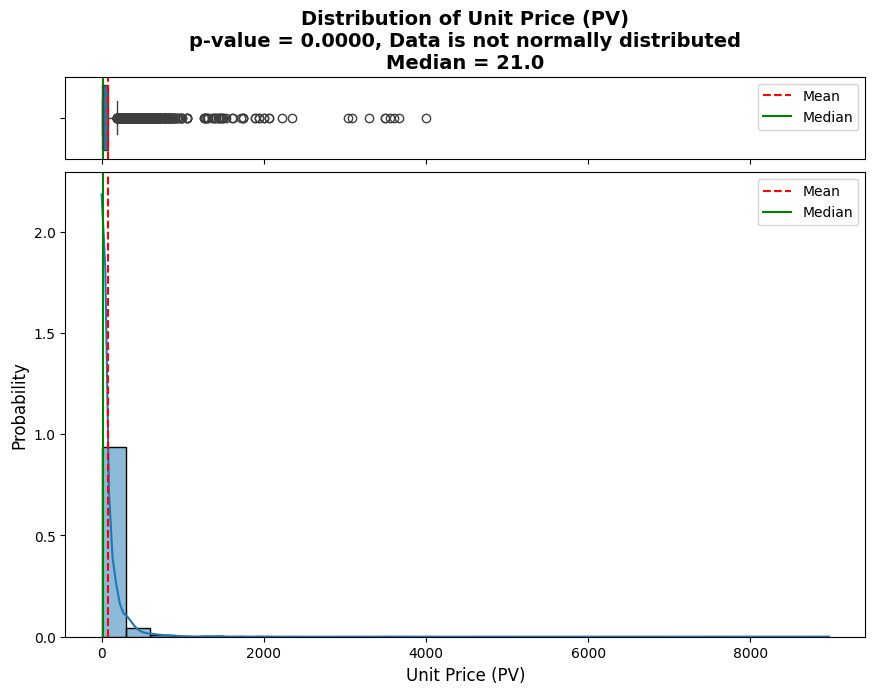

In [648]:
# Kolom Unit Price (PV)

from scipy.stats import normaltest

pvalueUP = normaltest(df['Unit Price (PV)'])[1]

if pvalueUP > 0.05:
    text = f'p-value = {pvalueUP:.4f}, Data is normally distributed'
else:
    text = f'p-value = {pvalueUP:.4f}, Data is not normally distributed'

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7), 
                               gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

ax1.set_title(f"Distribution of Unit Price (PV)\n{text}\nMedian = {df['Unit Price (PV)'].median():,.1f}", color="black", fontsize=14, fontweight='bold')

sns.boxplot(x=df['Unit Price (PV)'], ax=ax1, color="#1f77b4")
ax1.axvline(df['Unit Price (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Unit Price (PV)'].median(), color='green', linestyle='-', label='Median')
ax1.set(xlabel="")
ax1.legend(loc='upper right')

sns.histplot(data=df['Unit Price (PV)'], ax=ax2, stat="probability", kde=True, bins=30, color="#1f77b4")
ax2.axvline(df['Unit Price (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['Unit Price (PV)'].median(), color='green', linestyle='-', label='Median')

ax2.set_xlabel('Unit Price (PV)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.1)

plt.show()

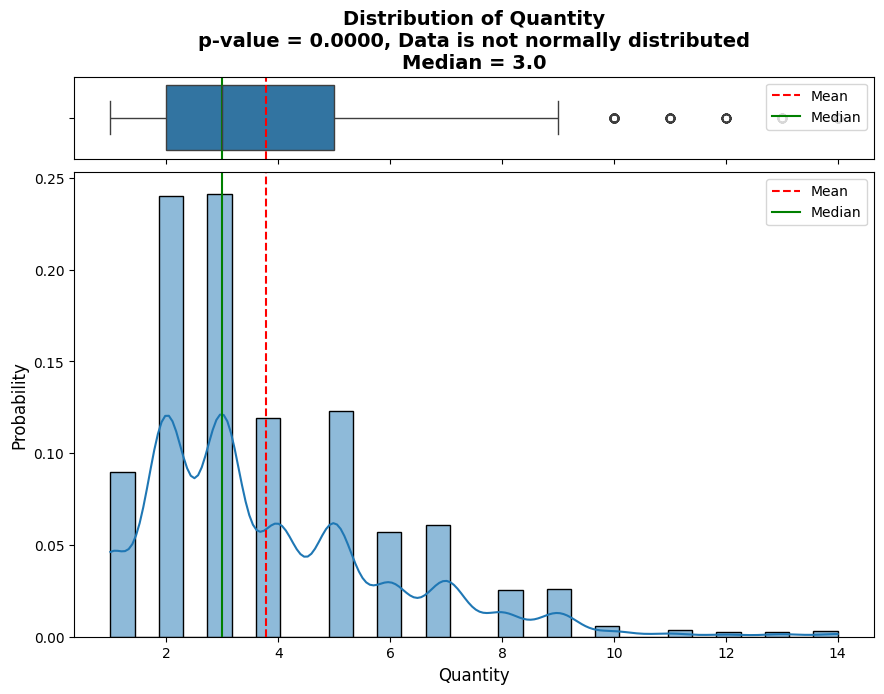

In [649]:
# Kolom Quantity

from scipy.stats import normaltest

pvalueQty = normaltest(df['Quantity'])[1]

if pvalueQty > 0.05:
    text = f'p-value = {pvalueQty:.4f}, Data is normally distributed'
else:
    text = f'p-value = {pvalueQty:.4f}, Data is not normally distributed'

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7), 
                               gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

ax1.set_title(f"Distribution of Quantity\n{text}\nMedian = {df['Quantity'].median():,.1f}", color="black", fontsize=14, fontweight='bold')

sns.boxplot(x=df['Quantity'], ax=ax1, color="#1f77b4")
ax1.axvline(df['Quantity'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Quantity'].median(), color='green', linestyle='-', label='Median')
ax1.set(xlabel="")
ax1.legend(loc='upper right')

sns.histplot(data=df['Quantity'], ax=ax2, stat="probability", kde=True, bins=30, color="#1f77b4")
ax2.axvline(df['Quantity'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['Quantity'].median(), color='green', linestyle='-', label='Median')

ax2.set_xlabel('Quantity', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.1)

plt.show()

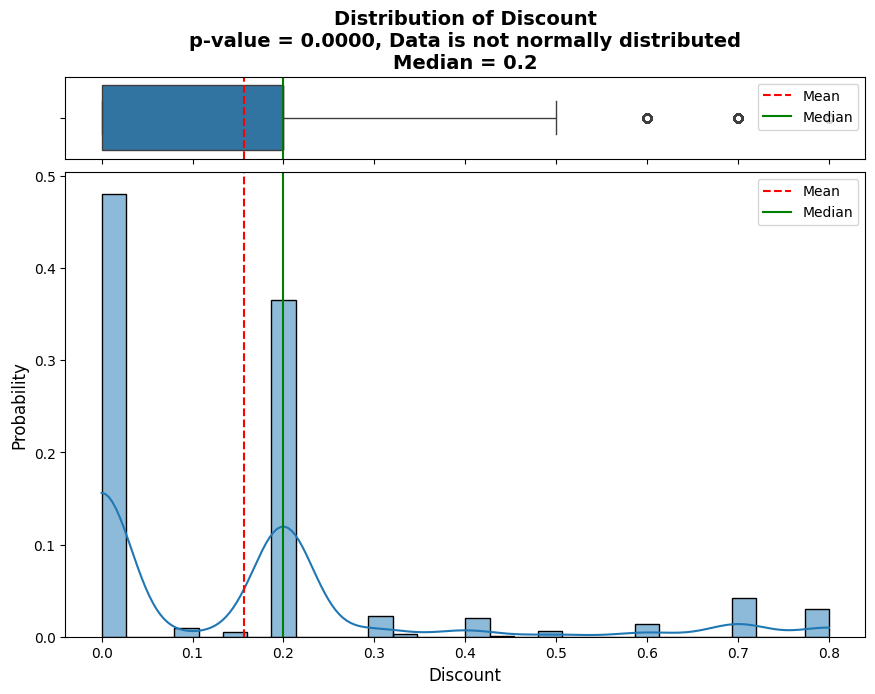

In [650]:
# Kolom Discount

from scipy.stats import normaltest

pvalueDisc = normaltest(df['Discount'])[1]

if pvalueDisc > 0.05:
    text = f'p-value = {pvalueDisc:.4f}, Data is normally distributed'
else:
    text = f'p-value = {pvalueDisc:.4f}, Data is not normally distributed'

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7), 
                               gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

ax1.set_title(f"Distribution of Discount\n{text}\nMedian = {df['Discount'].median():,.1f}", color="black", fontsize=14, fontweight='bold')

sns.boxplot(x=df['Discount'], ax=ax1, color="#1f77b4")
ax1.axvline(df['Discount'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Discount'].median(), color='green', linestyle='-', label='Median')
ax1.set(xlabel="")
ax1.legend(loc='upper right')

sns.histplot(data=df['Discount'], ax=ax2, stat="probability", kde=True, bins=30, color="#1f77b4")
ax2.axvline(df['Discount'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['Discount'].median(), color='green', linestyle='-', label='Median')

ax2.set_xlabel('Discount', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.1)

plt.show()

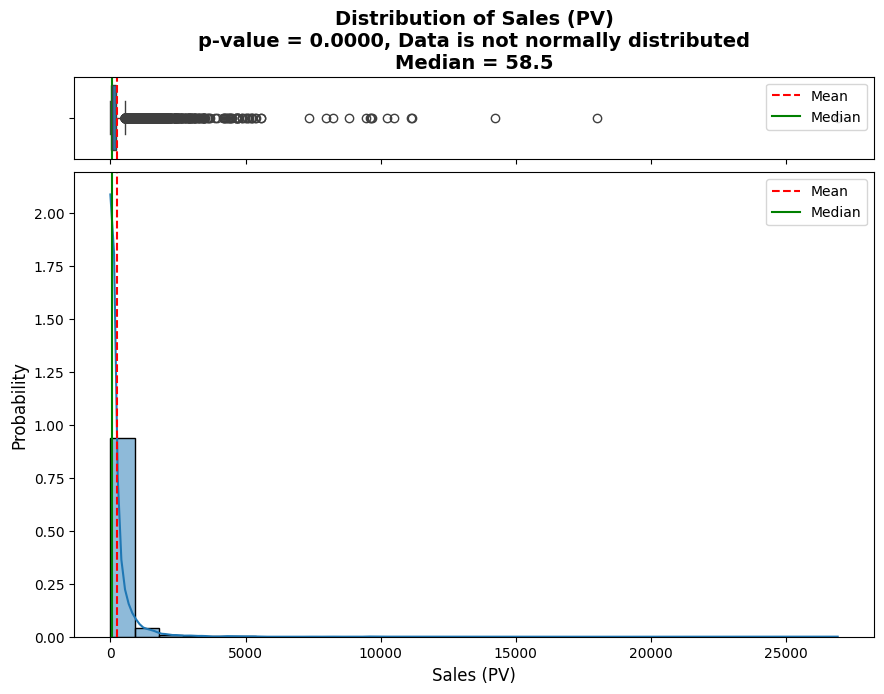

In [651]:
# Kolom Sales

from scipy.stats import normaltest

pvalueSales = normaltest(df['Sales (PV)'])[1]

if pvalueSales > 0.05:
    text = f'p-value = {pvalueSales:.4f}, Data is normally distributed'
else:
    text = f'p-value = {pvalueSales:.4f}, Data is not normally distributed'

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7), 
                               gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

ax1.set_title(f"Distribution of Sales (PV)\n{text}\nMedian = {df['Sales (PV)'].median():,.1f}", color="black", fontsize=14, fontweight='bold')

sns.boxplot(x=df['Sales (PV)'], ax=ax1, color="#1f77b4")
ax1.axvline(df['Sales (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Sales (PV)'].median(), color='green', linestyle='-', label='Median')
ax1.set(xlabel="")
ax1.legend(loc='upper right')

sns.histplot(data=df['Sales (PV)'], ax=ax2, stat="probability", kde=True, bins=30, color="#1f77b4")
ax2.axvline(df['Sales (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['Sales (PV)'].median(), color='green', linestyle='-', label='Median')

ax2.set_xlabel('Sales (PV)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.1)

plt.show()

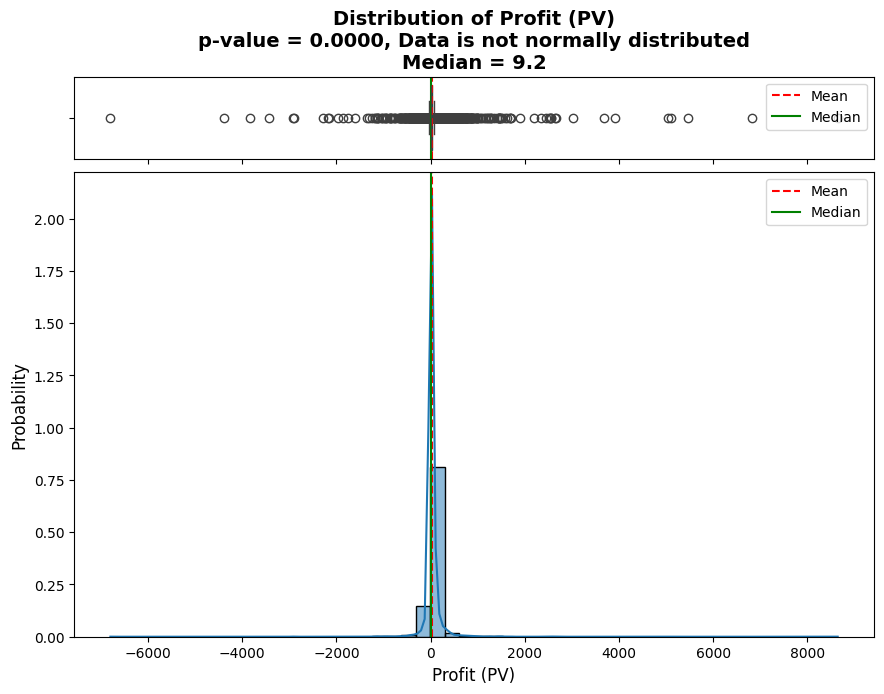

In [652]:
# Kolom Profit

from scipy.stats import normaltest

pvalueProfit = normaltest(df['Profit (PV)'])[1]

if pvalueProfit > 0.05:
    text = f'p-value = {pvalueProfit:.4f}, Data is normally distributed'
else:
    text = f'p-value = {pvalueProfit:.4f}, Data is not normally distributed'

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7), 
                               gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

ax1.set_title(f"Distribution of Profit (PV)\n{text}\nMedian = {df['Profit (PV)'].median():,.1f}", color="black", fontsize=14, fontweight='bold')

sns.boxplot(x=df['Profit (PV)'], ax=ax1, color="#1f77b4")
ax1.axvline(df['Profit (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Profit (PV)'].median(), color='green', linestyle='-', label='Median')
ax1.set(xlabel="")
ax1.legend(loc='upper right')

sns.histplot(data=df['Profit (PV)'], ax=ax2, stat="probability", kde=True, bins=50, color="#1f77b4")
ax2.axvline(df['Profit (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['Profit (PV)'].median(), color='green', linestyle='-', label='Median')

ax2.set_xlabel('Profit (PV)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.1)

plt.show()

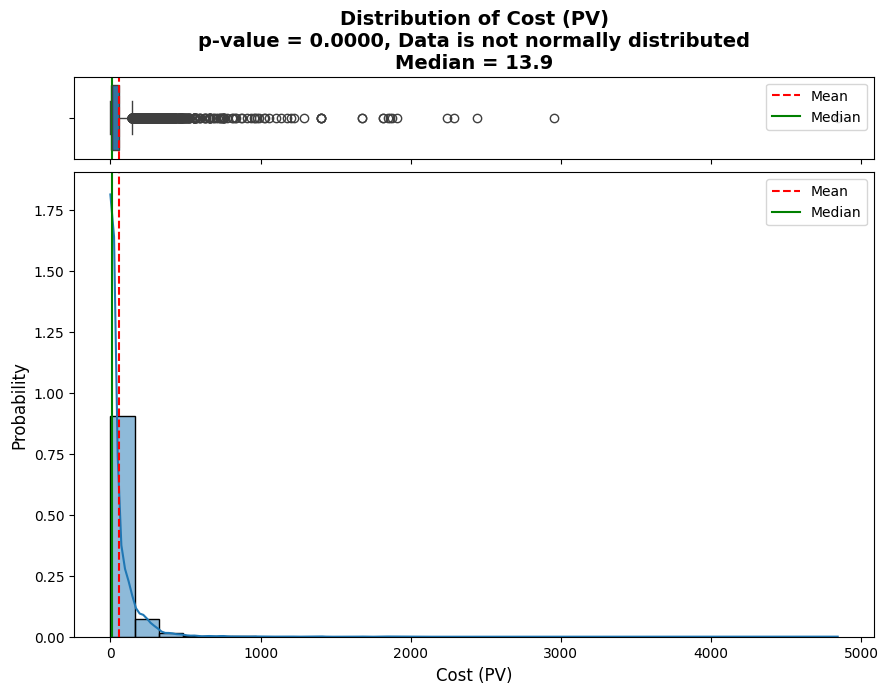

In [653]:
# Kolom Cost

from scipy.stats import normaltest

pvalueCost = normaltest(df['Cost (PV)'])[1]

if pvalueCost > 0.05:
    text = f'p-value = {pvalueCost:.4f}, Data is normally distributed'
else:
    text = f'p-value = {pvalueCost:.4f}, Data is not normally distributed'

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 7), 
                               gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

ax1.set_title(f"Distribution of Cost (PV)\n{text}\nMedian = {df['Cost (PV)'].median():,.1f}", color="black", fontsize=14, fontweight='bold')

sns.boxplot(x=df['Cost (PV)'], ax=ax1, color="#1f77b4")
ax1.axvline(df['Cost (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Cost (PV)'].median(), color='green', linestyle='-', label='Median')
ax1.set(xlabel="")
ax1.legend(loc='upper right')

sns.histplot(data=df['Cost (PV)'], ax=ax2, stat="probability", kde=True, bins=30, color="#1f77b4")
ax2.axvline(df['Cost (PV)'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['Cost (PV)'].median(), color='green', linestyle='-', label='Median')

ax2.set_xlabel('Cost (PV)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.1)

plt.show()

Dapat dilakukan pengecekan banyaknya data *outlier* pada masing-masing kolom seperti berikut.

In [654]:
def n_outlier(data):
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5

    n = len(data)
    n_upper = len(np.where(data > upper)[0])/n
    n_lower = len(np.where(data < lower)[0])/n
    return round((n_upper + n_lower)*100, 2), len(np.where(data > upper)[0])+len(np.where(data < lower)[0])

In [655]:
kolom_numerik = ['Unit Price (PV)', 'Quantity', 'Discount', 'Sales (PV)', 'Profit (PV)', 'Cost (PV)']
pvalue_list = [pvalueUP, pvalueQty, pvalueDisc, pvalueSales, pvalueProfit, pvalueCost]
pvalue_conc = ['P-Value < 0.05, Data TIDAK terdistribusi normal' if pv < 0.05 else 'P-Value > 0.05, Data terdistribusi normal' for pv in pvalue_list]
outlier_list = [n_outlier(df[i])[0] for i in kolom_numerik]
outlier_len = [n_outlier(df[i])[1] for i in kolom_numerik]

dfDesc2 = pd.DataFrame(
    data={
        'Kolom': kolom_numerik,
        'P-Value Normal Test':pvalue_list,
        'Kesimpulan Normal Test':pvalue_conc,
        'Banyak data outlier':outlier_len,
        'Persentase Outlier':outlier_list
    },
    index=[1,2,3,4,5,6]
)
dfDesc2

Kolom  P-Value Normal Test  \
1  Unit Price (PV)                  0.0   
2         Quantity                  0.0   
3         Discount                  0.0   
4       Sales (PV)                  0.0   
5      Profit (PV)                  0.0   
6        Cost (PV)                  0.0   

                            Kesimpulan Normal Test  Banyak data outlier  \
1  P-Value < 0.05, Data TIDAK terdistribusi normal                 1102   
2  P-Value < 0.05, Data TIDAK terdistribusi normal                  170   
3  P-Value < 0.05, Data TIDAK terdistribusi normal                  856   
4  P-Value < 0.05, Data TIDAK terdistribusi normal                 1176   
5  P-Value < 0.05, Data TIDAK terdistribusi normal                 1885   
6  P-Value < 0.05, Data TIDAK terdistribusi normal                 1123   

   Persentase Outlier  
1               11.03  
2                1.70  
3                8.57  
4               11.77  
5               18.86  
6               11.24

In [656]:
# df.to_excel('SaaS Bersih.xlsx', index=False)

---
## ***Data Analysis***

Akan dilakukan analisis berdasarkan beberapa variabel.

### 1. Analisis `Sales`, `Profit`, dan `Net Income`
Akan dilakukan analisis tren penjualan untuk menjawab pertanyaan:
1. Bagaimana kondisi penjualan selama 4 tahun terakhir?
2. Bagaimana kondisi keuntungan perusahaan selama 4 tahun terakhir?

Berikut adalah grafik tren `Sales` dan `Net Income` selama 4 tahun terakhir.

In [657]:
df_qsales = df.copy()

# Menambahkan kolom Year dan Quarter
df_qsales['Year'] = df_qsales['Order Date'].dt.year
df_qsales['Quarter'] = df_qsales['Order Date'].dt.quarter

# Group by Year
ysales_group = df_qsales.groupby('Year', as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Profit=('Profit (PV)', 'sum'),
    n_Transaction=('Quantity', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Median_Profit=('Profit (PV)', 'median')
)

# Group by Year dan Quarter
qsales_qroup = df_qsales.groupby(['Year', 'Quarter'], as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Profit=('Profit (PV)', 'sum'),
    n_Transaction=('Quantity', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Median_Profit=('Profit (PV)', 'median'),
    Median_Discount=('Discount', 'median')
)
# Menambahkan kolom Quarter Label
qsales_qroup['q_label'] = 'Q' + qsales_qroup['Quarter'].astype(str) + '\n' + qsales_qroup['Year'].astype(str)

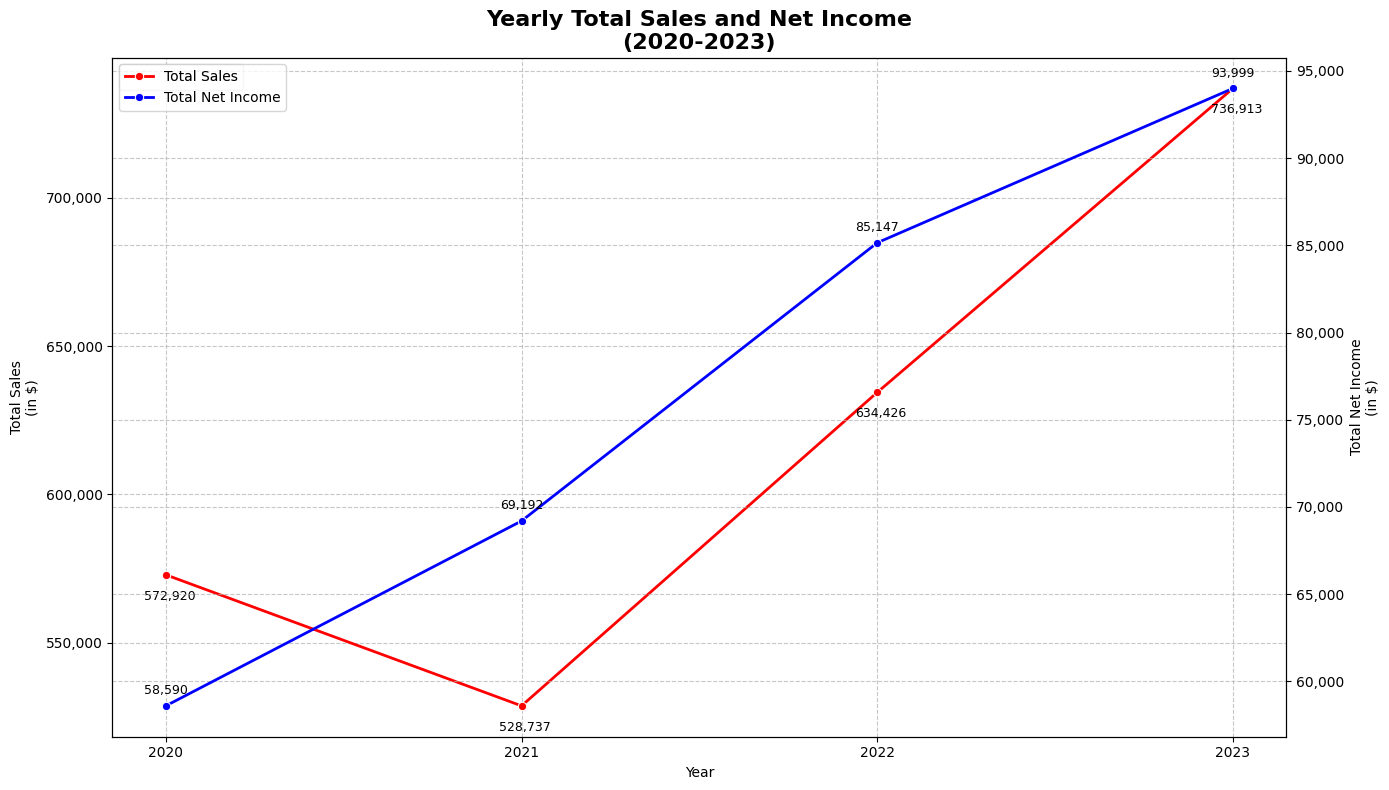

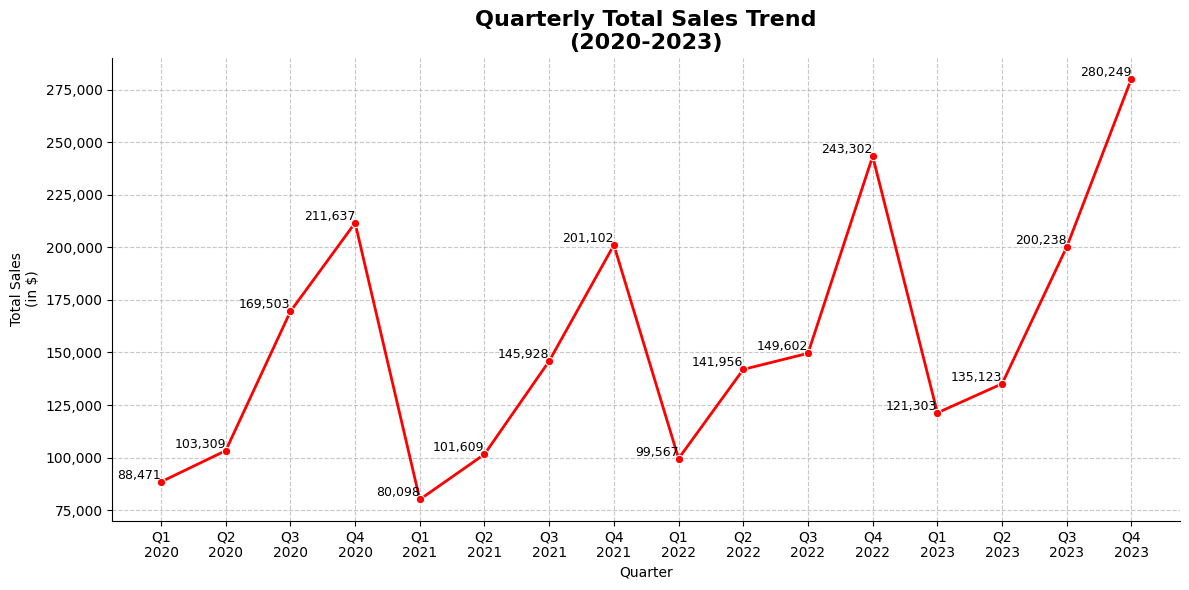

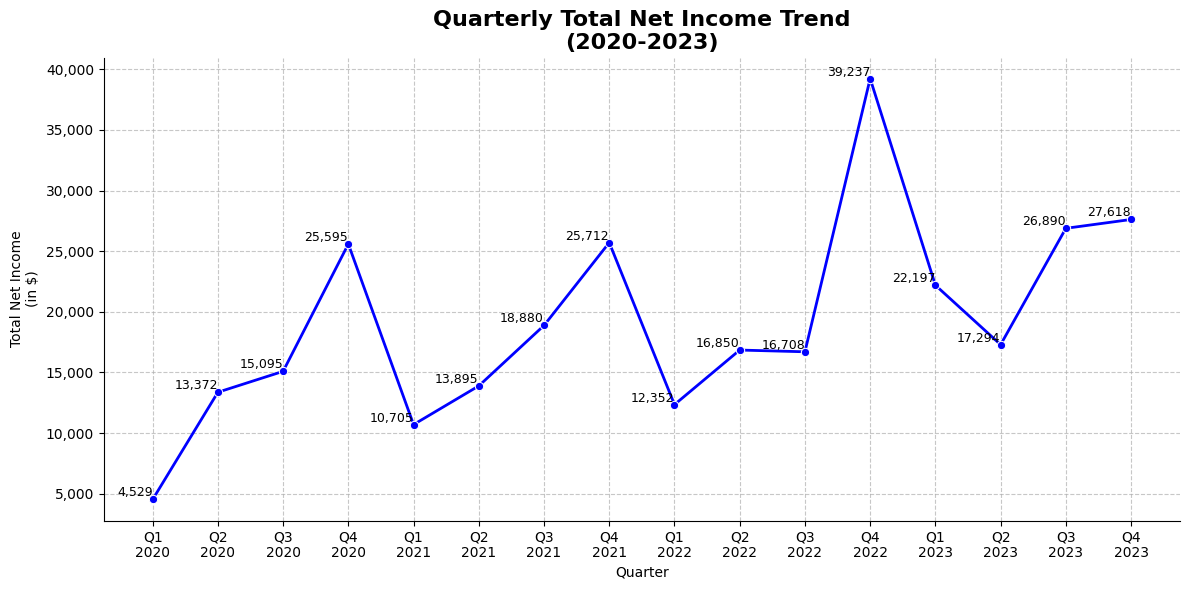

In [658]:
# Membuat grafik tren tahunan
fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(
    data=ysales_group,
    x='Year',
    y='Total_Sales',
    ax=ax,
    color='red',  
    marker='o',       
    linestyle='-',    
    linewidth=2,
    label='Total Sales',
)

ax1 = ax.twinx()

sns.lineplot(
    data=ysales_group,
    x='Year',
    y='Total_Profit',
    ax=ax1,
    color='blue',  
    marker='o',       
    linestyle='-',    
    linewidth=2     ,
    label='Total Net Income'  
)

for x, y in zip(ysales_group['Year'], ysales_group['Total_Sales']):
    ax.text(x+0.01, y-5000, f'{y:,.0f}', ha='center', va='top', fontsize=9, color='black')

for x, y in zip(ysales_group['Year'], ysales_group['Total_Profit']):
    ax1.text(x, y+500, f'{y:,.0f}', ha='center', va='bottom', fontsize=9, color='black')

ax.set(
    ylabel='Total Sales\n(in $)',
    xlabel='Year',
    title='Yearly Total Sales and Net Income\n(2020-2023)'
)

ax1.set(
    ylabel='Total Net Income\n(in $)',
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticks(ysales_group['Year'])


ax.grid(True, linestyle='--', alpha=0.7)
ax1.grid(True, linestyle='--', alpha=0.7)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

# Membuat grafik tren kuartil Sales
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=qsales_qroup,
    x='q_label',
    y='Total_Sales',
    ax=ax,
    color='red',  
    marker='o',       
    linestyle='-',    
    linewidth=2       
)

for x, y in zip(qsales_qroup['q_label'], qsales_qroup['Total_Sales']):
    ax.text(x, y, f'{y:,.0f}', ha='right', va='bottom', fontsize=9, color='black')

ax.set(
    ylabel='Total Sales\n(in $)',
    xlabel='Quarter',
    title='Quarterly Total Sales Trend\n(2020-2023)'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

despine(ax)

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Membuat grafik tren kuartil Profit
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=qsales_qroup,
    x='q_label',
    y='Total_Profit',
    ax=ax,
    color='blue',  
    marker='o',       
    linestyle='-',    
    linewidth=2       
)

for x, y in zip(qsales_qroup['q_label'], qsales_qroup['Total_Profit']):
    ax.text(x, y, f'{y:,.0f}', ha='right', va='bottom', fontsize=9, color='black')

ax.set(
    ylabel='Total Net Income\n(in $)',
    xlabel='Quarter',
    title='Quarterly Total Net Income Trend\n(2020-2023)'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

despine(ax)

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Berdasarkan grafik tren penjualan diatas, didapat *insight*:
> 1. Secara total penjualan, tahun 2023 merupakan **tahun dengan total penjualan tertinggi** dengan nilai $736,913
> 2. Secara kuartil tahun, kuartil 4 tahun 2023 merupakan **kuartil tahun dengan total penjualan tertinggi** dengan nilai $280,249
> 3. Untuk setiap tahunnya, tren total penjualan cenderung meningkat dan mengalami penurunan di tahun 2021
> 4. Untuk setiap tahunnya, total penjualan memiliki pola **peningkatan** dari Q1 ke Q4 lalu **menurun** saat memasuki Q1 tahun selanjutnya.
> 5. Untuk kuartil yang sama, nilai penjualan dari tahun ke tahun **cenderung mengalami peningkatan**. Untuk tahun 2021, total penjualan untuk kuartil yang sama **mengalami penurunan** dari tahun sebelumnya.

Salah satu faktor yang dapat menyebabkan naiknya penjualan untuk tiap-tiap quartil adalah perbedaan **volume penjualan** dari kuartil tersebut. Apabila kuartil 4 untuk setiap tahunnya memiliki proporsi penjualan yang lebih banyak, akan masuk akal apabila nilai penjualan kuartil tersebut menjadi yang tertinggi dibanding dengan kuartil lainnya. Akan dilakukan pengecekkan proporsi penjualan untuk tiap kuartil tiap tahunnya.

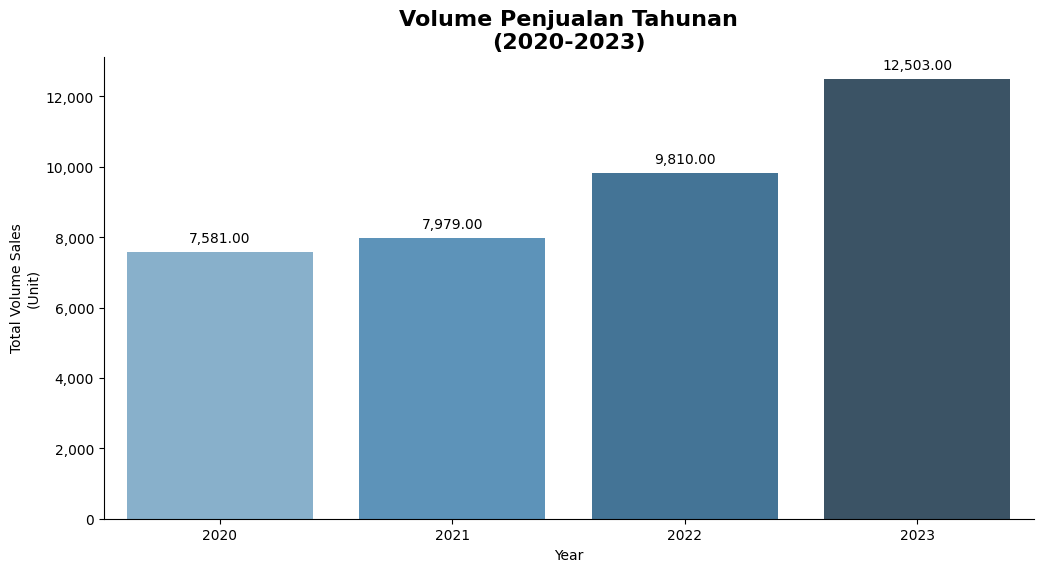

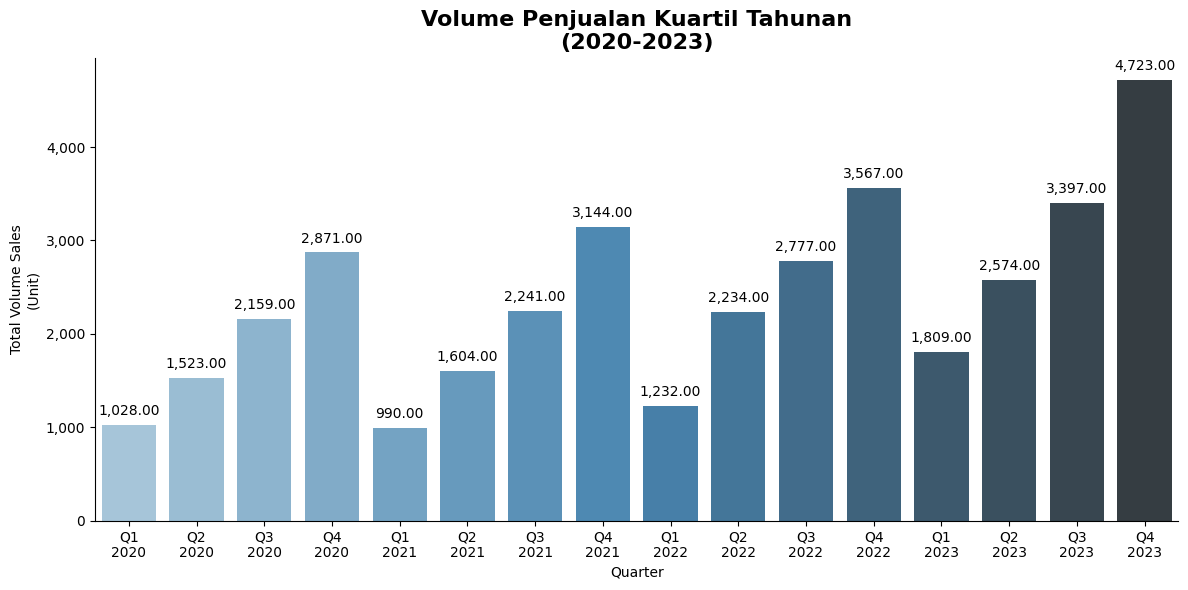

In [659]:
# Plotting yearly sales volume
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=ysales_group,
    x='Year',
    y='n_Transaction',
    ax=ax,
    palette='Blues_d'
)

ax.set(
    xlabel='Year',
    ylabel='Total Volume Sales\n(Unit)',
    title='Volume Penjualan Tahunan\n(2020-2023)'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
despine(ax)
annotate_bar(ax)

# Plotting quarterly sales volume
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=qsales_qroup,
    x='q_label',
    y='n_Transaction',
    ax=ax,
    palette='Blues_d'
)

ax.set(
    xlabel='Quarter',
    ylabel='Total Volume Sales\n(Unit)',
    title='Volume Penjualan Kuartil Tahunan\n(2020-2023)'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
despine(ax)
annotate_bar(ax)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat *insight*:
> 1. Volume penjualan **mengalami peningkatan** dari tahun ke tahun dengan volume tertinggi di tahun 2023 sebanyak 12,503 unit
> 2. Untuk kuartil yang sama, volume penjualan **cenderung mengalami peningkatan** dari tahun ke tahun dengan volume tertinggi di kuartil 4 tahun 2023 sebanyak 4,723 unit
> 3. Berdasarkan tren proporsi volume penjualan dan tingkat penjualan, cenderung **didapati pola yang sama**. Hal ini menandakan bahwa tingginya tingkat penjualan pada tren total sales **dipengaruhi oleh volume penjualan yang terjadi** 
> 4. Anomali terjadi pada tahun 2021, ditemukan volume penjualan yang meningkat dari tahun sebelumnya namun tingkat penjualan yang menurun dari tahun sebelumnya.

Dikarenakan ditemukan bahwa tingginya tingkat penjualan pada tren total sales **dipengaruhi oleh volume penjualan yang terjadi**, diperlukan analisis tambahan untuk melihat **performa penjualan** dari tahun ke tahun. Analisis tersebut akan menggunakan `Measure of Central Tendency` dari tiap-tiap kelompok data. Berdasarkan analisis pada bab sebelumnya, didapat bahwa kolom `Sales` memiliki sebaran data yang **tidak terdistribusi normal**. Oleh karena itu, digunakan *median* sebagai `Measure of Central Tendency`. 

Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa penjualan *(median sales)* untuk tiap-tiap tahunnya berbeda signifikan** dengan:
- H0: Median Sales untuk setiap tahunnya bernilai sama
- H1: Minimal ada 1 tahun yang berbeda median Sales-nya. Tetapi kita tidak tahu yang mana.

In [660]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Order Date'].dt.year==2020]['Sales (PV)'],
        df[df['Order Date'].dt.year==2021]['Sales (PV)'],
        df[df['Order Date'].dt.year==2022]['Sales (PV)'],
        df[df['Order Date'].dt.year==2023]['Sales (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 18.2376
p-value            : 0.0004
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Berdasarkan uji statistik diatas, didapat probabilitas atau `P-value` sebesar 0.0004. Dengan tingkat signifikan $ (\alpha) $ sebesar 0.05 (P-value < $\alpha$), dapat disimpulkan bahwa **H0 ditolak** atau **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 tahun dimana nilai median Sales-nya berbeda signifikan tetapi tidak tahu yang mana**. 

Pengujian dapat dilakukan terhadap performa sales untuk kuartil tahunan seperti berikut.
- H0: Median Sales untuk setiap kuartil bernilai sama
- H1: Minimal ada 1 kuartil yang berbeda median Sales-nya. Tetapi kita tidak tahu yang mana.

In [661]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[(df['Order Date'].dt.year==2020) & (df['Order Date'].dt.quarter==1)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2020) & (df['Order Date'].dt.quarter==2)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2020) & (df['Order Date'].dt.quarter==3)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2020) & (df['Order Date'].dt.quarter==4)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2021) & (df['Order Date'].dt.quarter==1)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2021) & (df['Order Date'].dt.quarter==2)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2021) & (df['Order Date'].dt.quarter==3)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2021) & (df['Order Date'].dt.quarter==4)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2022) & (df['Order Date'].dt.quarter==1)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2022) & (df['Order Date'].dt.quarter==2)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2022) & (df['Order Date'].dt.quarter==3)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2022) & (df['Order Date'].dt.quarter==4)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2023) & (df['Order Date'].dt.quarter==1)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2023) & (df['Order Date'].dt.quarter==2)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2023) & (df['Order Date'].dt.quarter==3)]['Sales (PV)'],
        df[(df['Order Date'].dt.year==2023) & (df['Order Date'].dt.quarter==4)]['Sales (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")

Kruskal-Wallis stat: 40.8123
p-value            : 0.0003


Berdasarkan uji statistik diatas, didapat probabilitas atau `P-value` sebesar 0.0003. Dengan tingkat signifikan $ (\alpha) $ sebesar 0.05 (P-value < $\alpha$), dapat disimpulkan bahwa **H0 ditolak** atau **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 kuartil dimana nilai median Sales-nya berbeda signifikan tetapi tidak tahu yang mana**. Nilai median `Sales` juga dapat dilihat dalam bentuk grafik seperti berikut.

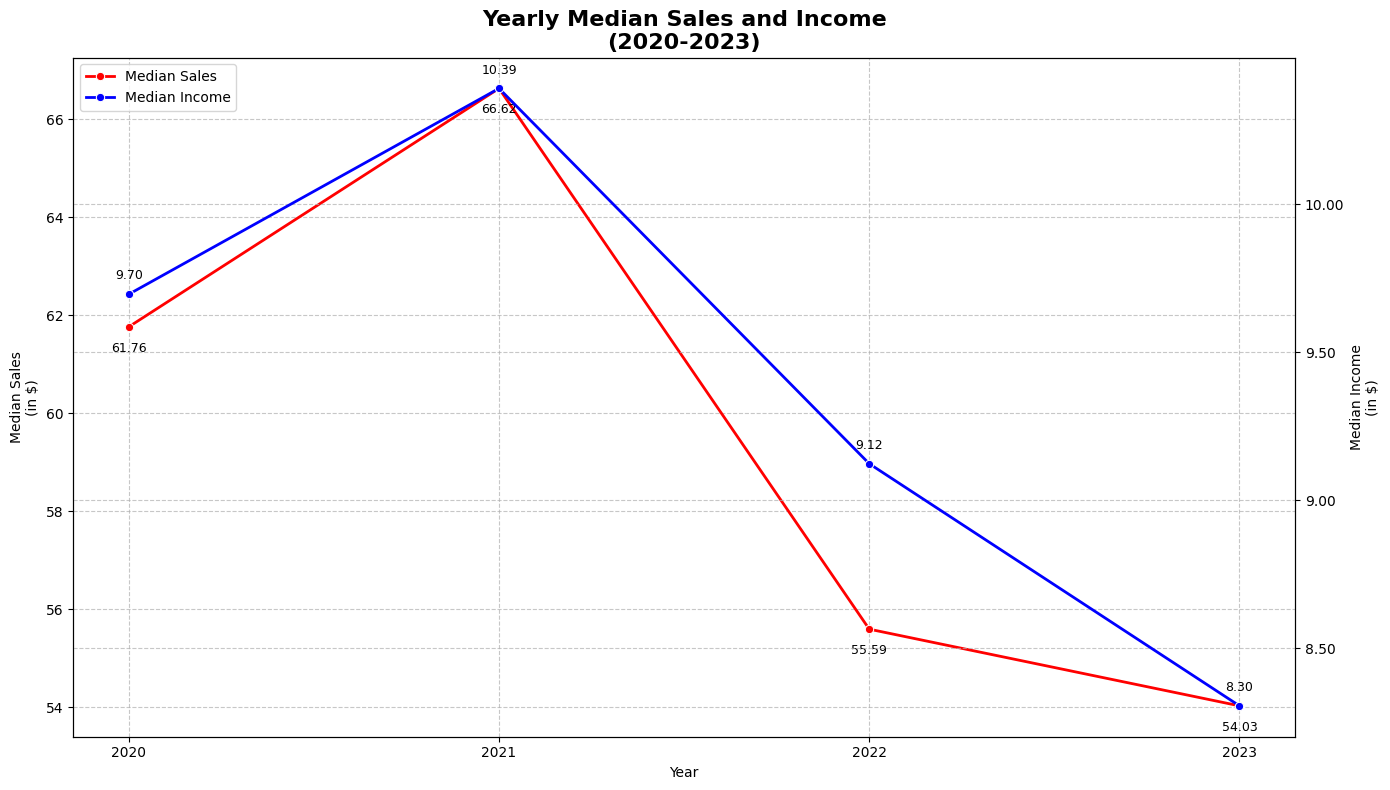

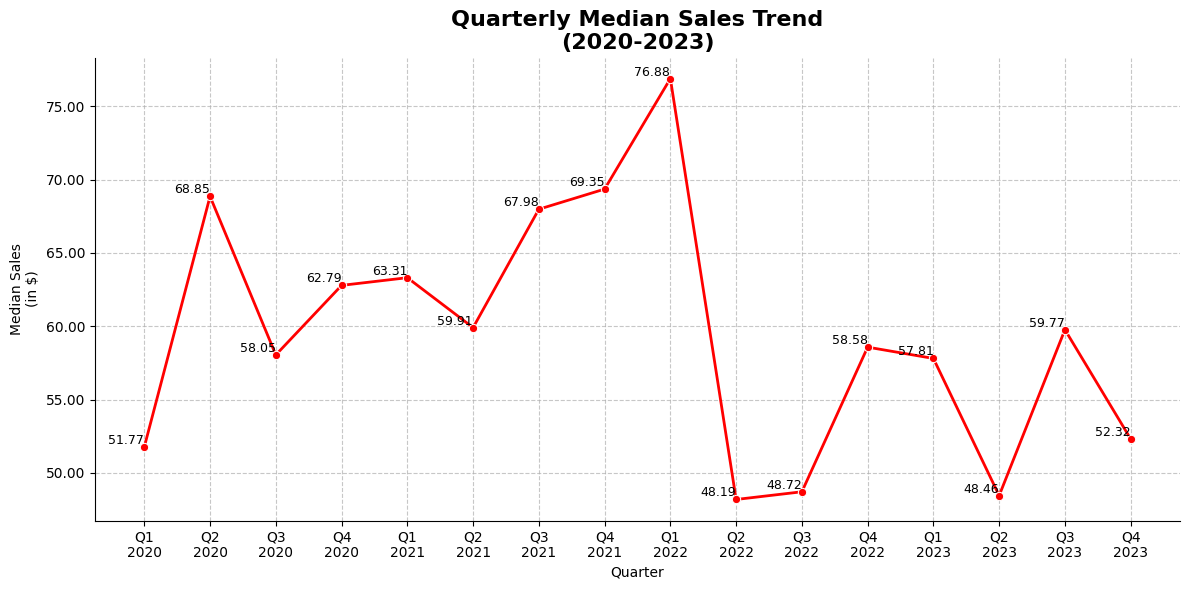

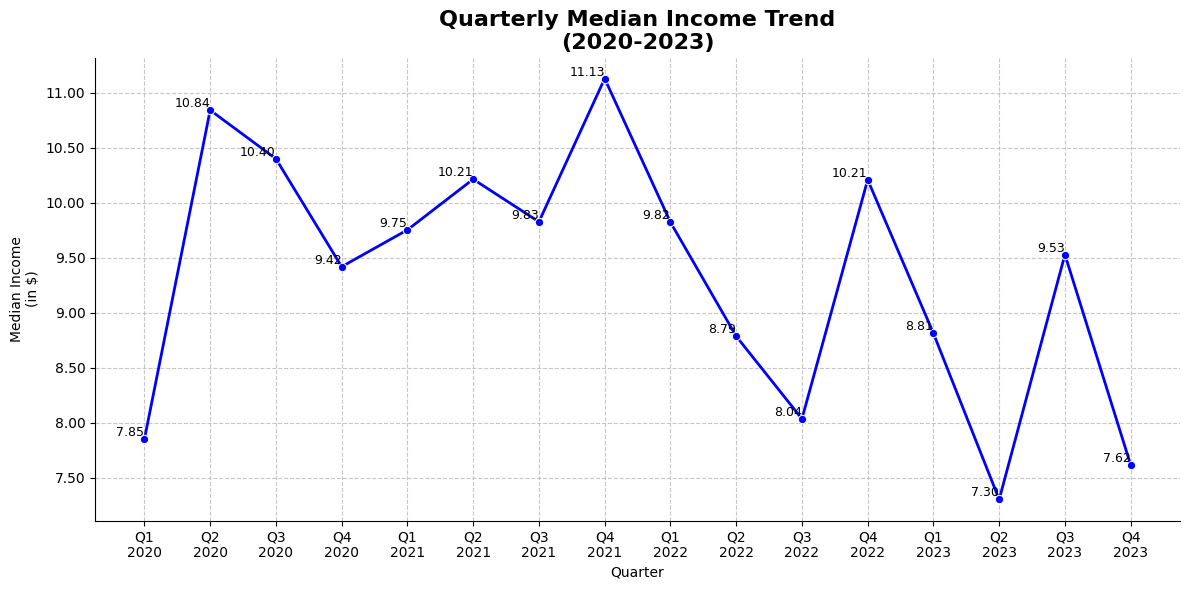

In [662]:
# Membuat grafik tren tahunan
fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(
    data=ysales_group,
    x='Year',
    y='Median_Sales',
    ax=ax,
    color='red',  
    marker='o',       
    linestyle='-',    
    linewidth=2,
    label='Median Sales'       
)

ax1 = ax.twinx()

sns.lineplot(
    data=ysales_group,
    x='Year',
    y='Median_Profit',
    ax=ax1,
    color='blue',  
    marker='o',       
    linestyle='-',    
    linewidth=2,
    label='Median Income'       
)

for x, y in zip(ysales_group['Year'], ysales_group['Median_Sales']):
    ax.text(x, y-0.3, f'{y:,.2f}', ha='center', va='top', fontsize=9, color='black')

for x, y in zip(ysales_group['Year'], ysales_group['Median_Profit']):
    ax1.text(x, y+0.04, f'{y:,.2f}', ha='center', va='bottom', fontsize=9, color='black')

ax.set(
    ylabel='Median Sales\n(in $)',
    xlabel='Year',
    title='Yearly Median Sales and Income\n(2020-2023)'
)

ax1.set(
    ylabel='Median Income\n(in $)',
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xticks(ysales_group['Year'])


ax.grid(True, linestyle='--', alpha=0.7)
ax1.grid(True, linestyle='--', alpha=0.7)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax.get_legend().remove()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

# Membuat grafik tren kuartil sales
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=qsales_qroup,
    x='q_label',
    y='Median_Sales',
    ax=ax,
    color='red',  
    marker='o',       
    linestyle='-',    
    linewidth=2       
)

for x, y in zip(qsales_qroup['q_label'], qsales_qroup['Median_Sales']):
    ax.text(x, y, f'{y:,.2f}', ha='right', va='bottom', fontsize=9, color='black')

ax.set(
    ylabel='Median Sales\n(in $)',
    xlabel='Quarter',
    title='Quarterly Median Sales Trend\n(2020-2023)'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

despine(ax)

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Membuat grafik tren kuartil profit
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=qsales_qroup,
    x='q_label',
    y='Median_Profit',
    ax=ax,
    color='blue',  
    marker='o',       
    linestyle='-',    
    linewidth=2       
)

for x, y in zip(qsales_qroup['q_label'], qsales_qroup['Median_Profit']):
    ax.text(x, y, f'{y:,.2f}', ha='right', va='bottom', fontsize=9, color='black')

ax.set(
    ylabel='Median Income\n(in $)',
    xlabel='Quarter',
    title='Quarterly Median Income Trend\n(2020-2023)'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

despine(ax)

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapati *insight*:
> 1. Performa penjualan **cenderung menurun** dari tahun ke tahun dengan performa tertinggi pada tahun 2021 sebesar $66.62
> 2. Tidak ditemukan pola performa penjualan pada kuartil tahun ke tahun. Didapat nilai performa tertinggi pada kuartil 1 tahun 2022 sebesar $76.88
> 3. Secara performa penjualan, ditemukan anomali performa penjualan di tahun 2021 **merupakan performa tertinggi** jika dibandingkan dengan tahun-tahun lainnya. 

Analisis Top `Product` tiap tahunnya
Untuk setiap tahunnya, dapat ditentukan produk-produk mana yang memiliki volume penjualan tertinggi. Berikut adalah grafik yang dapat menunjukkan **5 produk dengan penjualan tertinggi**

In [663]:
top_PrYr = df_qsales.groupby(['Year', 'Product'], as_index=False).agg(
    Total_Volume=('Quantity', 'sum')
).sort_values(['Year', 'Total_Volume'], ascending=[True, False])

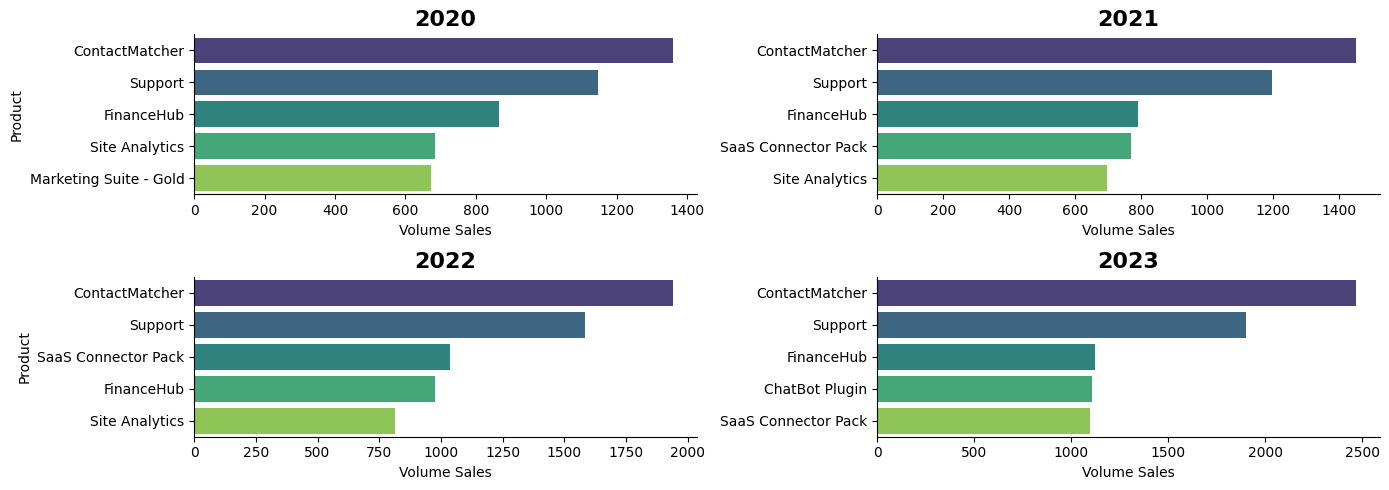

In [664]:
# Tiap industry 5 produk paling laku
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5))

years = [2020, 2021, 2022, 2023]
industry = ['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing', 'Retail', 'Consumer Products', 'Misc', 'Transportation', 'Communications']

axes_flat = axes.flatten()

for i, year in enumerate(years):
    if i < len(axes_flat):
        sns.barplot(
            data=top_PrYr[top_PrYr['Year'] == year].sort_values('Total_Volume', ascending=False).head(),
            x='Total_Volume',
            y='Product',
            ax=axes_flat[i],
            palette='viridis'
        )
        axes_flat[i].set_title(year, fontsize=16, fontweight='bold')
        axes_flat[i].set_xlabel('Volume Sales')
        if i % ncols == 0:
            axes_flat[i].set_ylabel('Product')
        else:
            axes_flat[i].set_ylabel('')
        despine(axes_flat[i])

for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])


plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. Produk *ContactMatcher* dan *Support* selama 4 tahun berturut-turut menempati posisi 1 dan 2 untuk produk dengan volume penjualan tertinggi

### 2. Analisis berdasarkan `Region`, `Subregion`, dan `Country`

Sebelum dilakukannya analisis, akan dibentuk kolom baru `Profit Margin` yang dapat menggambarkan profitabilitas suatu transaksi dengan mengukur **seberapa efisien suatu transaksi menghasilkan keuntungan dari pendapatan**. `Profit Margin` dapat dihitung dengan:

$$ \text{Profit Margin} = \frac{\text{Profit}}{\text{Sales}} \ \times 100 $$

In [665]:
# Dibentuk dataframe baru agar tidak mengubah isi dari dataframe utama
df_2 = df.copy()
df_2['Profit Margin'] = df_2['Profit (PV)'] / df_2['Sales (PV)'] * 100
df_2.head()

Order ID Order Date Region Subregion        Country           City  \
0   152156 2022-11-09   EMEA      UKIR        Ireland         Dublin   
1   152156 2022-11-09   EMEA      UKIR        Ireland         Dublin   
2   138688 2022-06-13   AMER     NAMER  United States  New York City   
3   108966 2021-10-11   EMEA   EU-WEST        Germany      Stuttgart   
4   108966 2021-10-11   EMEA   EU-WEST        Germany      Stuttgart   

            Customer Industry    Segment                 Product  \
0            Chevron   Energy        SMB         Marketing Suite   
1            Chevron   Energy        SMB              FinanceHub   
2        Phillips 66   Energy  Strategic              FinanceHub   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   

   Unit Price (PV)  Quantity  Discount  Sales (PV)  Profit (PV)  Cost (PV)  \
0         134.9550         2      0.00    269.9100      43.1856   113.3622   
1         251.3844         3      0.00    754.1531     226.2459   175.9691   
2           7.5674         2      0.00     15.1349       7.1134     4.0107   
3         386.1760         5      0.45   1061.9839    -424.7936   297.3555   
4          15.5043         2      0.20     24.8068       2.7908    11.0080   

   Profit Margin  
0      16.000000  
1      29.999996  
2      46.999980  
3     -40.000004  
4      11.250141

#### **Analisis Region**

Akan dilakukan analisis untuk menjawab beberapa pertanyaan:
1. Bagaimana kondisi `Sales` untuk tiap-tiap `Region`?
1. Bagaimana kondisi `Profit` untuk tiap-tiap `Region`?
1. `Region` mana yang memiliki tingkat profitabilitas tertinggi?
1. Apakah terdapat keterkaitan antara top `Product` dengan `Region`?

Sebelum dilakukannya analisis, terlebih dahulu akan ditentukan **berapa banyak pelanggan atau perusahaan yang melakukan transaksi untuk masing-masing `Region`**.

In [666]:
# groupby Region
df_Region = df_2.groupby('Region', as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Total_Volume=('Quantity', 'sum'),
    Total_Income=('Profit (PV)', 'sum'),
    Median_Income=('Profit (PV)', 'median'),
    Median_PM=('Profit Margin', 'median'),
    Total_PosProf=('Profit (PV)', lambda x: x[x >= 0].sum()),
    Median_PosProf=('Profit (PV)', lambda x: x[x >= 0].median()),
    Total_NegProf=('Profit (PV)', lambda x: x[x < 0].sum()),
    Median_NegProf=('Profit (PV)', lambda x: x[x < 0].median()),
    Volume_PosProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] >= 0].sum()),
    Volume_NegProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] < 0].sum()),
    n_Customer=('Customer', 'nunique')
)
df_Region['Profit_Margin'] = round(df_Region['Total_Income']/df_Region['Total_Sales'] * 100, 2)

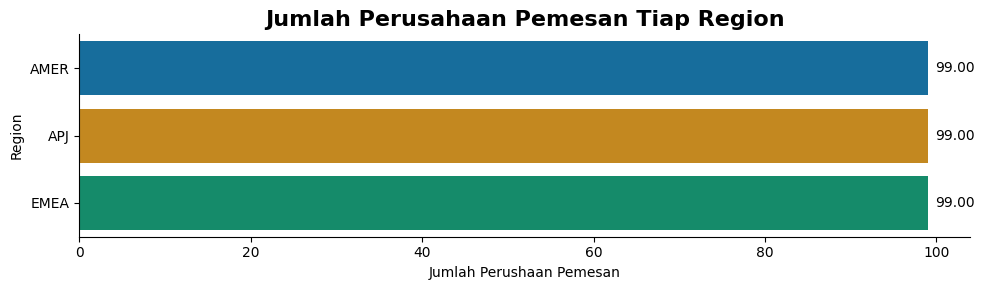

In [667]:
fig, ax = plt.subplots(figsize=(10,3))

sns.barplot(
    data=df_Region.sort_values('n_Customer', ascending=False),
    x='n_Customer',
    y='Region',
    ax=ax,
    palette='colorblind'
)

ax.set(
    xlabel='Jumlah Perushaan Pemesan',
    ylabel='Region',
    title='Jumlah Perusahaan Pemesan Tiap Region'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
despine(ax)
annotate_bar(ax, 'barh')

plt.tight_layout()
plt.show()

In [668]:
df.columns

Index(['Order ID', 'Order Date', 'Region', 'Subregion', 'Country', 'City',
       'Customer', 'Industry', 'Segment', 'Product', 'Unit Price (PV)',
       'Quantity', 'Discount', 'Sales (PV)', 'Profit (PV)', 'Cost (PV)'],
      dtype='object')

Berdasarkan grafik diatas, didapat ***insight***:
> Untuk setiap perusahaan yang ada (sebanyak 99), terdapat transaksi di seluruh region yang menandakan **seluruh perusahaan yang ada memiliki kantor di seluruh region yang ada**

Analisis `Sales` tiap-tiap `Region`

Digunakan total `Sales`, total volume sales `Quantity`, serta median `Sales` untuk tiap-tiap `Region` dalam melakukan analisis seperti berukit.

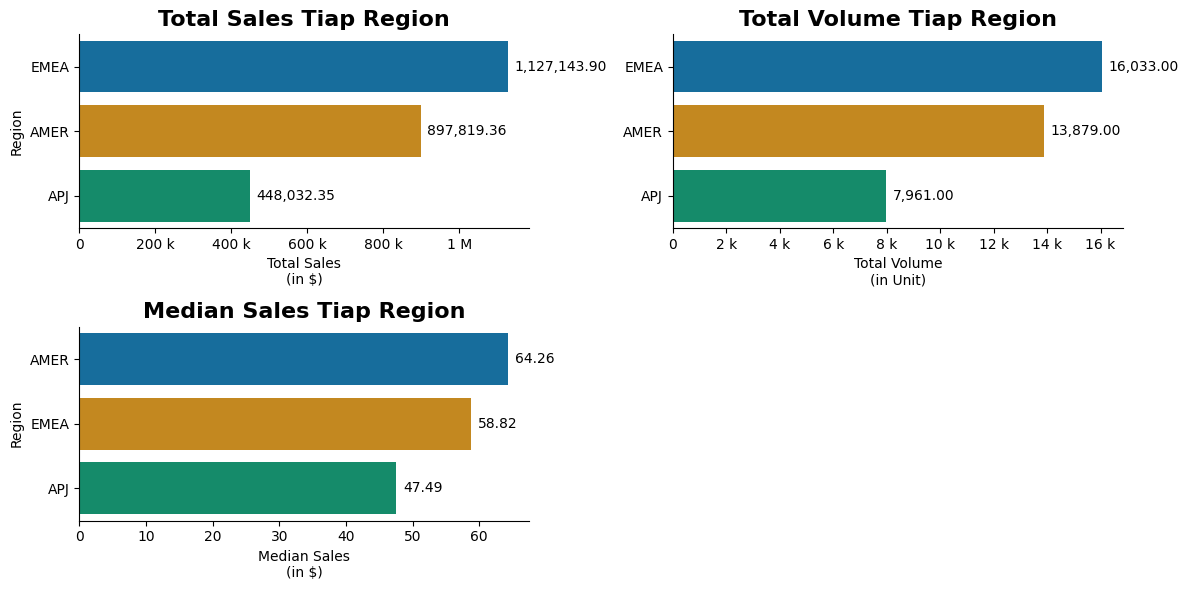

In [669]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12, 6))

# Total Sales
sns.barplot(
    data=df_Region.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Region',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Sales\n(in $)',
    ylabel='Region',
    title='Total Sales Tiap Region'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Volume Sales
sns.barplot(
    data=df_Region.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Region',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Total Volume\n(in Unit)',
    ylabel='',
    title='Total Volume Tiap Region'
)

axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold')  

axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Sales
sns.barplot(
    data=df_Region.sort_values('Median_Sales', ascending=False),
    x='Median_Sales',
    y='Region',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Sales\n(in $)',
    ylabel='Region',
    title='Median Sales Tiap Region'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa ketiga region memiliki **proprsi volume sales yang berbeda**. Oleh karena itu, akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa penjualan *(median sales)* untuk tiap-tiap region berbeda signifikan** dengan:
- H0: Median Sales untuk setiap region bernilai sama
- H1: Minimal ada 1 region yang berbeda median Sales-nya. Tetapi kita tidak tahu yang mana.

In [670]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Region']=='AMER']['Sales (PV)'],
        df[df['Region']=='EMEA']['Sales (PV)'],
        df[df['Region']=='APJ']['Sales (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 35.8643
p-value            : 0.0000
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Setelah dilakukan pengujian `Kruskal-Wallis`, didapat bahwa  **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 region dimana nilai median Sales-nya berbeda signifikan tetapi tidak tahu yang mana**. Berdasarkan grafik diatas, dapat dilihat bahwa median `Sales` untuk region APJ cukup berbeda dibanding dengan dua region lainnya.

Oleh karena itu, akan dilakukan pengujian statistik `Mann-Whitney` untuk `Sales` pada region AMER dan EMEA dengan:
- H0: Median Sales Region AMER **sama dengan** Median Sales Region EMEA
- H1: Median Sales Region AMER **tidak sama dengan** Median Sales Region EMEA

In [671]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    x=df[df['Region']=='AMER']['Sales (PV)'],
    y=df[df['Region']=='EMEA']['Sales (PV)'],
    alternative='two-sided'
)

print(f"Mann-Whitney stat  : {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Mann-Whitney stat  : 7885914.0000
p-value            : 0.1251
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Sales`, `Region` EMEA memiliki **tingkat penjualan tertinggi** diantara region-region lainnya yaitu sebesar $1,127,143. Lalu diikuti dengan region AMER dan APJ.
> 1. Secara volume penjualan, `Region` EMEA memiliki **volume penjualan tertinggi** diantara region-region lainnya yaitu sebesar 16,033 unit. Lalu diikuti dengan region AMER dan APJ.
> 1. Secara performa penjualan, dilakukan uji hipotesis dengan kesimpulan yang menandakan **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 region dimana nilai median Sales-nya berbeda signifikan tetapi tidak tahu yang mana**. Berdasarkan pembacaan grafik, didapat median `Sales` untuk `Region` AMER memiliki nilai tertinggi diantara region-region lainnya.
> 1. Dilakukan pengujian hipotesis lanjut untuk median `Sales` region AMER dan EMEA, didapat kesimpulan **tidak terdapat cukup bukti untuk mengatakan bahwa median Sales region AMER dan EMEA berbeda**. Hal ini menandakan secara uji hipotesis **median sales region AMER dan EMEA dapat dikatakan bernilai sama**

Berdasarkan ***insight*** tersebut, dapat disimpulkan **secara total maupun performa penjualan, region EMEA dapat dikatakan lebih unggul dibanding dengan region lainnya**

Analisis `Profit` tiap-tiap `Region`

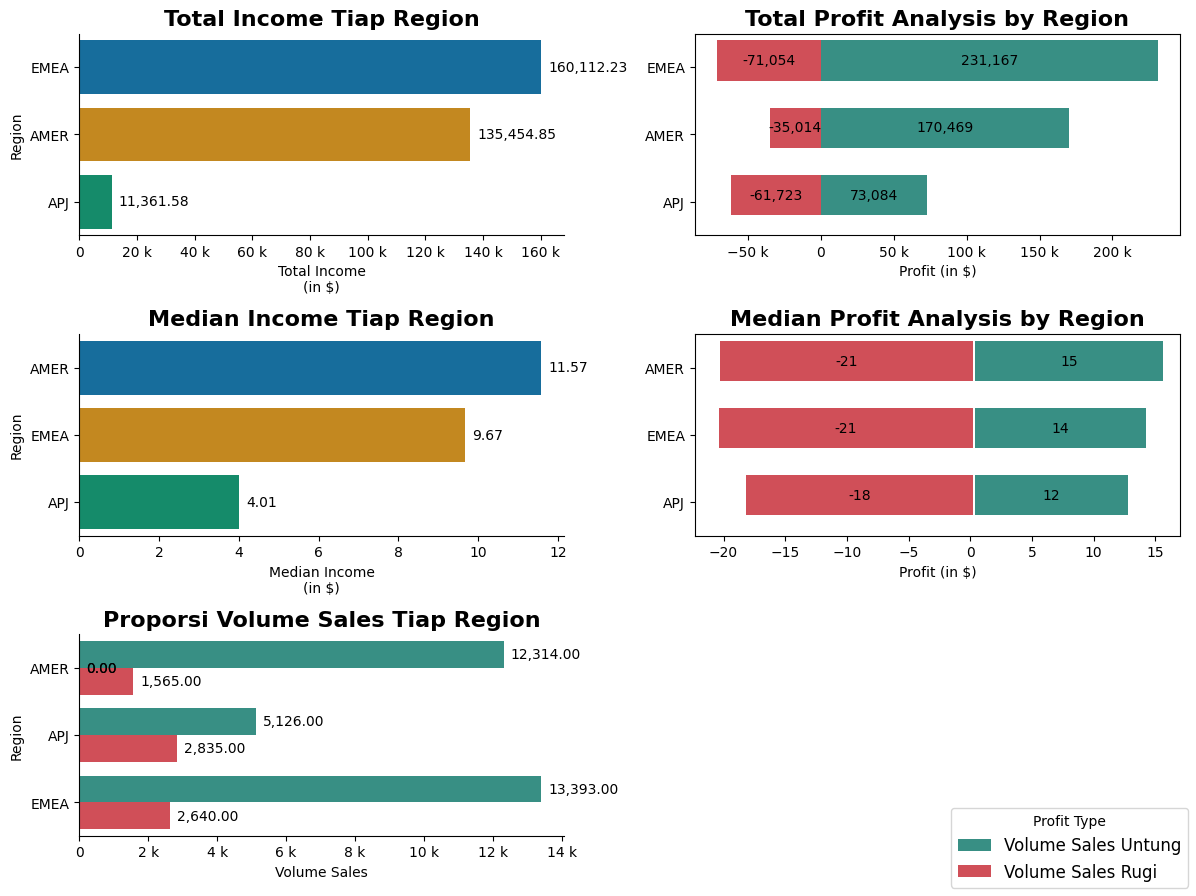

In [672]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(12, 9))

# Total Income
sns.barplot(
    data=df_Region.sort_values('Total_Income', ascending=False),
    x='Total_Income',
    y='Region',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Income\n(in $)',
    ylabel='Region',
    title='Total Income Tiap Region'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Income
sns.barplot(
    data=df_Region.sort_values('Median_Income', ascending=False),
    x='Median_Income',
    y='Region',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Income\n(in $)',
    ylabel='Region',
    title='Median Income Tiap Region'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

# Tornado chart total
bar01 = sns.barplot(
    data=df_Region.sort_values('Total_Income', ascending=False),
    y='Region',
    x='Total_PosProf',
    color='#2a9d8f',
    ax=axes[0,1]
)

for patch in bar01.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar02 = sns.barplot(
    data=df_Region.sort_values('Total_Income', ascending=False),
    y='Region',
    x='Total_NegProf',
    color='#e63946',
    ax=axes[0,1]
)

for patch in bar02.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[0,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Total Profit Analysis\nby Region'
)
axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0,1].set_title('Total Profit Analysis by Region', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[0,1], data=pd.concat([df_Region.sort_values('Total_Income', ascending=False)['Total_PosProf'], df_Region.sort_values('Total_Income', ascending=False)['Total_NegProf']], ignore_index=True), position='inside', type='barh')

# Tornado chart median
bar11 = sns.barplot(
    data=df_Region.sort_values('Median_Income', ascending=False),
    y='Region',
    x='Median_PosProf',
    color='#2a9d8f',
    ax=axes[1,1]
)

for patch in bar11.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar12 = sns.barplot(
    data=df_Region.sort_values('Median_Income', ascending=False),
    y='Region',
    x='Median_NegProf',
    color='#e63946',
    ax=axes[1,1]
)

for patch in bar12.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[1,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Median Profit Analysis\nby Region'
)
axes[1,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1,1].set_title('Median Profit Analysis by Region', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[1,1], data=pd.concat([df_Region.sort_values('Median_Income', ascending=False)['Median_PosProf'], df_Region.sort_values('Median_Income', ascending=False)['Median_NegProf']], ignore_index=True), position='inside', type='barh')

# Volume untung rugi
sns.barplot(
    data=df_Region.melt(
        id_vars='Region', 
        value_vars=['Volume_PosProf', 'Volume_NegProf'], 
        var_name='Profit_Type', 
        value_name='Volume'
    ),
    y='Region',
    x='Volume',
    palette={'Volume_PosProf': '#2a9d8f', 'Volume_NegProf': '#e63946'},
    hue='Profit_Type',
    ax=axes[2,0]
)

axes[2,0].set(
    xlabel='Volume Sales',
    ylabel='Region',
    title='Proporsi Volume Sales Tiap Region'
)

axes[2,0].title.set_fontsize(16)  
axes[2,0].title.set_fontweight('bold')  

axes[2,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[2,0])
annotate_bar(axes[2,0], 'barh')

axes[2, 0].legend_.remove()

handles, labels = axes[2, 0].get_legend_handles_labels()
custom_labels = ['Volume Sales Untung', 'Volume Sales Rugi']
fig.legend(
    handles=handles, 
    labels=custom_labels, 
    loc='lower right', 
    fontsize=12,
    title='Profit Type'
)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa keuntungan *(median profit)* untuk tiap-tiap regionnya berbeda signifikan** dengan:
- H0: Median Profit untuk setiap region bernilai sama
- H1: Minimal ada 1 region yang berbeda median Profit-nya. Tetapi kita tidak tahu yang mana.

In [673]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Region']=='AMER']['Profit (PV)'],
        df[df['Region']=='EMEA']['Profit (PV)'],
        df[df['Region']=='APJ']['Profit (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 325.2326
p-value            : 0.0000
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Setelah dilakukan pengujian `Kruskal-Wallis`, didapat bahwa  **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 region dimana nilai median Profit-nya berbeda signifikan tetapi tidak tahu yang mana**. Berdasarkan grafik diatas, dapat dilihat bahwa median `Profit` untuk region APJ cukup berbeda dibanding dengan dua region lainnya.

Oleh karena itu, akan dilakukan pengujian statistik `Mann-Whitney` untuk `Profit` pada region AMER dan EMEA dengan:
- H0: Median Profit Region AMER **sama dengan** Median Profit Region EMEA
- H1: Median Profit Region AMER **tidak sama dengan** Median Profit Region EMEA

In [674]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    x=df[df['Region']=='AMER']['Profit (PV)'],
    y=df[df['Region']=='EMEA']['Profit (PV)'],
    alternative='two-sided'
)

print(f"Mann-Whitney stat  : {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Mann-Whitney stat  : 8192916.5000
p-value            : 0.0000
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa keuntungan *(median profit untuk transaksi dengan profit positif)* untuk tiap-tiap regionnya berbeda signifikan** dengan:
- H0: Median Profit Positif untuk setiap region bernilai sama
- H1: Minimal ada 1 region yang berbeda median Profit positif-nya. Tetapi kita tidak tahu yang mana.

In [675]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[(df['Region']=='AMER') & (df['Profit (PV)'] >= 0)]['Profit (PV)'],
        df[(df['Region']=='EMEA') & (df['Profit (PV)'] >= 0)]['Profit (PV)'],
        df[(df['Region']=='APJ') & (df['Profit (PV)'] >= 0)]['Profit (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 12.6655
p-value            : 0.0018
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Setelah dilakukan pengujian `Kruskal-Wallis`, didapat bahwa  **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 region dimana nilai median Profit positif-nya berbeda signifikan tetapi tidak tahu yang mana**. Berdasarkan grafik diatas, dapat dilihat bahwa median `Profit` untuk region APJ cukup berbeda dibanding dengan dua region lainnya.

Oleh karena itu, akan dilakukan pengujian statistik `Mann-Whitney` untuk `Profit` positif pada region AMER dan EMEA dengan:
- H0: Median Profit positif Region AMER **sama dengan** Median Profit Region EMEA
- H1: Median Profit positif Region AMER **tidak sama dengan** Median Profit Region EMEA

In [676]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    x=df[(df['Region']=='AMER') & (df['Profit (PV)'] >= 0)]['Profit (PV)'],
    y=df[(df['Region']=='EMEA') & (df['Profit (PV)'] >= 0)]['Profit (PV)'],
    alternative='two-sided'
)

print(f"Mann-Whitney stat  : {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Mann-Whitney stat  : 5765104.0000
p-value            : 0.4910
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **median kerugian *(median profit untuk transaksi dengan profit negatif)* untuk tiap-tiap regionnya berbeda signifikan** dengan:
- H0: Median Profit Negatif untuk setiap region bernilai sama
- H1: Minimal ada 1 region yang berbeda median Profit negatif-nya. Tetapi kita tidak tahu yang mana.

In [677]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[(df['Region']=='AMER') & (df['Profit (PV)'] < 0)]['Profit (PV)'],
        df[(df['Region']=='EMEA') & (df['Profit (PV)'] < 0)]['Profit (PV)'],
        df[(df['Region']=='APJ') & (df['Profit (PV)'] < 0)]['Profit (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 0.1249
p-value            : 0.9394
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Profit`, `Region` EMEA memiliki **tingkat keuntungan tertinggi** diantara region-region lainnya yaitu sebesar $160,112. Lalu diikuti dengan region AMER dan APJ.
> 1. Secara total kerugian atau `Profit` dengan nilai negatif, `Region` EMEA memiliki **tingkat kerugian tertinggi** diantara region-region lainnya yaitu sebesar $71,504. Lalu diikuti dengan region APJ dan AMER
> 1. Berdasarkan grafik, median `Profit`, `Region` AMER memiliki **median keuntungan tertinggi** diantara region-region lainnya yaitu sebesar $11.57
> 1. Berdasarkan uji hipotesis, didapat kesimpulan **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 region dimana nilai median Profit-nya berbeda signifikan tetapi tidak tahu yang mana**. 
> 1. Dilakukan uji hipotesis lanjutan untuk median `Profit` region EMEA dan AMER dengan kesimpulan **terdapat cukup bukti untuk mengatakan bahwa median Profit region AMER dan EMEA berbeda**.
> 1. Dilakukan uji hipotesis untuk nilai tipikal (*median*) transaksi yang menghasilkan keuntungan (*profit positif*) dan menghasilkan kerugian (*profit negatif*). didapat **nilai median profit positif untuk region AMER dan EMEA dapat dikatakan sama**, **nilai median profit negatif untuk seluruh region dapat dikatakan sama**

Analisis `Profit Margin` tiap-tiap `Region`

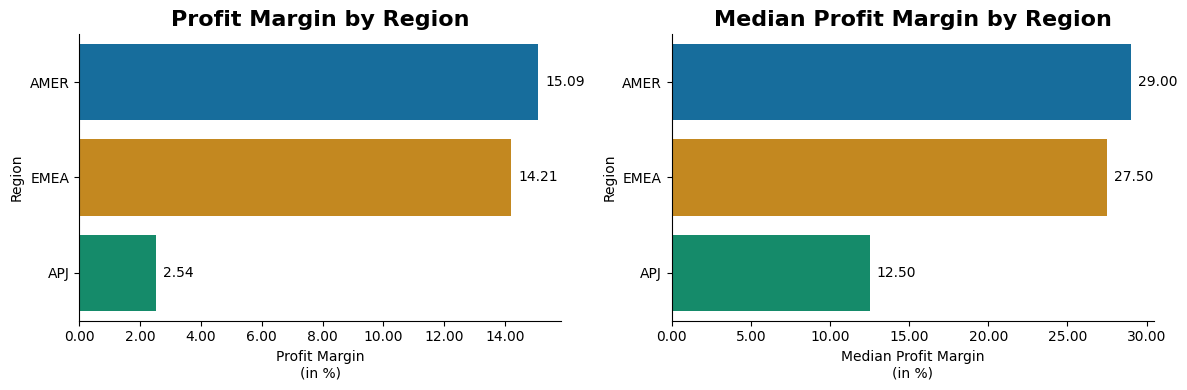

In [678]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

# Profit Margin
sns.barplot(
    data=df_Region.sort_values('Profit_Margin', ascending=False),
    y='Region',
    x='Profit_Margin',
    ax=axes[0],
    palette='colorblind'
)
axes[0].set(
    ylabel='Region',
    xlabel='Profit Margin\n(in %)',
    title='Profit Margin by Region'
)
axes[0].title.set_fontsize(16)
axes[0].title.set_fontweight('bold')
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[0])
annotate_bar(axes[0], type='barh')

# Median Profit Margin
sns.barplot(
    data=df_Region.sort_values('Median_PM', ascending=False),
    y='Region',
    x='Median_PM',
    ax=axes[1],
    palette='colorblind'
)
axes[1].set(
    ylabel='Region',
    xlabel='Median Profit Margin\n(in %)',
    title='Median Profit Margin by Region'
)
axes[1].title.set_fontsize(16)
axes[1].title.set_fontweight('bold')
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[1])
annotate_bar(axes[1], type='barh')

plt.tight_layout()
plt.show()

Akan dilakukan pengujian statistik `Mann-Whitney` untuk median `Profit Margin` pada region AMER dan EMEA dengan:
- H0: Median Profit Margin Region AMER **sama dengan** Median Profit Margin Region EMEA
- H1: Median Profit Margin Region AMER **tidak sama dengan** Median Profit Margin Region EMEA

In [679]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    x=df_2[df_2['Region']=='AMER']['Profit Margin'],
    y=df_2[df_2['Region']=='EMEA']['Profit Margin'],
    alternative='two-sided'
)

print(f"Mann-Whitney stat  : {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Mann-Whitney stat  : 8178743.0000
p-value            : 0.0000
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Berdasarkan grafik diatas, didapat ***insight***:
> 1. `Region` AMER memiliki `Profit Margin` total tertinggi diantara region-region lainnya yaitu sebesar 15.09%. Hal ini menandakan **dari total penjualan, region AMER berhasil mengkonversi 15.09% dari total penjualan tersebut menjadi keuntungan**
> 1. `Region` AMER memiliki `Profit Margin` tipikal per transaksi (*median*) tertinggi diantara region-region lainnya yaitu sebesar 29%. Hal ini menandakan **dari median penjualan, region AMER berhasil mengkonversi 29% dari total penjualan tersebut menjadi keuntungan**
> 1. Secara uji statistik, **terdapat cukup bukti untuk mengatakan bahwa median Profit Margin region AMER dan EMEA berbeda**
> 1. Berdasarkan analisis tersebut, dapat dikatakan ***Region AMER merupakan region dengan tingkat profitabilitas tertinggi diantara region-region lainnya***

Analisis `Product` tiap-tiap `Region`

Akan dilakukan pengujian `Chi-Square` untuk menguji apakah `Region` memiliki keterkaitan dengan pilihan `Product` yang akan dibeli sehingga:
- H0: `Region` dan `Product` tidak terkait/independent (memiliki proporsi yang sama)
- H1: `Region` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan)

Untuk mencari keterkaitan, digunakan **total volume penjualan atau `Quantity`** tiap-tiap `Product` untuk tiap-tiap region lalu dibentuk crosstab untuk `Product` dengan volume pejualan tertinggi pada urutan pertama hingga kelima untuk masing-masing `Region`.

In [742]:
RegProd = df.groupby(['Region', 'Product'],as_index=False).agg(
    Total_Volume=('Quantity','sum')
)

In [744]:
from scipy.stats import chi2_contingency

n_values = [1, 2, 3, 4, 5]

alpha = 0.05

results = []

for n in n_values:
    TopRegProd = (RegProd.sort_values(['Region', 'Total_Volume'], ascending=[True, False])
                          .groupby('Region')
                          .head(n))
    
    ctTopRegProd = pd.crosstab(TopRegProd['Region'],
                               TopRegProd['Product'],
                               values=TopRegProd['Product'],
                               aggfunc='count',
                               margins=False
                              ).fillna(0)
    
    chi2, pvalue, dof, exp = chi2_contingency(ctRegProd)
    
    hasil_uji = 'Reject H0' if pvalue < alpha else 'Fail to reject H0'
    
    results.append({'Top-n': n, 'Stat Value': chi2, 'P-Value': pvalue, 'Hasil Uji': hasil_uji})

results_df = pd.DataFrame(results)

results_df

Top-n  Stat Value  P-Value          Hasil Uji
0      1         0.0      1.0  Fail to reject H0
1      2         0.0      1.0  Fail to reject H0
2      3         0.0      1.0  Fail to reject H0
3      4         0.0      1.0  Fail to reject H0
4      5         0.0      1.0  Fail to reject H0

Berdasarkan uji hipotesis diatas, didapat ***insight***:
> 1. Tidak terdapat cukup bukti untuk mengatakan bahwa `Region` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan) untuk top product pertama hingga kelima

Untuk tiap-tiap `Region`, dapat dilihat 5 top `Product` dengan volume penjualan tertinggi seperti berikut

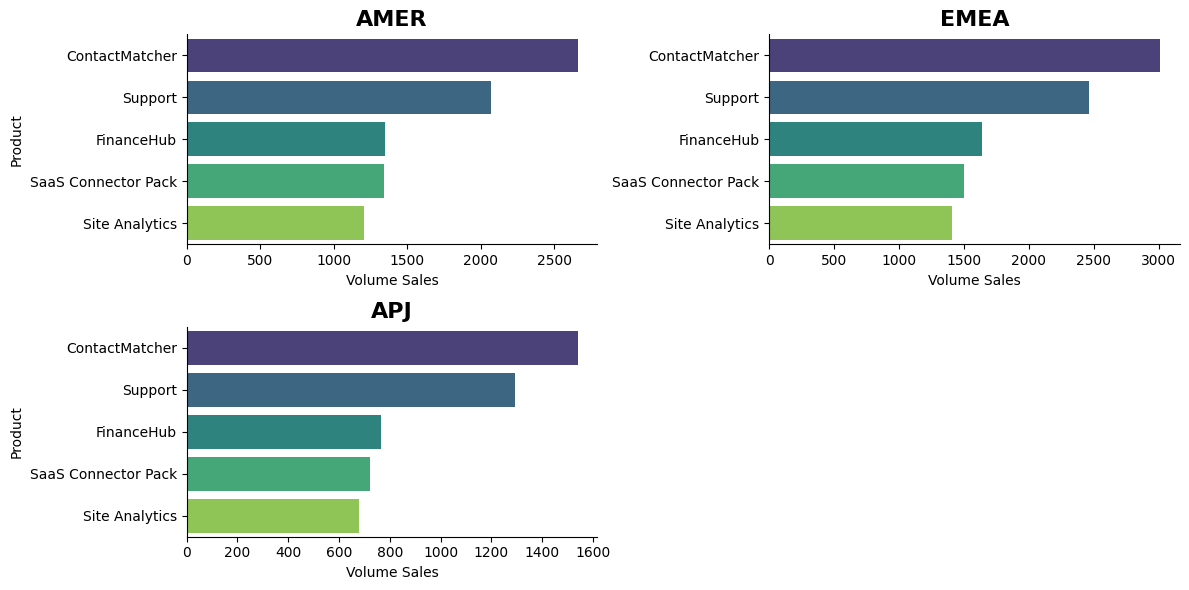

In [745]:
# Tiap Region 5 produk paling laku
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

region = ['AMER', 'EMEA', 'APJ']

axes_flat = axes.flatten()

for i, ind in enumerate(region):
    if i < len(axes_flat):
        sns.barplot(
            data=RegProd[RegProd['Region'] == ind].sort_values('Total_Volume', ascending=False).head(),
            x='Total_Volume',
            y='Product',
            ax=axes_flat[i],
            palette='viridis'
        )
        axes_flat[i].set_title(ind, fontsize=16, fontweight='bold')
        axes_flat[i].set_xlabel('Volume Sales')
        if i % ncols == 0:
            axes_flat[i].set_ylabel('Product')
        else:
            axes_flat[i].set_ylabel('')
        despine(axes_flat[i])

for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])


plt.tight_layout()
plt.show()

Berdasarkan grafik dan uji hipotesis diatas, didapat ***insight***:
> 1. Top 5 product untuk tiap-tiap `Region` sama dan memiliki urutan yang sama: *ContactMatcher, Support, FinanceHub, SaaS Connector Pack, Site Analytics*

#### **Analisis Subregion**

Akan dilakukan analisis untuk menjawab beberapa pertanyaan:
1. Bagaimana kondisi `Sales` untuk tiap-tiap `Subregion`?
1. Bagaimana kondisi `Profit` untuk tiap-tiap `Subregion`?
1. `Subregion` mana yang memiliki tingkat profitabilitas tertinggi?
1. Apakah terdapat keterkaitan antara top `Product` dengan `Subregion`

Sebelum dilakukannya analisis, terlebih dahulu akan ditentukan **berapa banyak pelanggan atau perusahaan yang melakukan transaksi untuk masing-masing `Subregion`**

In [683]:
# groupby Subregion
df_Subregion = df_2.groupby(['Region','Subregion'], as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Total_Volume=('Quantity', 'sum'),
    Total_Income=('Profit (PV)', 'sum'),
    Median_Income=('Profit (PV)', 'median'),
    Median_PM=('Profit Margin', 'median'),
    Total_PosProf=('Profit (PV)', lambda x: x[x >= 0].sum()),
    Median_PosProf=('Profit (PV)', lambda x: x[x >= 0].median()),
    Total_NegProf=('Profit (PV)', lambda x: x[x < 0].sum()),
    Median_NegProf=('Profit (PV)', lambda x: x[x < 0].median()),
    Volume_PosProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] >= 0].sum()),
    Volume_NegProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] < 0].sum()),
    n_Customer=('Customer', 'nunique')
)
df_Subregion['Profit_Margin'] = round(df_Subregion['Total_Income']/df_Subregion['Total_Sales'] * 100, 2)
df_Subregion.fillna(0, inplace=True)

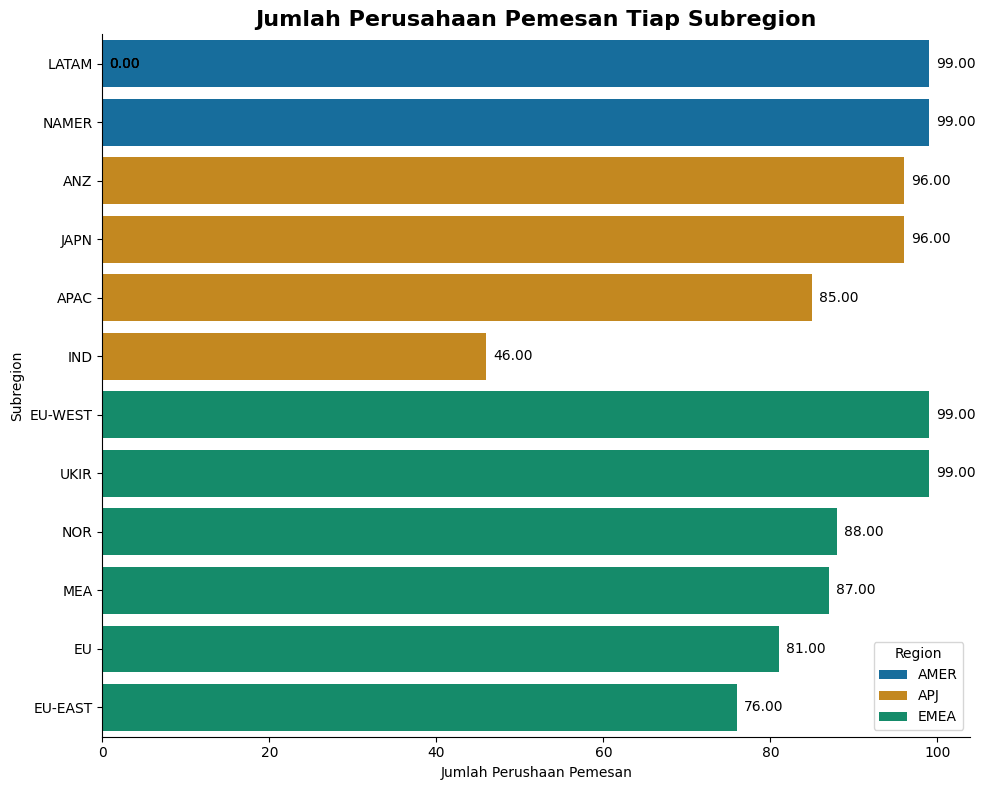

In [684]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(
    data=df_Subregion.sort_values(['Region', 'n_Customer'], ascending=[True,False]),
    x='n_Customer',
    y='Subregion',
    ax=ax,
    palette='colorblind',
    hue='Region'
)

ax.set(
    xlabel='Jumlah Perushaan Pemesan',
    ylabel='Subregion',
    title='Jumlah Perusahaan Pemesan Tiap Subregion'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
despine(ax)
annotate_bar(ax, 'barh')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> Untuk setiap perusahaan yang ada (sebanyak 99), hanya `Subregion` yang berada di `Region` AMER yang memiliki data **keseluruhan perusahaan yang tercatat**

Analisis `Sales` tiap-tiap `Subregion`

Digunakan total `Sales`, total volume sales `Quantity`, serta median `Sales` untuk tiap-tiap `Region` dalam melakukan analisis seperti berukit.

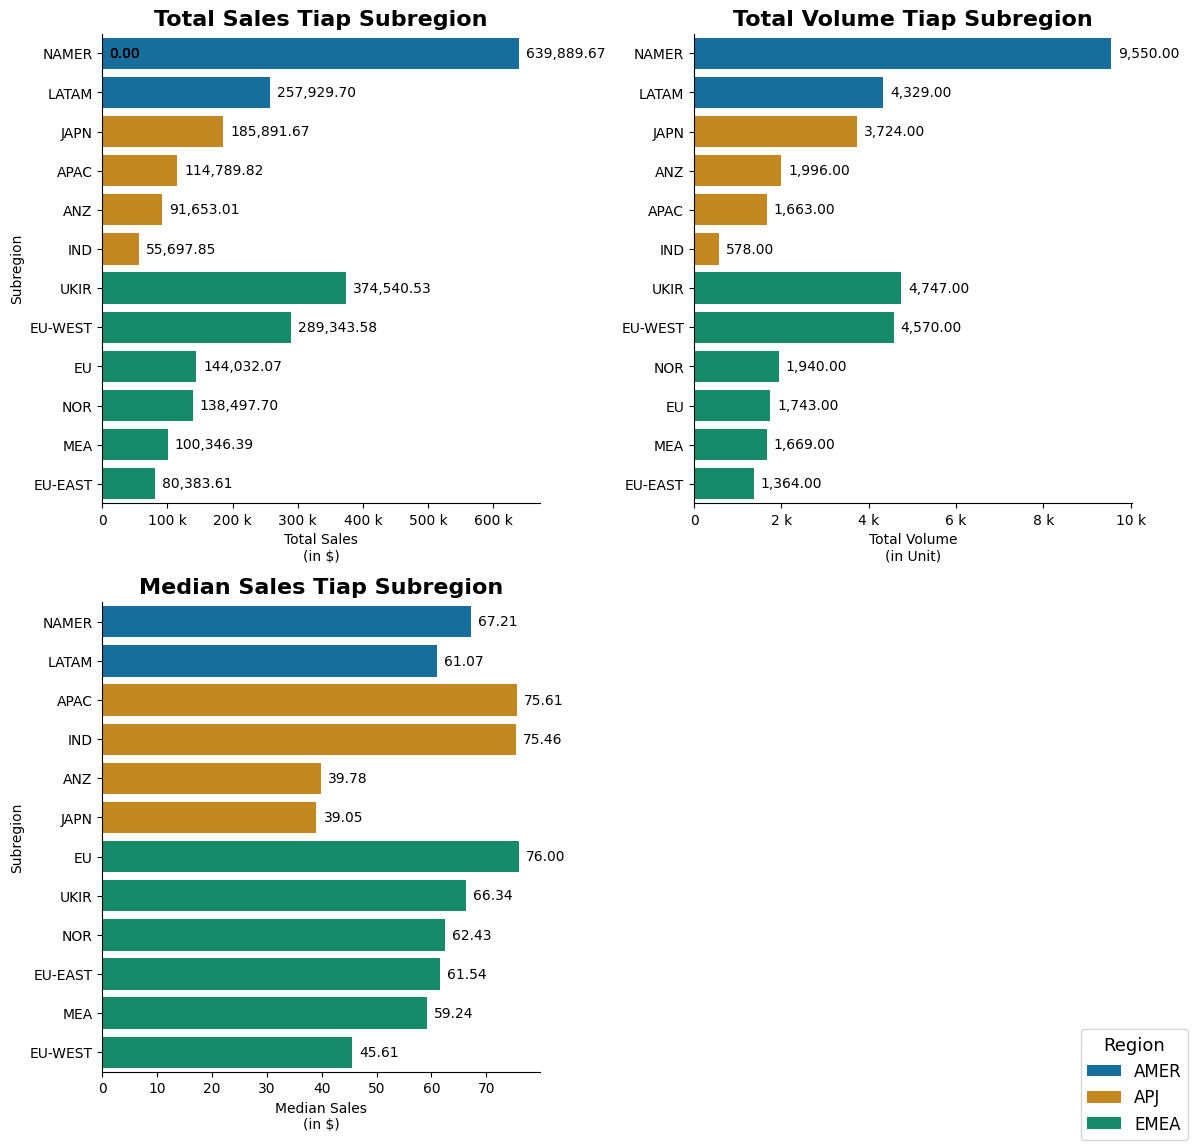

In [685]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Total Sales
sns.barplot(
    data=df_Subregion.sort_values(['Region', 'Total_Sales'], ascending=[True, False]),
    x='Total_Sales',
    y='Subregion',
    ax=axes[0, 0],
    palette='colorblind',
    hue='Region',
    dodge=False
)

axes[0, 0].set(
    xlabel='Total Sales\n(in $)',
    ylabel='Subregion',
    title='Total Sales Tiap Subregion'
)

axes[0, 0].title.set_fontsize(16)
axes[0, 0].title.set_fontweight('bold')

axes[0, 0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0, 0])
annotate_bar(axes[0, 0], 'barh')

axes[0, 0].get_legend().remove()

# Volume Sales
sns.barplot(
    data=df_Subregion.sort_values(['Region', 'Total_Volume'], ascending=[True, False]),
    x='Total_Volume',
    y='Subregion',
    ax=axes[0, 1],
    palette='colorblind',
    hue='Region',
    dodge=False,
    legend=False
)

axes[0, 1].set(
    xlabel='Total Volume\n(in Unit)',
    ylabel='',
    title='Total Volume Tiap Subregion'
)

axes[0, 1].title.set_fontsize(16)
axes[0, 1].title.set_fontweight('bold')

axes[0, 1].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0, 1])
annotate_bar(axes[0, 1], 'barh')

# Median Sales
sns.barplot(
    data=df_Subregion.sort_values(['Region', 'Median_Sales'], ascending=[True, False]),
    x='Median_Sales',
    y='Subregion',
    ax=axes[1, 0],
    palette='colorblind',
    hue='Region',
    dodge=False,
    legend=False
)

axes[1, 0].set(
    xlabel='Median Sales\n(in $)',
    ylabel='Subregion',
    title='Median Sales Tiap Subregion'
)

axes[1, 0].title.set_fontsize(16)
axes[1, 0].title.set_fontweight('bold')

axes[1, 0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1, 0])
annotate_bar(axes[1, 0], 'barh')

axes[1, 1].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', fontsize=12, title='Region', title_fontsize='13')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa seluruh subregion memiliki **proprsi volume sales yang berbeda**. Oleh karena itu, akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa penjualan *(median sales)* untuk tiap-tiap subregion berbeda signifikan** dengan:
- H0: Median Sales untuk setiap subregion bernilai sama
- H1: Minimal ada 1 subregion yang berbeda median Sales-nya. Tetapi kita tidak tahu yang mana.

In [686]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Subregion']=='UKIR']['Sales (PV)'],
        df[df['Subregion']=='NAMER']['Sales (PV)'],
        df[df['Subregion']=='EU-WEST']['Sales (PV)'],
        df[df['Subregion']=='NOR']['Sales (PV)'],
        df[df['Subregion']=='JAPN']['Sales (PV)'],
        df[df['Subregion']=='EU']['Sales (PV)'],
        df[df['Subregion']=='MEA']['Sales (PV)'],
        df[df['Subregion']=='LATAM']['Sales (PV)'],
        df[df['Subregion']=='ANZ']['Sales (PV)'],
        df[df['Subregion']=='APAC']['Sales (PV)'],
        df[df['Subregion']=='IND']['Sales (PV)'],
        df[df['Subregion']=='EU-EAST']['Sales (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 142.1767
p-value            : 0.0000
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Sales`, `Subregion` NAMER memiliki **tingkat penjualan tertinggi** diantara subregion lainnya yaitu sebesar $639,889
> 1. Secara volume penjualan, `Subregion` NAMER memiliki **volume penjualan tertinggi** diantara subregion lainnya yaitu sebesar 9,550 unit.
> 1. Secara performa penjualan, dilakukan uji hipotesis dengan kesimpulan yang menandakan **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 Subregion dimana nilai median Sales-nya berbeda signifikan tetapi tidak tahu yang mana**. Berdasarkan pembacaan grafik, didapat median `Sales` untuk `Subregion` EU memiliki nilai tertinggi diantara subregion lainnya.

Analisis `Profit` tiap-tiap `Subregion`

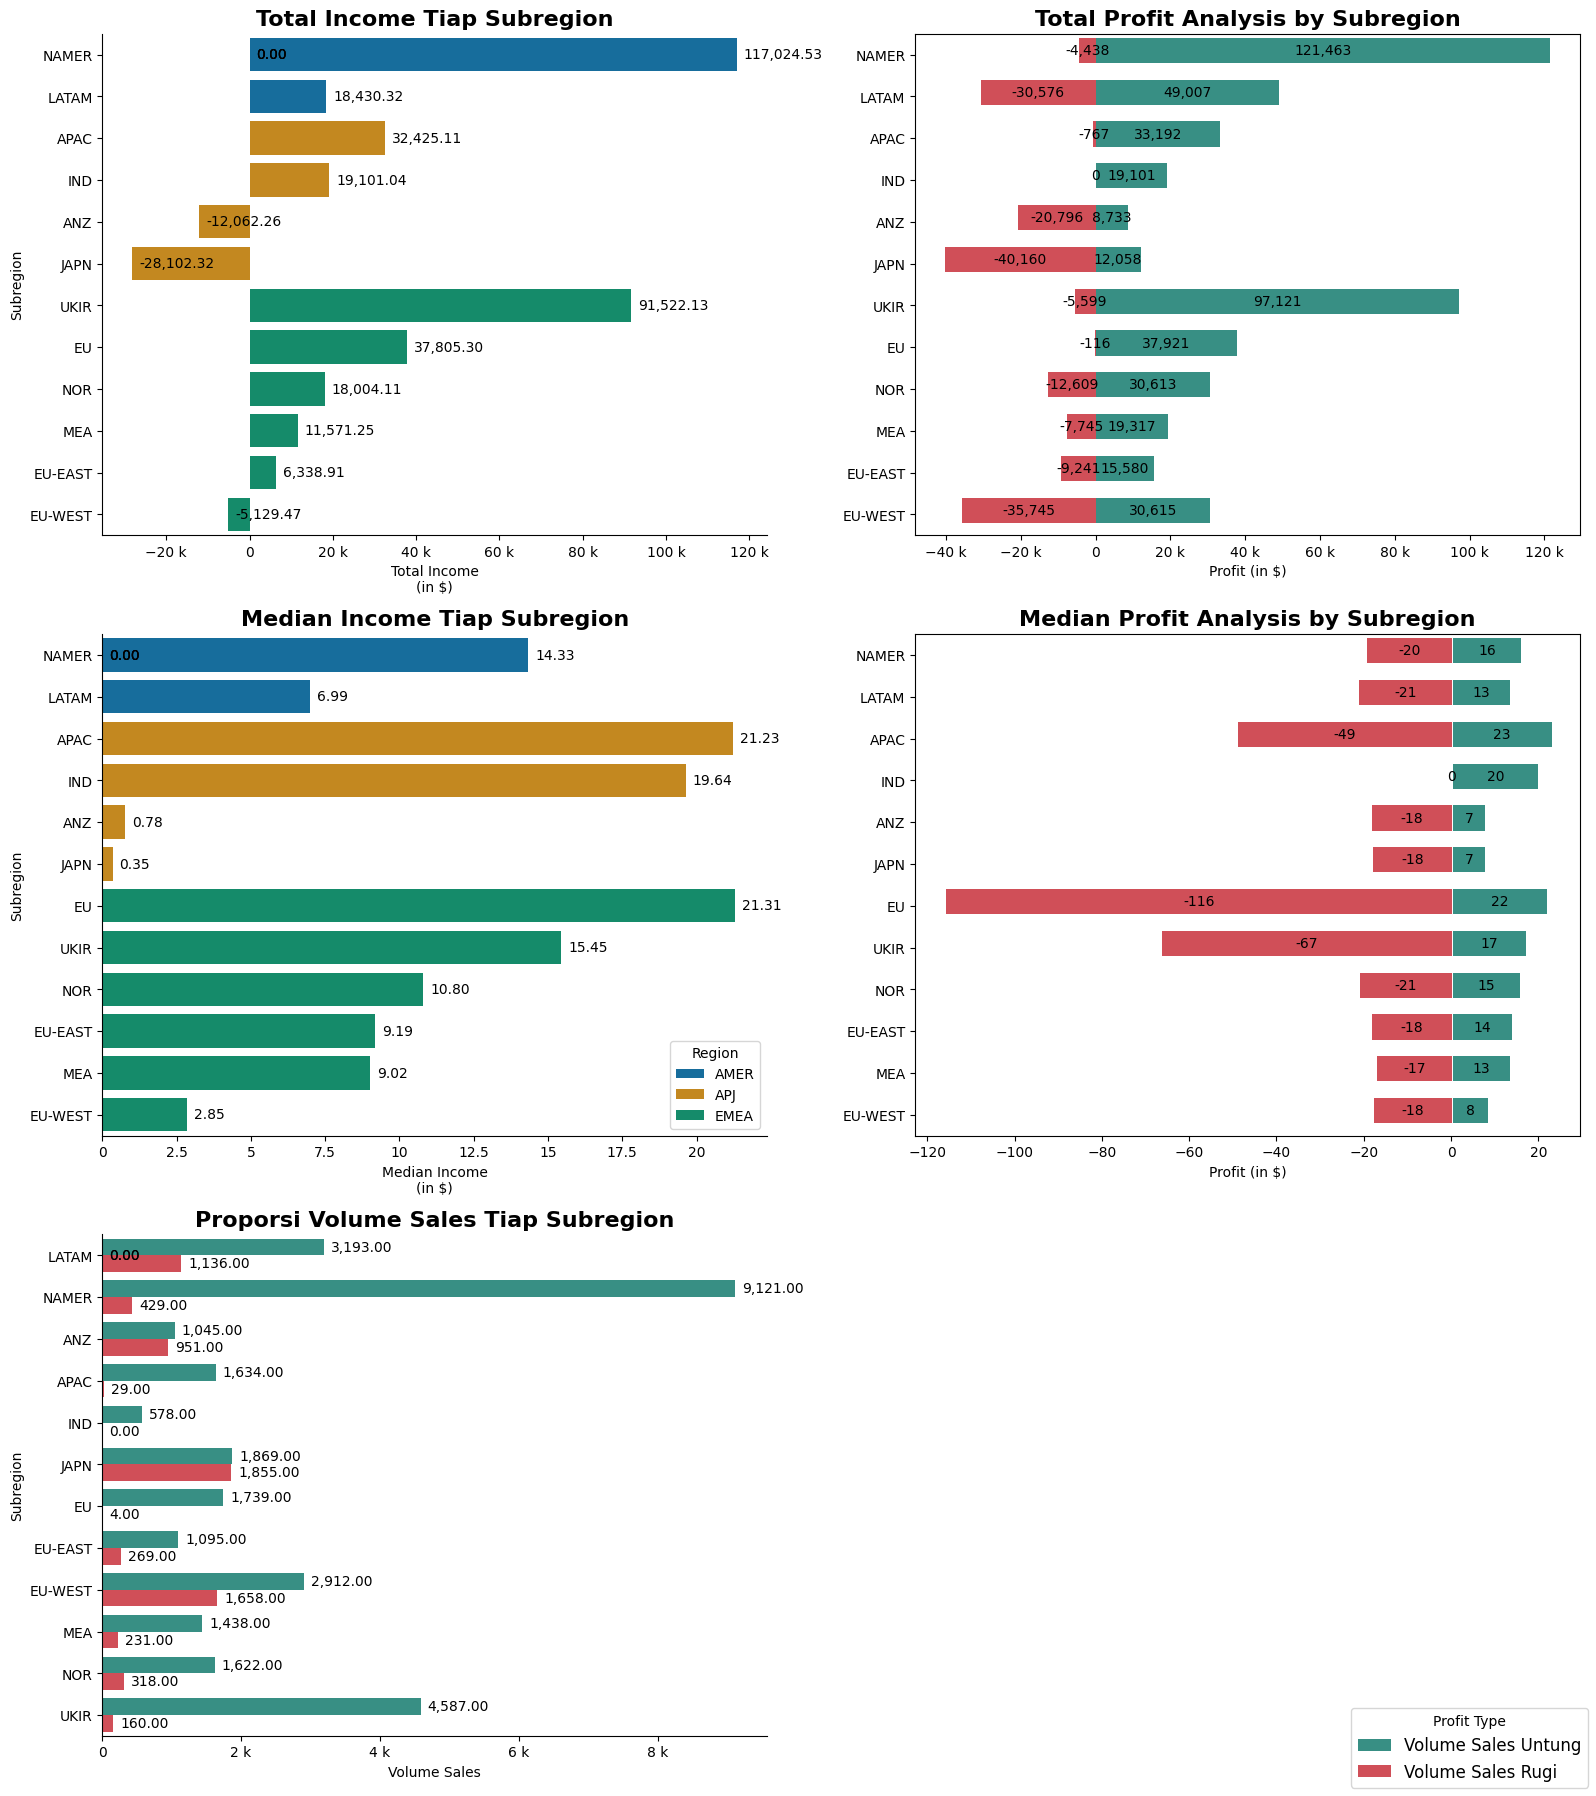

In [687]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(16, 18))

# Total Income
sns.barplot(
    data=df_Subregion.sort_values(['Region','Total_Income'], ascending=[True,False]),
    x='Total_Income',
    y='Subregion',
    ax=axes[0,0],
    palette='colorblind',
    hue='Region'
)

axes[0,0].set(
    xlabel='Total Income\n(in $)',
    ylabel='Subregion',
    title='Total Income Tiap Subregion'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

axes[0, 0].get_legend().remove()

# Median Income
sns.barplot(
    data=df_Subregion.sort_values(['Region','Median_Income'], ascending=[True,False]),
    x='Median_Income',
    y='Subregion',
    ax=axes[1,0],
    palette='colorblind',
    hue='Region'
)

axes[1,0].set(
    xlabel='Median Income\n(in $)',
    ylabel='Subregion',
    title='Median Income Tiap Subregion'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

# Tornado chart total
bar01 = sns.barplot(
    data=df_Subregion.sort_values(['Region','Total_Income'], ascending=[True,False]),
    y='Subregion',
    x='Total_PosProf',
    color='#2a9d8f',
    ax=axes[0,1]
)

for patch in bar01.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar02 = sns.barplot(
    data=df_Subregion.sort_values(['Region','Total_Income'], ascending=[True,False]),
    y='Subregion',
    x='Total_NegProf',
    color='#e63946',
    ax=axes[0,1]
)

for patch in bar02.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[0,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Total Profit Analysis\nby Subregion'
)
axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0,1].set_title('Total Profit Analysis by Subregion', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[0,1], data=pd.concat([df_Subregion.sort_values(['Region','Total_Income'], ascending=[True,False])['Total_PosProf'], df_Subregion.sort_values(['Region','Total_Income'], ascending=[True,False])['Total_NegProf']], ignore_index=True), position='inside', type='barh')

# Tornado chart median
bar11 = sns.barplot(
    data=df_Subregion.sort_values(['Region','Median_Income'], ascending=[True,False]),
    y='Subregion',
    x='Median_PosProf',
    color='#2a9d8f',
    ax=axes[1,1]
)

for patch in bar11.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar12 = sns.barplot(
    data=df_Subregion.sort_values(['Region','Median_Income'], ascending=[True,False]),
    y='Subregion',
    x='Median_NegProf',
    color='#e63946',
    ax=axes[1,1]
)

for patch in bar12.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[1,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Median Profit Analysis\nby Subregion'
)
axes[1,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1,1].set_title('Median Profit Analysis by Subregion', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[1,1], data=pd.concat([df_Subregion.sort_values(['Region','Median_Income'], ascending=[True,False])['Median_PosProf'], df_Subregion.sort_values(['Region','Median_Income'], ascending=[True,False])['Median_NegProf']], ignore_index=True), position='inside', type='barh')


# Volume untung rugi
sns.barplot(
    data=df_Subregion.melt(
        id_vars='Subregion', 
        value_vars=['Volume_PosProf', 'Volume_NegProf'], 
        var_name='Profit_Type', 
        value_name='Volume'
    ),
    y='Subregion',
    x='Volume',
    palette={'Volume_PosProf': '#2a9d8f', 'Volume_NegProf': '#e63946'},
    hue='Profit_Type',
    ax=axes[2,0]
)

axes[2,0].set(
    xlabel='Volume Sales',
    ylabel='Subregion',
    title='Proporsi Volume Sales Tiap Subregion'
)

axes[2,0].title.set_fontsize(16)  
axes[2,0].title.set_fontweight('bold')  

axes[2,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[2,0])
annotate_bar(axes[2,0], 'barh')

axes[2, 0].legend_.remove()

handles, labels = axes[2, 0].get_legend_handles_labels()
custom_labels = ['Volume Sales Untung', 'Volume Sales Rugi']
fig.legend(
    handles=handles, 
    labels=custom_labels, 
    loc='lower right', 
    fontsize=12,
    title='Profit Type'
)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. Secara total `Profit`, `Subregion` NAMER memiliki total keuntungan tertinggi sebesar $117,024
> 1. Secara total `Profit`, terdapat **3 subregion yang memiliki total negatif atau mengalami kerugian**. Diurutkan dari kerugian yang paling besar `Subregion` *JAPN, ANZ, dan EU-WEST*
> 1. Secara proporsi `Profit`, `Subregion` NAMER memiliki total profit positif tertinggi sebesar $121,463
> 1. Secara proporsi `Profit`, `Subregion` JAPN memiliki total profit negatif terbesar sebesar $40,160
> 1. Secara median `Profit`, `Subregion` EU memiliki median profit tertinggi sebesar $21.31
> 1. Secara proporsi median `Profit`, `Subregion` APAC memiliki median profit positif tertinggi sebesar $23
> 1. Secara proporsi median `Profit`, `Subregion` EU memiliki median profit negatif terbesar sebesar $116
> 1. Secara proporsi volume `Sales`, `Subregion` NAMER memiliki volume profit positif tertinggi sebesar 9,121 unit
> 1. Secara proporsi volume `Sales`, `Subregion` JAPN dan ANZ memiliki rasio volume profit negatif dan positif yang hampir sama

Analisis `Profit Margin` tiap-tiap `Region`

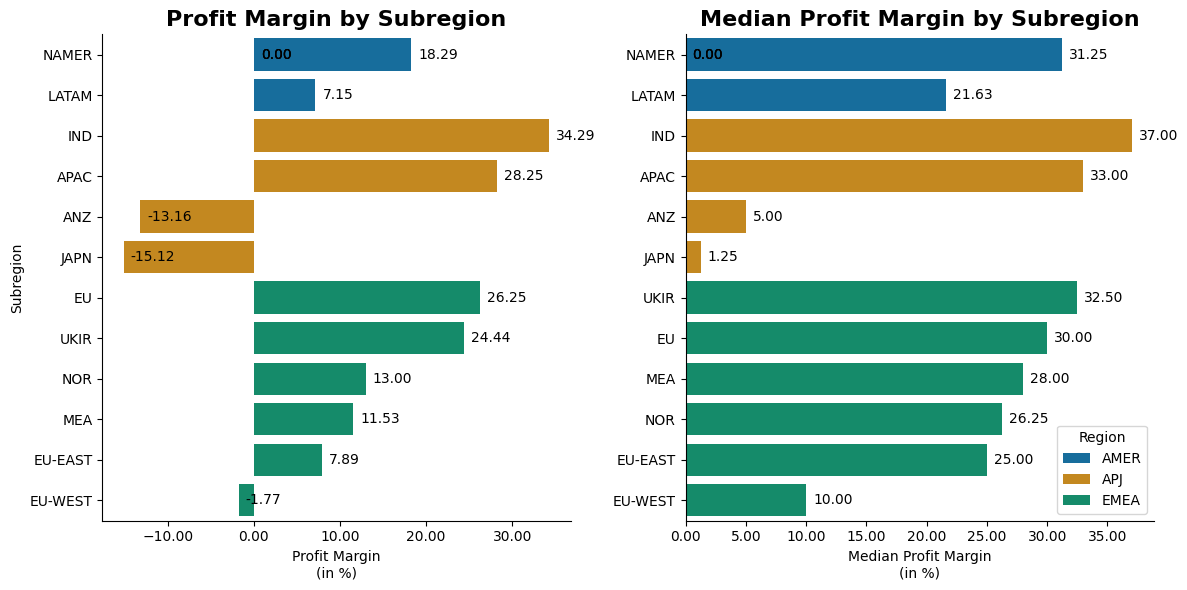

In [688]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

# Profit Margin
sns.barplot(
    data=df_Subregion.sort_values(['Region','Profit_Margin'], ascending=[True,False]),
    y='Subregion',
    x='Profit_Margin',
    ax=axes[0],
    palette='colorblind',
    hue='Region'
)
axes[0].set(
    ylabel='Subregion',
    xlabel='Profit Margin\n(in %)',
    title='Profit Margin by Subregion'
)
axes[0].title.set_fontsize(16)
axes[0].title.set_fontweight('bold')
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[0])
annotate_bar(axes[0], type='barh')

axes[0].get_legend().remove()

# Median Profit Margin
sns.barplot(
    data=df_Subregion.sort_values(['Region','Median_PM'], ascending=[True,False]),
    y='Subregion',
    x='Median_PM',
    ax=axes[1],
    palette='colorblind',
    hue='Region'
)
axes[1].set(
    ylabel='',
    xlabel='Median Profit Margin\n(in %)',
    title='Median Profit Margin by Subregion'
)
axes[1].title.set_fontsize(16)
axes[1].title.set_fontweight('bold')
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[1])
annotate_bar(axes[1], type='barh')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. `Subregion` IND memiliki `Profit Margin` total tertinggi diantara subregion lainnya yaitu sebesar 34.29%. Hal ini menandakan **dari total penjualan, Subregion IND berhasil mengkonversi 34.29% dari total penjualan tersebut menjadi keuntungan**
> 1. `Subregion` ANZ dan JAPN memiliki `Profit Margin` total bernilai negatif yang menandakan **total penjualan dari kedua region tersebut mengakibatkan kerugian**
> 1. `Subregion` IND memiliki `Profit Margin` tipikal per transaksi (*median*) tertinggi diantara subregion lainnya yaitu sebesar 37%. Hal ini menandakan **dari median penjualan, Subregion IND berhasil mengkonversi 37% dari total penjualan tersebut menjadi keuntungan**
> 1. Berdasarkan analisis tersebut, dapat dikatakan ***Subregion IND merupakan Subregion dengan tingkat profitabilitas tertinggi diantara subregion lainnya***

Analisis `Product` tiap-tiap `Subregion`

Akan dilakukan pengujian `Chi-Square` untuk menguji apakah `Subregion` memiliki keterkaitan dengan pilihan `Product` yang akan dibeli sehingga:
- H0: `Subregion` dan `Product` tidak terkait/independent (memiliki proporsi yang sama)
- H1: `Subregion` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan)

Untuk mencari keterkaitan, digunakan **total volume penjualan atau `Quantity`** tiap-tiap `Product` untuk tiap-tiap Subregion lalu dibentuk crosstab untuk `Product` dengan volume pejualan tertinggi pada urutan pertama hingga kelima untuk masing-masing `Subregion`.

In [689]:
SubrProd = df.groupby(['Subregion', 'Product'],as_index=False).agg(
    Total_Volume=('Quantity','sum')
)

In [690]:
from scipy.stats import chi2_contingency

n_values = [1, 2, 3, 4, 5]

alpha = 0.05

results = []

for n in n_values:
    TopSubrProd = (SubrProd.sort_values(['Subregion', 'Total_Volume'], ascending=[True, False])
                          .groupby('Subregion')
                          .head(n))
    
    ctTopSubrProd = pd.crosstab(TopSubrProd['Subregion'],
                               TopSubrProd['Product'],
                               values=TopSubrProd['Product'],
                               aggfunc='count',
                               margins=False
                              ).fillna(0)
    
    chi2, pvalue, dof, exp = chi2_contingency(ctTopSubrProd)
    
    hasil_uji = 'Reject H0' if pvalue < alpha else 'Fail to reject H0'
    
    results.append({'Top-n': n, 'Stat Value': chi2, 'P-Value': pvalue, 'Hasil Uji': hasil_uji})

results_df = pd.DataFrame(results)

results_df

Top-n  Stat Value   P-Value          Hasil Uji
0      1        12.0  0.363643  Fail to reject H0
1      2         0.0  1.000000  Fail to reject H0
2      3        36.0  0.977802  Fail to reject H0
3      4        36.0  0.999040  Fail to reject H0
4      5        48.0  0.999841  Fail to reject H0

Berdasarkan uji hipotesis diatas, didapat ***insight***:
> 1. Tidak terdapat cukup bukti untuk mengatakan bahwa `Subregion` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan) untuk top product pertama hingga kelima

Untuk tiap-tiap `Subregion`, dapat dilihat 5 top `Product` dengan volume penjualan tertinggi seperti berikut

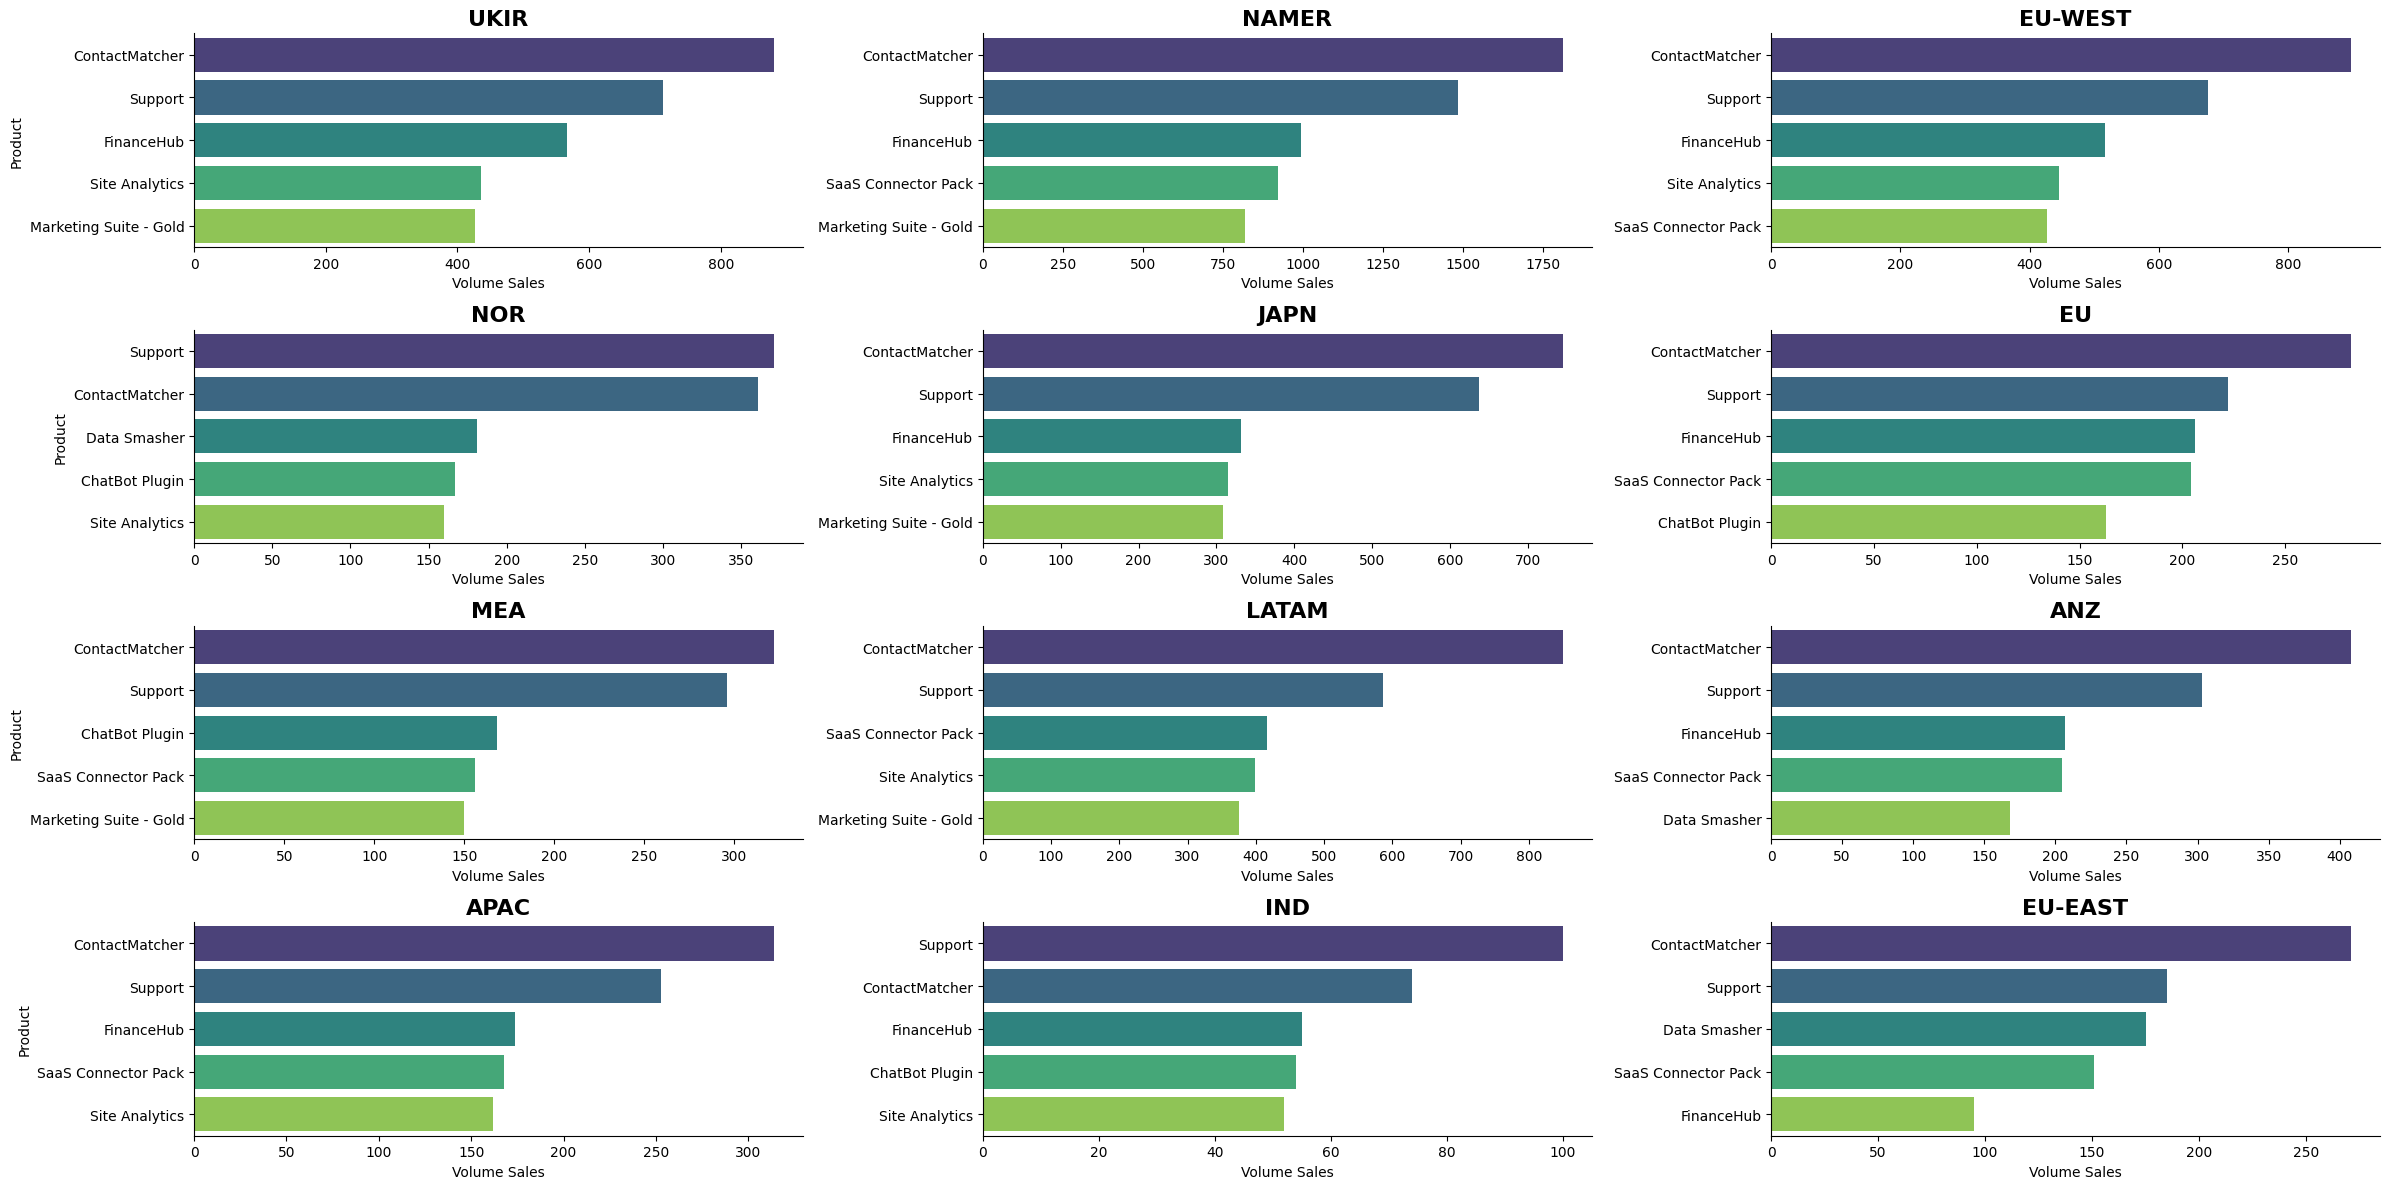

In [691]:
# Tiap Subregion 5 produk paling laku
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 12))

Subregion = ['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM', 'ANZ', 'APAC', 'IND', 'EU-EAST']

axes_flat = axes.flatten()

for i, ind in enumerate(Subregion):
    if i < len(axes_flat):
        sns.barplot(
            data=SubrProd[SubrProd['Subregion'] == ind].sort_values('Total_Volume', ascending=False).head(),
            x='Total_Volume',
            y='Product',
            ax=axes_flat[i],
            palette='viridis'
        )
        axes_flat[i].set_title(ind, fontsize=16, fontweight='bold')
        axes_flat[i].set_xlabel('Volume Sales')
        if i % ncols == 0:
            axes_flat[i].set_ylabel('Product')
        else:
            axes_flat[i].set_ylabel('')
        despine(axes_flat[i])

for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])


plt.tight_layout()
plt.show()

### 3. Analisis berdasarkan `Industry`

Seperti yang telah tertera pada bab-bab sebelumnya, kolom `Industry` menandakan **fokus industri dari perusahaan pemesan**. Akan dilakukan analisis terhadap variabel `Industry` untuk menjawab:
1. Bagaimana kondisi `Sales` untuk tiap-tiap `Industry`?
1. Bagaimana kondisi `Profit` untuk tiap-tiap `Industry`?
1. `Industry` mana yang memiliki tingkat profitabilitas tertinggi?
1. Apakah terdapat keterkaitan antara top `Product` dengan `Industry`?

Sebelum dilakukan analisis-analisis tersebut, akan terlebih dahulu dicari informasi umum mengenai variabel `Industry`.

In [692]:
# groupby Industry
df_Industry = df_2.groupby('Industry', as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Total_Volume=('Quantity', 'sum'),
    Total_Income=('Profit (PV)', 'sum'),
    Median_Income=('Profit (PV)', 'median'),
    Median_PM=('Profit Margin', 'median'),
    Total_PosProf=('Profit (PV)', lambda x: x[x >= 0].sum()),
    Median_PosProf=('Profit (PV)', lambda x: x[x >= 0].median()),
    Total_NegProf=('Profit (PV)', lambda x: x[x < 0].sum()),
    Median_NegProf=('Profit (PV)', lambda x: x[x < 0].median()),
    Volume_PosProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] >= 0].sum()),
    Volume_NegProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] < 0].sum()),
    n_Customer=('Customer', 'nunique')
)
df_Industry['Profit_Margin'] = round(df_Industry['Total_Income']/df_Industry['Total_Sales'] * 100, 2)
df_Industry

Industry  Total_Sales  Median_Sales  Total_Volume  Total_Income  \
0     Communications  129730.6236      46.25010          2169    15220.9056   
1  Consumer Products  240143.8453      55.01960          3870    38749.2747   
2             Energy  327469.2402      54.13110          4920    49002.9103   
3            Finance  507766.8642      62.58780          8007    53627.7376   
4         Healthcare  297451.3480      63.56950          4022    34593.8029   
5      Manufacturing  316949.5500      60.16410          4586    41986.5650   
6               Misc   30685.0062      63.58730           413     7585.4318   
7             Retail  239801.8736      54.68780          3693    32211.8678   
8               Tech  285401.1386      60.49995          4816    26165.5075   
9     Transportation   97596.1240      59.38020          1377     7784.6531   

   Median_Income  Median_PM  Total_PosProf  Median_PosProf  Total_NegProf  \
0        7.35200  26.999957     24557.8843        12.43510     -9336.9787   
1        8.08420  26.249992     52387.4675        12.22135    -13638.1928   
2        8.28930  27.000028     65796.6583        12.68820    -16793.7480   
3        9.58580  26.999982     92455.3183        15.24440    -38827.5807   
4        9.58450  26.999986     52539.9638        14.85440    -17946.1609   
5        9.37925  28.000000     62258.6147        14.80390    -20272.0497   
6       15.88690  29.000045      8580.5551        23.86990      -995.1233   
7        9.95950  27.999942     48750.6091        14.28700    -16538.7413   
8        9.54315  27.000041     50943.3393        14.62730    -24777.8318   
9        9.22710  26.000003     16449.6203        16.28725     -8664.9672   

   Median_NegProf  Volume_PosProf  Volume_NegProf  n_Customer  Profit_Margin  
0       -16.03155            1684             485           5          11.73  
1       -17.02760            3075             795           9          16.14  
2       -20.90310            3911            1009          14          14.96  
3       -19.54295            6621            1386          20          10.56  
4       -22.07950            3262             760          10          11.63  
5       -19.23530            3744             842          11          13.25  
6        -7.67240             357              56           2          24.72  
7       -20.25610            3132             561          11          13.43  
8       -22.68290            3909             907          13           9.17  
9       -16.01220            1138             239           4           7.98

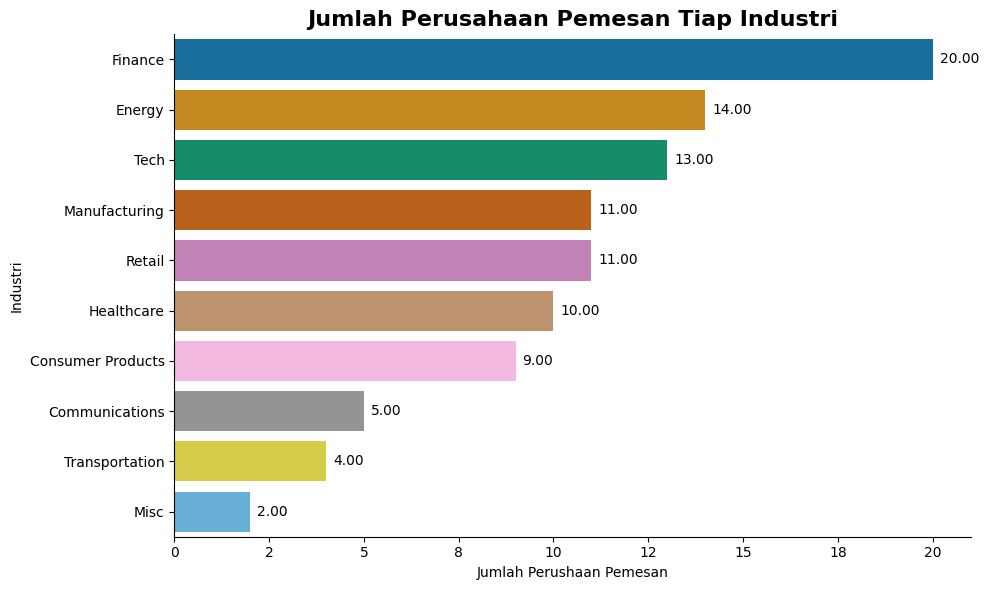

In [693]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(
    data=df_Industry.sort_values('n_Customer', ascending=False),
    x='n_Customer',
    y='Industry',
    ax=ax,
    palette='colorblind'
)

ax.set(
    xlabel='Jumlah Perushaan Pemesan',
    ylabel='Industri',
    title='Jumlah Perusahaan Pemesan Tiap Industri'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
despine(ax)
annotate_bar(ax, 'barh')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. *Finance, Energy,* dan *Tech* merupakan jenis industri dengan jumlah perusahaan terbanyak yang melakukan pembelian. Secara berurutan terdapat 20, 14, dan 13 perusahaan.

Analisis `Sales` tiap-tiap `Industry`

Digunakan total `Sales`, total volume sales `Quantity`, serta median `Sales` untuk tiap-tiap `Industry` dalam melakukan analisis seperti berukit.

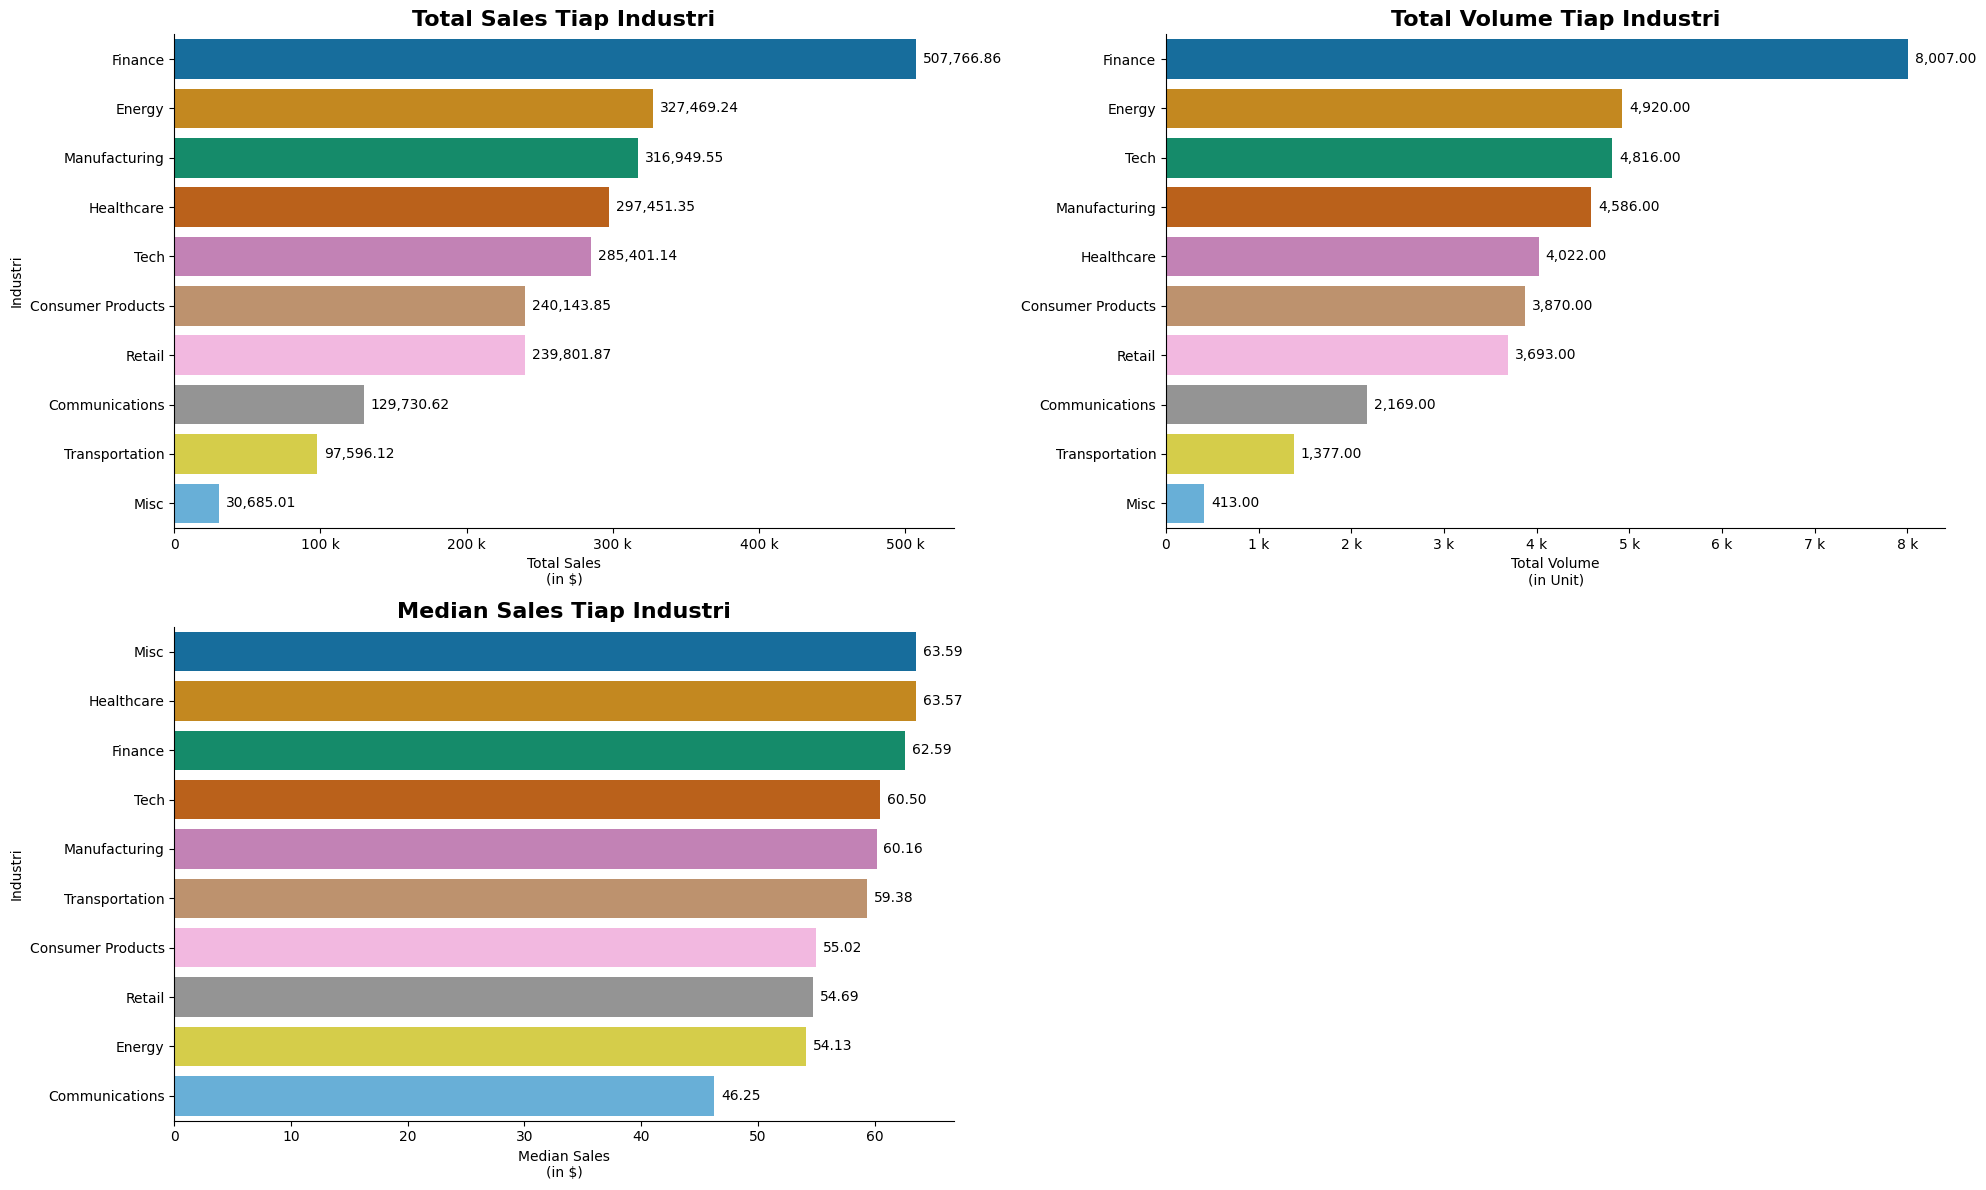

In [694]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20, 12))

# Total Sales
sns.barplot(
    data=df_Industry.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Industry',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Sales\n(in $)',
    ylabel='Industri',
    title='Total Sales Tiap Industri'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Volume Sales
sns.barplot(
    data=df_Industry.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Industry',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Total Volume\n(in Unit)',
    ylabel='',
    title='Total Volume Tiap Industri'
)

axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold')  

axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Sales
sns.barplot(
    data=df_Industry.sort_values('Median_Sales', ascending=False),
    x='Median_Sales',
    y='Industry',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Sales\n(in $)',
    ylabel='Industri',
    title='Median Sales Tiap Industri'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa seluruh industri memiliki **proprsi volume sales yang berbeda**. Oleh karena itu, akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa penjualan *(median sales)* untuk tiap-tiap industri berbeda signifikan** dengan:
- H0: Median Sales untuk setiap industri bernilai sama
- H1: Minimal ada 1 industri yang berbeda median Sales-nya. Tetapi kita tidak tahu yang mana.

In [695]:
industries = ['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing', 'Retail', 'Consumer Products', 'Misc', 'Transportation', 'Communications']

In [696]:
from scipy.stats import kruskal

dataInd = [df[df['Industry']==ind]['Sales (PV)'] for ind in industries]

stat, pvalue = kruskal(*dataInd)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 9.2864
p-value            : 0.4113
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Sales`, `Industry` Finance memiliki **tingkat penjualan tertinggi** diantara industri lainnya yaitu sebesar $507,766
> 1. Secara volume penjualan, `Industry` Finance memiliki **volume penjualan tertinggi** diantara industri lainnya yaitu sebesar 8,007 unit
> 1. Secara performa penjualan, dilakukan uji hipotesis dengan kesimpulan yang menandakan **tidak terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 industri dimana nilai median Sales-nya berbeda signifikan**. Berdasarkan pembacaan grafik, didapat median `Sales` untuk `Industry` MISC memiliki nilai tertinggi diantara industri lainnya.

Berdasarkan ***insight*** tersebut, dapat disimpulkan **secara performa penjualan, tingkat `Sales` tidak dipengaruhi oleh `Industry` customer**

Analisis `Profit` tiap-tiap `Industry`

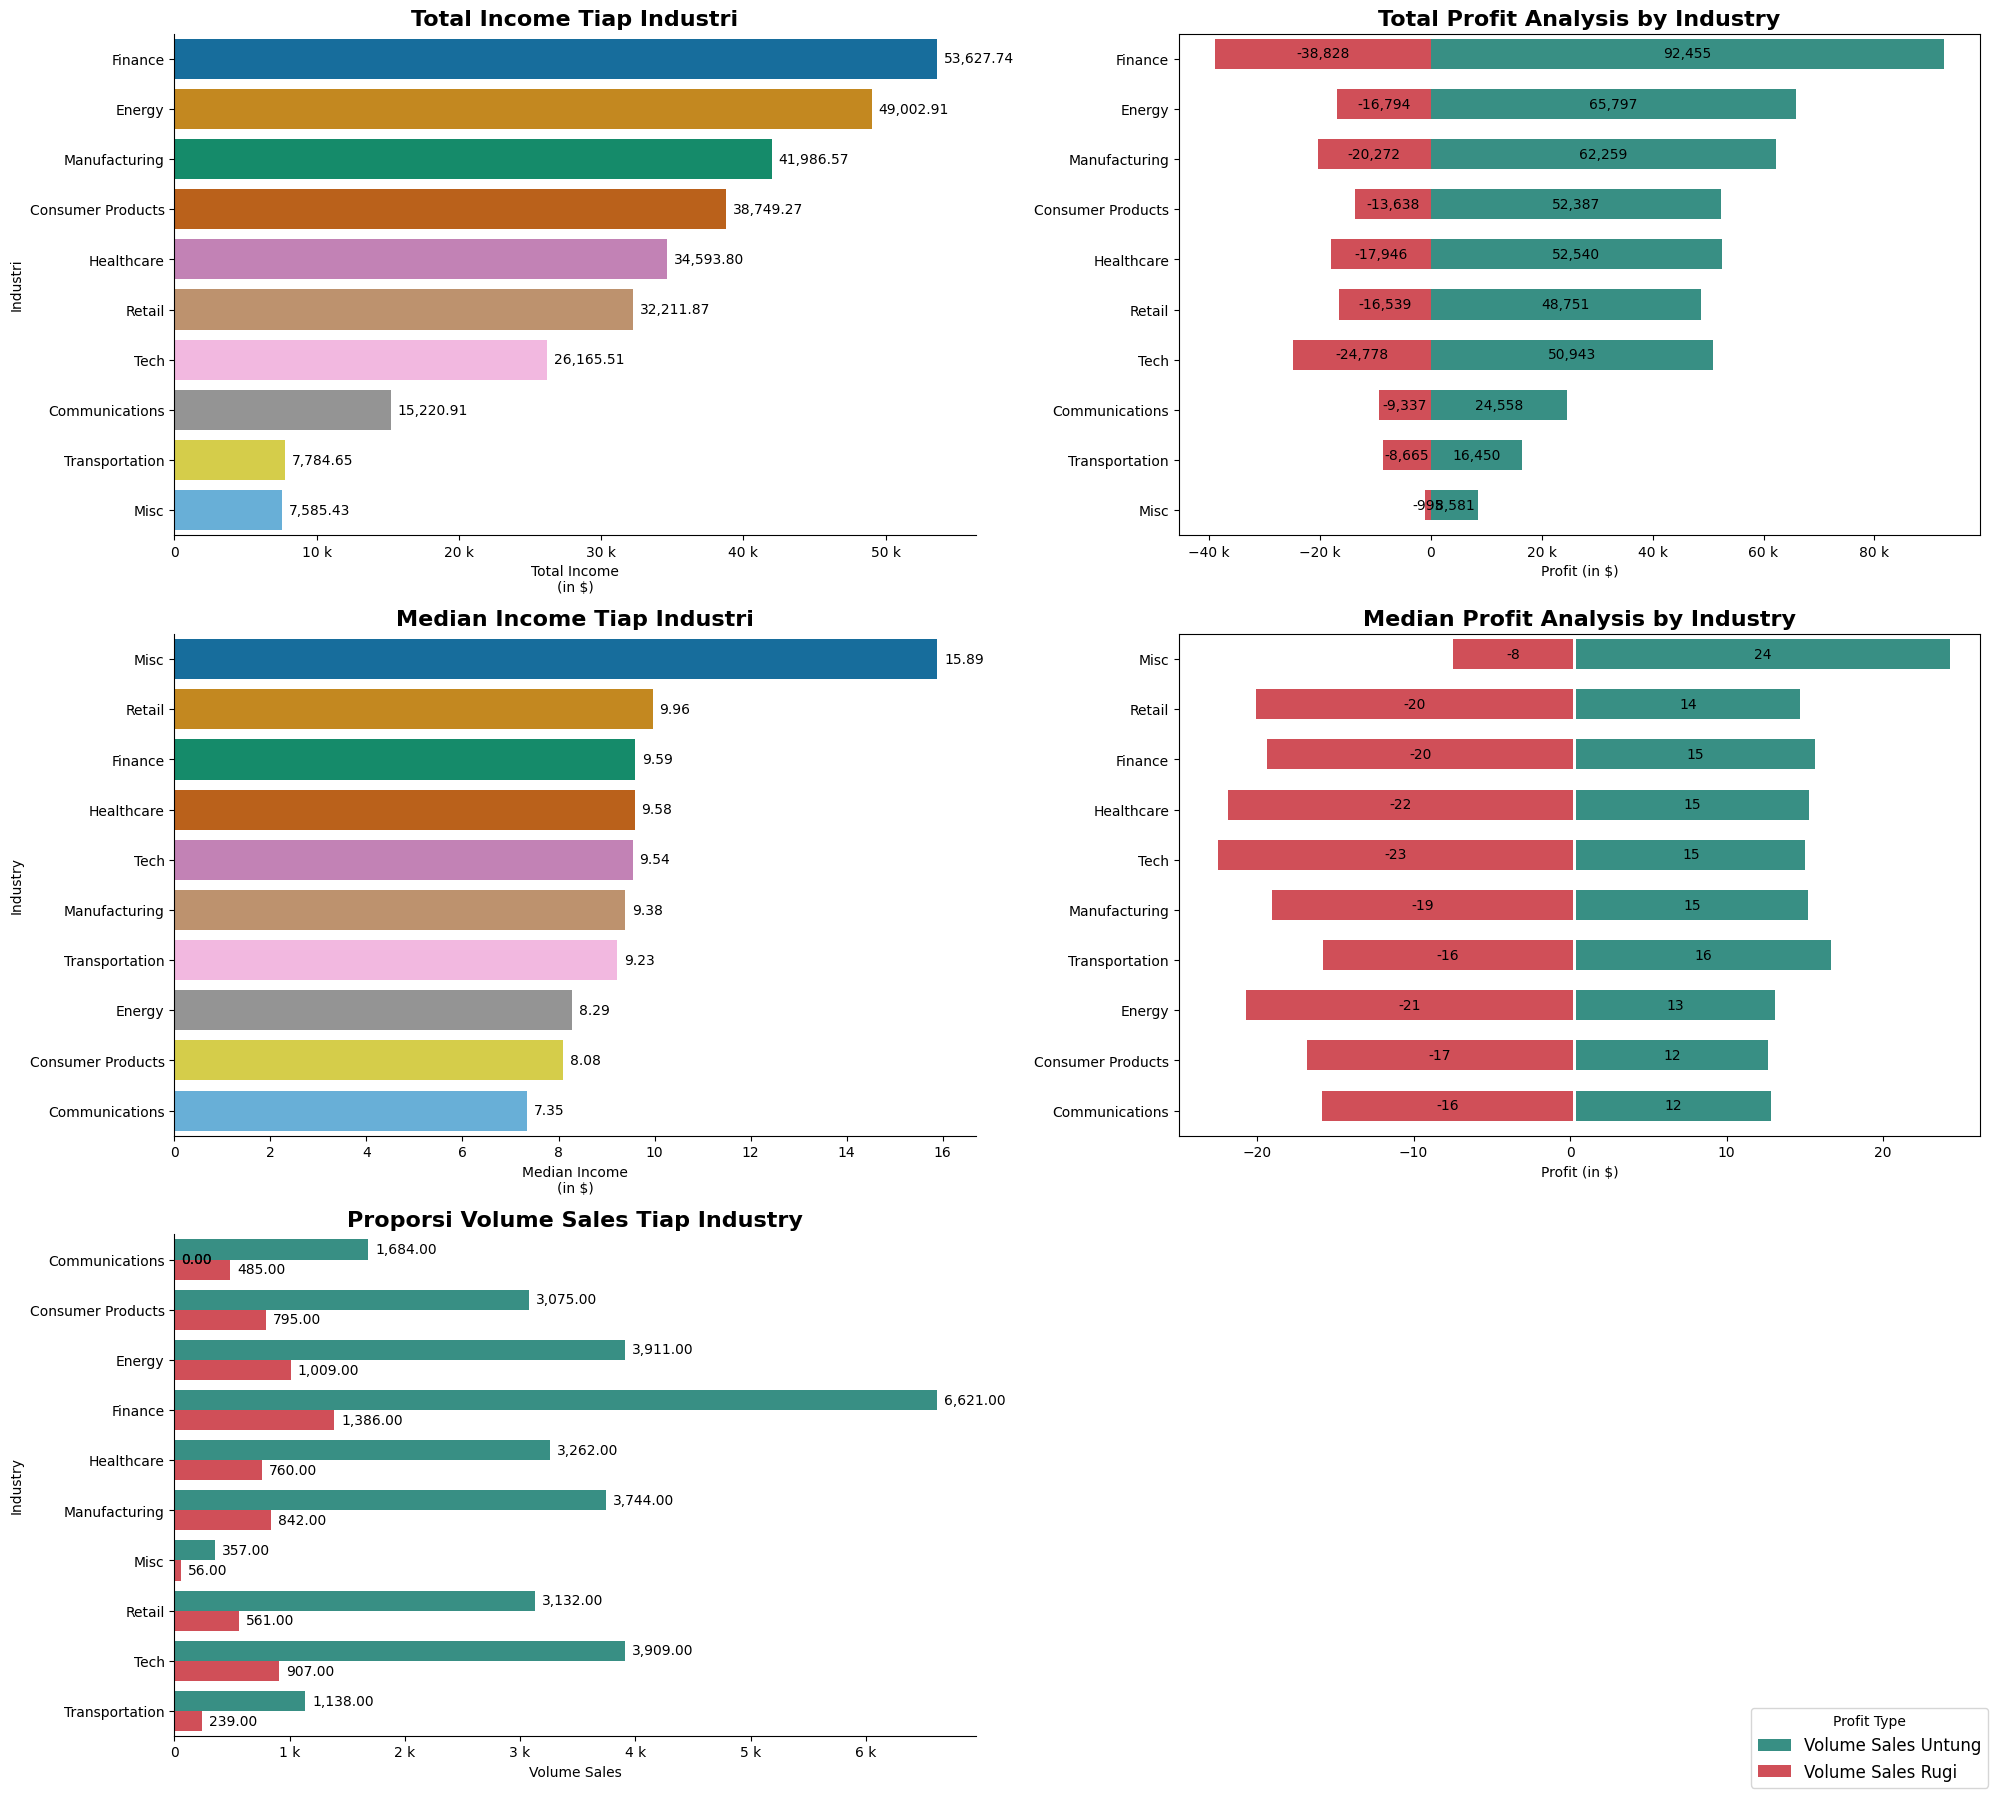

In [697]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20, 18))

# Total Income
sns.barplot(
    data=df_Industry.sort_values('Total_Income', ascending=False),
    x='Total_Income',
    y='Industry',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Income\n(in $)',
    ylabel='Industri',
    title='Total Income Tiap Industri'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Income
sns.barplot(
    data=df_Industry.sort_values('Median_Income', ascending=False),
    x='Median_Income',
    y='Industry',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Income\n(in $)',
    ylabel='Industry',
    title='Median Income Tiap Industri'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

# Tornado chart total
bar01 = sns.barplot(
    data=df_Industry.sort_values('Total_Income', ascending=False),
    y='Industry',
    x='Total_PosProf',
    color='#2a9d8f',
    ax=axes[0,1]
)

for patch in bar01.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar02 = sns.barplot(
    data=df_Industry,
    y='Industry',
    x='Total_NegProf',
    color='#e63946',
    ax=axes[0,1]
)

for patch in bar02.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[0,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Total Profit Analysis\nby Industry'
)
axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0,1].set_title('Total Profit Analysis by Industry', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[0,1], data=pd.concat([df_Industry.sort_values('Total_Income', ascending=False)['Total_PosProf'], df_Industry.sort_values('Total_Income', ascending=False)['Total_NegProf']], ignore_index=True), position='inside', type='barh')

# Tornado chart median
bar11 = sns.barplot(
    data=df_Industry.sort_values('Median_Income', ascending=False),
    y='Industry',
    x='Median_PosProf',
    color='#2a9d8f',
    ax=axes[1,1]
)

for patch in bar11.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar12 = sns.barplot(
    data=df_Industry,
    y='Industry',
    x='Median_NegProf',
    color='#e63946',
    ax=axes[1,1]
)

for patch in bar12.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[1,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Median Profit Analysis\nby Industry'
)
axes[1,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1,1].set_title('Median Profit Analysis by Industry', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[1,1], data=pd.concat([df_Industry.sort_values('Median_Income', ascending=False)['Median_PosProf'], df_Industry.sort_values('Median_Income', ascending=False)['Median_NegProf']], ignore_index=True), position='inside', type='barh')
# Volume untung rugi
sns.barplot(
    data=df_Industry.melt(
        id_vars='Industry', 
        value_vars=['Volume_PosProf', 'Volume_NegProf'], 
        var_name='Profit_Type', 
        value_name='Volume'
    ),
    y='Industry',
    x='Volume',
    palette={'Volume_PosProf': '#2a9d8f', 'Volume_NegProf': '#e63946'},
    hue='Profit_Type',
    ax=axes[2,0]
)

axes[2,0].set(
    xlabel='Volume Sales',
    ylabel='Industry',
    title='Proporsi Volume Sales Tiap Industry'
)

axes[2,0].title.set_fontsize(16)  
axes[2,0].title.set_fontweight('bold')  

axes[2,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[2,0])
annotate_bar(axes[2,0], 'barh')

axes[2, 0].legend_.remove()

handles, labels = axes[2, 0].get_legend_handles_labels()
custom_labels = ['Volume Sales Untung', 'Volume Sales Rugi']
fig.legend(
    handles=handles, 
    labels=custom_labels, 
    loc='lower right', 
    fontsize=12,
    title='Profit Type'
)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa keuntungan *(median profit)* untuk tiap-tiap industrinya berbeda signifikan** dengan:
- H0: Median Profit untuk setiap tahunnya bernilai sama
- H1: Minimal ada 1 region yang berbeda median Profit-nya. Tetapi kita tidak tahu yang mana.

In [698]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Industry']=='Energy']['Profit (PV)'],
        df[df['Industry']=='Finance']['Profit (PV)'],
        df[df['Industry']=='Tech']['Profit (PV)'],
        df[df['Industry']=='Healthcare']['Profit (PV)'],
        df[df['Industry']=='Manufacturing']['Profit (PV)'],
        df[df['Industry']=='Retail']['Profit (PV)'],
        df[df['Industry']=='Consumer Products']['Profit (PV)'],
        df[df['Industry']=='Misc']['Profit (PV)'],
        df[df['Industry']=='Transportation']['Profit (PV)'],
        df[df['Industry']=='Communications']['Profit (PV)']
)
print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 23.7174
p-value            : 0.0048
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Profit`, `Industry` Finance memiliki **tingkat keuntungan tertinggi** diantara industri lainnya yaitu sebesar $53,627
> 1. Secara total keuntungan atau `Profit` dengan nilai positif, `Industry` Finance memiliki **tingkat profit positif tertinggi** diantara industri lainnya yaitu sebesar $92,455
> 1. Secara total kerugian atau `Profit` dengan nilai negatif, `Industry` Finance memiliki **tingkat profit negatif tertinggi** diantara industri lainnya yaitu sebesar $38,828
> 1. Berdasarkan grafik, median `Profit`, `Industry` Misc memiliki **median keuntungan tertinggi** diantara industri lainnya yaitu sebesar $15.89
> 1. Berdasarkan uji hipotesis, didapat kesimpulan **terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 industri dimana nilai median Profit-nya berbeda signifikan tetapi tidak tahu yang mana**. 
> 1. Berdasarkan grafik proporsi profit positif dan negatif, `Industry` Misc memiliki **median profit positif tertinggi dan median profit negatif terendah** diantara industri lainnya

Analisis `Profit Margin` tiap-tiap `Industry`

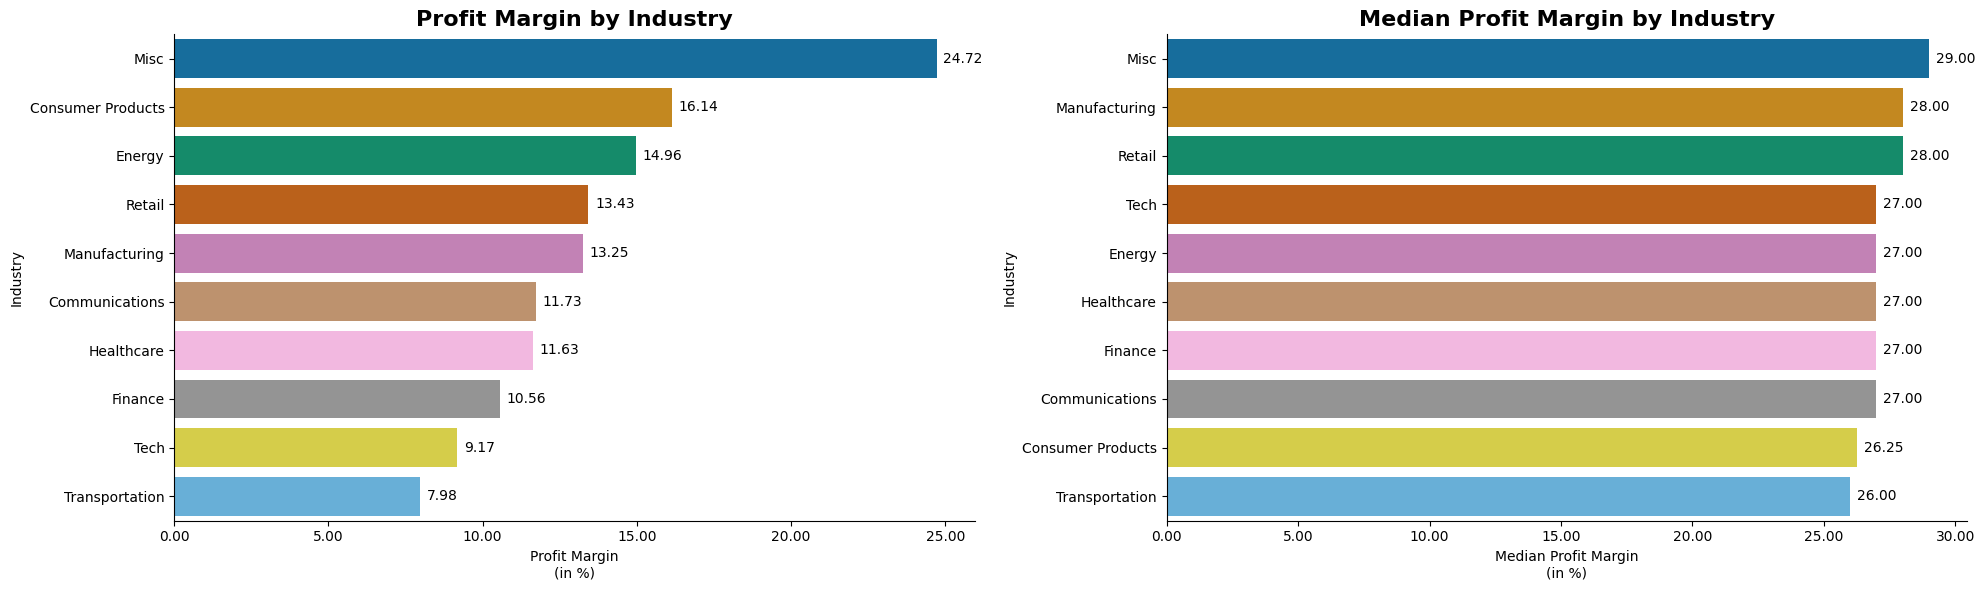

In [699]:
fig, axes = plt.subplots(1,2,figsize=(20,6))

# Profit Margin
sns.barplot(
    data=df_Industry.sort_values('Profit_Margin', ascending=False),
    y='Industry',
    x='Profit_Margin',
    ax=axes[0],
    palette='colorblind'
)
axes[0].set(
    ylabel='Industry',
    xlabel='Profit Margin\n(in %)',
    title='Profit Margin by Industry'
)
axes[0].title.set_fontsize(16)
axes[0].title.set_fontweight('bold')
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[0])
annotate_bar(axes[0], type='barh')

# Median Profit Margin
sns.barplot(
    data=df_Industry.sort_values('Median_PM', ascending=False),
    y='Industry',
    x='Median_PM',
    ax=axes[1],
    palette='colorblind'
)
axes[1].set(
    ylabel='Industry',
    xlabel='Median Profit Margin\n(in %)',
    title='Median Profit Margin by Industry'
)
axes[1].title.set_fontsize(16)
axes[1].title.set_fontweight('bold')
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[1])
annotate_bar(axes[1], type='barh')

plt.tight_layout()
plt.show()

Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **median profit margin untuk tiap-tiap industri berbeda signifikan** dengan:
- H0: Median Profit Negatif untuk setiap industri bernilai sama
- H1: Minimal ada 1 industri yang berbeda median Profit negatif-nya. Tetapi kita tidak tahu yang mana.

In [700]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df_2[df_2['Industry']=='Energy']['Profit Margin'],
        df_2[df_2['Industry']=='Finance']['Profit Margin'],
        df_2[df_2['Industry']=='Tech']['Profit Margin'],
        df_2[df_2['Industry']=='Healthcare']['Profit Margin'],
        df_2[df_2['Industry']=='Manufacturing']['Profit Margin'],
        df_2[df_2['Industry']=='Retail']['Profit Margin'],
        df_2[df_2['Industry']=='Consumer Products']['Profit Margin'],
        df_2[df_2['Industry']=='Misc']['Profit Margin'],
        df_2[df_2['Industry']=='Transportation']['Profit Margin'],
        df_2[df_2['Industry']=='Communications']['Profit Margin']
)
print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 11.7656
p-value            : 0.2268
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Berdasarkan grafik dan uji hipotesis diatas, didapat ***insight***:
> 1. `Industry` Misc memiliki `Profit Margin` total tertinggi diantara industri lainnya yaitu sebesar 24.72%. Hal ini menandakan **dari total penjualan, industri Misc berhasil mengkonversi 24.72% dari total penjualan tersebut menjadi keuntungan**
> 1. Secara uji statistik, **tidak terdapat cukup bukti untuk mengatakan bahwa median Profit Margin tiap-tiap industri berbeda signifikan**

Analisis `Product` tiap-tiap `Industry`

Akan dilakukan pengujian `Chi-Square` untuk menguji apakah `Industry` memiliki keterkaitan dengan pilihan `Product` yang akan dibeli sehingga:
- H0: `Industry` dan `Product` tidak terkait/independent (memiliki proporsi yang sama)
- H1: `Industry` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan)

Untuk mencari keterkaitan, digunakan **total volume penjualan atau `Quantity`** tiap-tiap `Product` untuk tiap-tiap Industry lalu dibentuk crosstab untuk `Product` dengan volume pejualan tertinggi pada urutan pertama hingga kelima untuk masing-masing `Industry`.

In [701]:
IndProd = df.groupby(['Industry', 'Product'],as_index=False).agg(
    Total_Volume=('Quantity','sum')
)

In [702]:
from scipy.stats import chi2_contingency

n_values = [1, 2, 3, 4, 5]

alpha = 0.05

results = []

for n in n_values:
    TopIndProd = (IndProd.sort_values(['Industry', 'Total_Volume'], ascending=[True, False])
                          .groupby('Industry')
                          .head(n))
    
    ctTopIndProd = pd.crosstab(TopIndProd['Industry'],
                               TopIndProd['Product'],
                               values=TopIndProd['Product'],
                               aggfunc='count',
                               margins=False
                              ).fillna(0)
    
    chi2, pvalue, dof, exp = chi2_contingency(ctTopIndProd)
    
    hasil_uji = 'Reject H0' if pvalue < alpha else 'Fail to reject H0'
    
    results.append({'Top-n': n, 'Stat Value': chi2, 'P-Value': pvalue, 'Hasil Uji': hasil_uji})

results_df = pd.DataFrame(results)

results_df

Top-n  Stat Value   P-Value          Hasil Uji
0      1        10.0  0.350485  Fail to reject H0
1      2        10.0  0.931906  Fail to reject H0
2      3        10.0  0.998803  Fail to reject H0
3      4        30.0  0.996688  Fail to reject H0
4      5        30.0  0.999866  Fail to reject H0

Berdasarkan uji hipotesis diatas, didapat ***insight***:
> 1. Tidak terdapat cukup bukti untuk mengatakan bahwa `Industry` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan) untuk top product pertama hingga kelima

Untuk tiap-tiap `Industry`, dapat dilihat 5 top `Product` dengan volume penjualan tertinggi seperti berikut

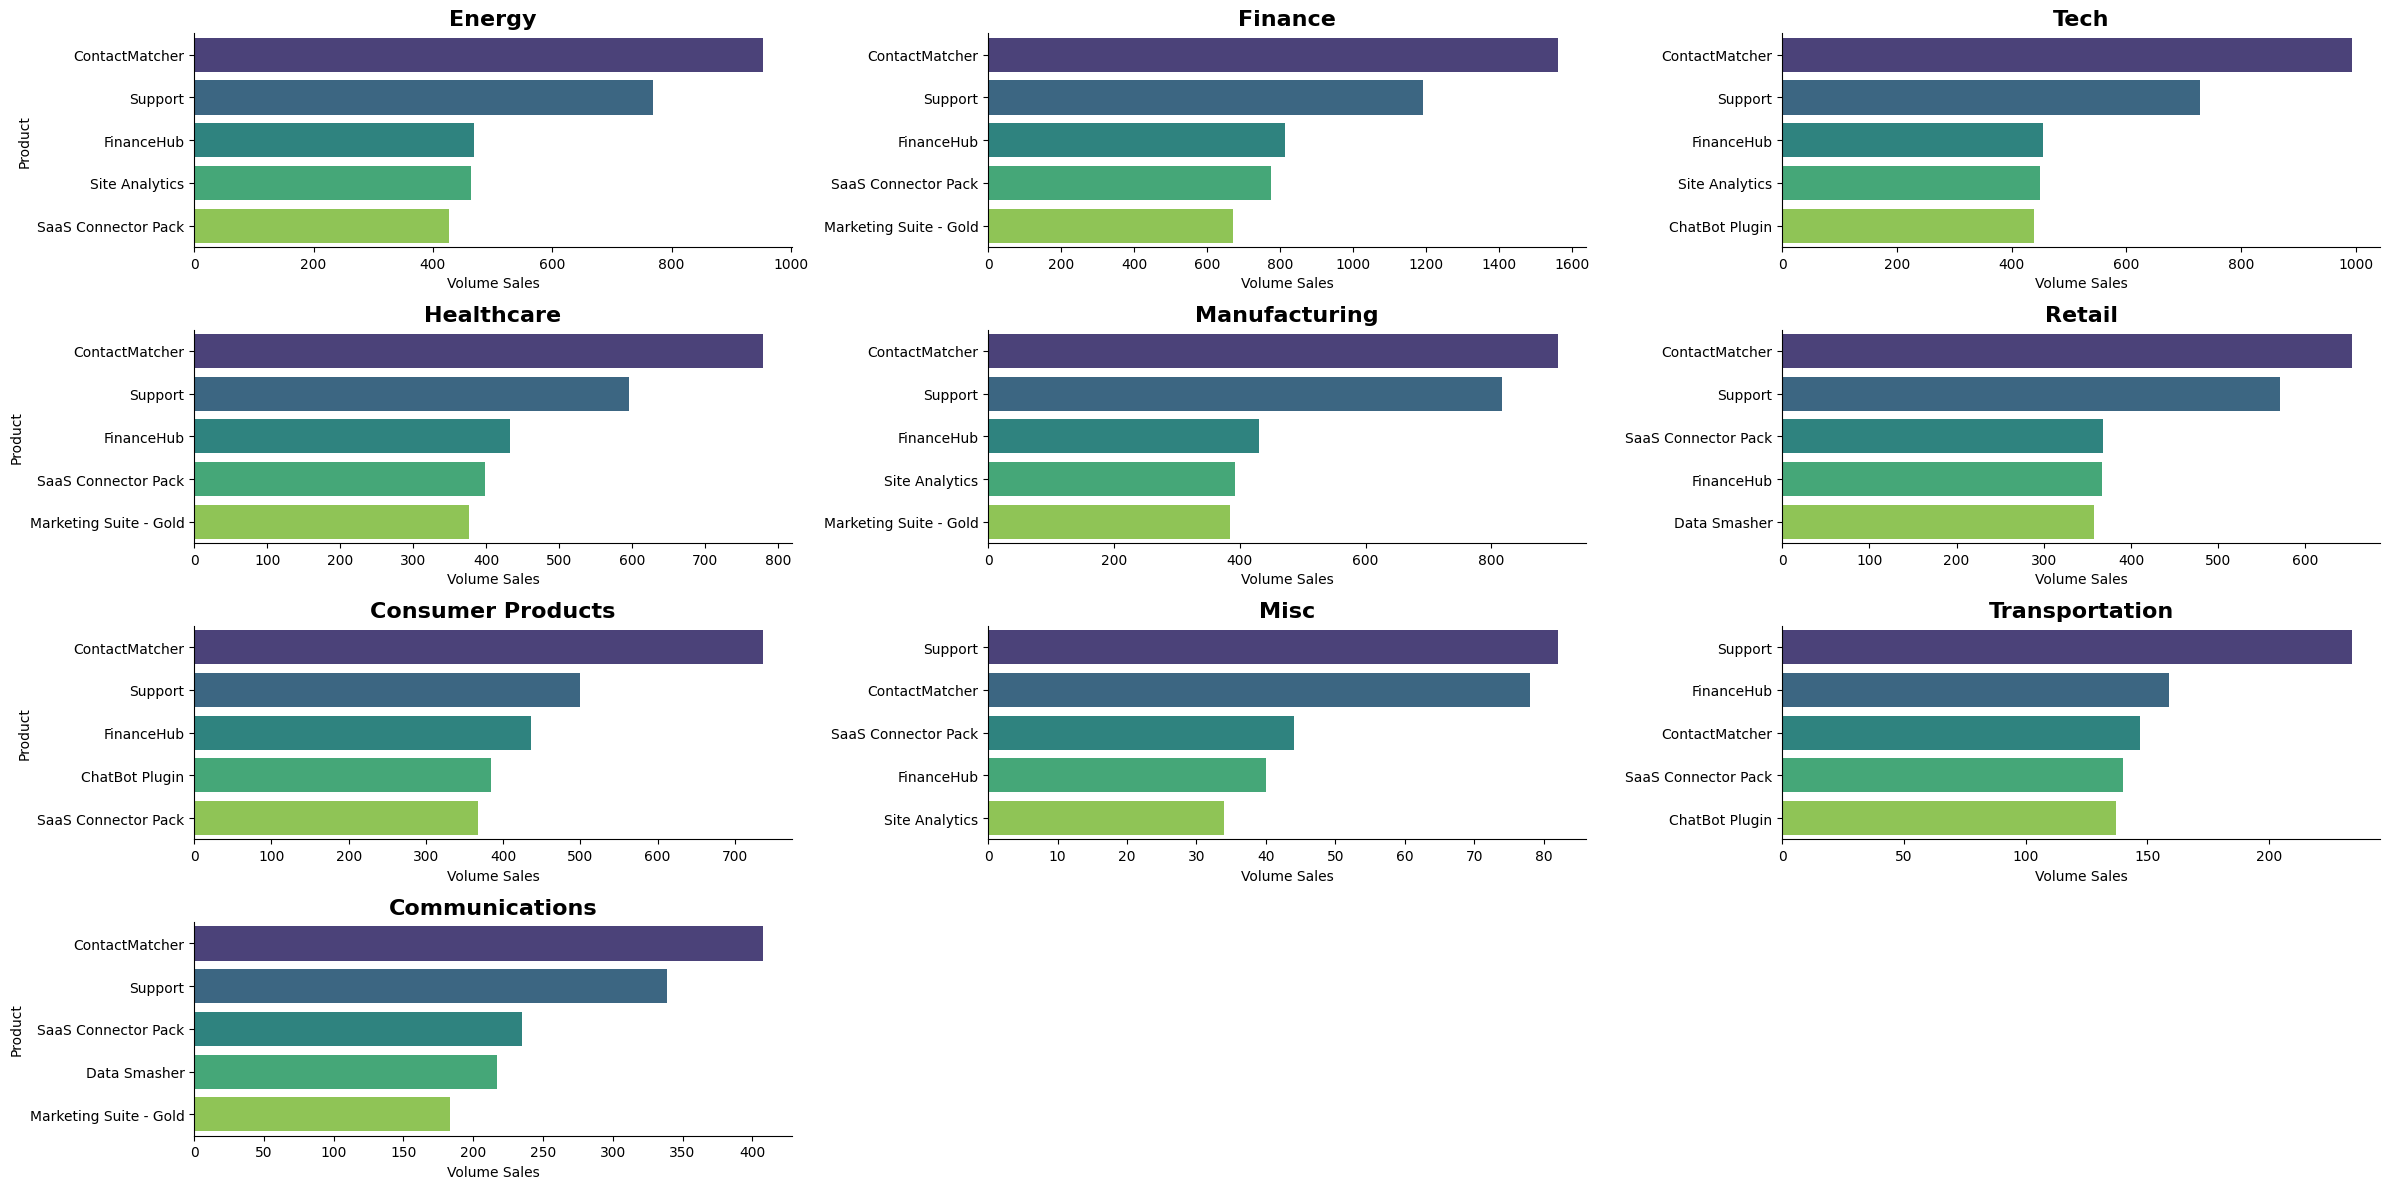

In [703]:
# Tiap industry 5 produk paling laku
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 12))

industry = ['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing', 'Retail', 'Consumer Products', 'Misc', 'Transportation', 'Communications']

axes_flat = axes.flatten()

for i, ind in enumerate(industry):
    if i < len(axes_flat):
        sns.barplot(
            data=IndProd[IndProd['Industry'] == ind].sort_values('Total_Volume', ascending=False).head(),
            x='Total_Volume',
            y='Product',
            ax=axes_flat[i],
            palette='viridis'
        )
        axes_flat[i].set_title(ind, fontsize=16, fontweight='bold')
        axes_flat[i].set_xlabel('Volume Sales')
        if i % ncols == 0:
            axes_flat[i].set_ylabel('Product')
        else:
            axes_flat[i].set_ylabel('')
        despine(axes_flat[i])

for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])


plt.tight_layout()
plt.show()

### 4. Analisis berdasarkan `Segment`

Seperti yang telah tertera pada bab-bab sebelumnya, kolom `Segment` menandakan **fokus industri dari perusahaan pemesan**. Akan dilakukan analisis terhadap variabel `Segment` untuk menjawab:
1. Bagaimana kondisi `Sales` untuk tiap-tiap `Segment`?
1. Bagaimana kondisi `Profit` untuk tiap-tiap `Segment`?
1. `Segment` mana yang memiliki tingkat profitabilitas tertinggi?
1. Apakah terdapat keterkaitan antara top `Product` dengan `Segment`?

Sebelum dilakukan analisis-analisis tersebut, akan terlebih dahulu dicari informasi umum mengenai variabel `Segment`.

In [704]:
# groupby Segment
df_Segment = df_2.groupby('Segment', as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Total_Volume=('Quantity', 'sum'),
    Total_Income=('Profit (PV)', 'sum'),
    Median_Income=('Profit (PV)', 'median'),
    Median_PM=('Profit Margin', 'median'),
    Total_PosProf=('Profit (PV)', lambda x: x[x >= 0].sum()),
    Median_PosProf=('Profit (PV)', lambda x: x[x >= 0].median()),
    Total_NegProf=('Profit (PV)', lambda x: x[x < 0].sum()),
    Median_NegProf=('Profit (PV)', lambda x: x[x < 0].median()),
    Volume_PosProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] >= 0].sum()),
    Volume_NegProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] < 0].sum()),
    n_Customer=('Customer', 'nunique')
)
df_Segment['Profit_Margin'] = round(df_Segment['Total_Income']/df_Segment['Total_Sales'] * 100, 2)

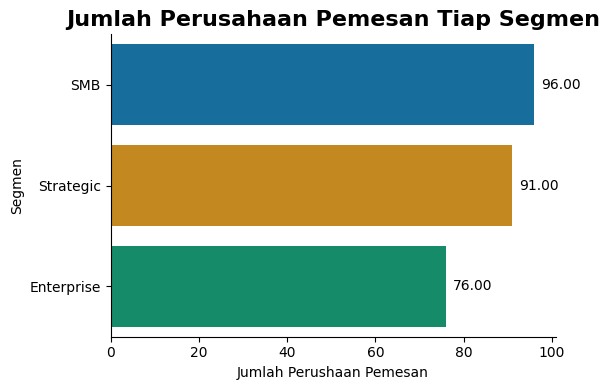

In [705]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(
    data=df_Segment.sort_values('n_Customer', ascending=False),
    x='n_Customer',
    y='Segment',
    ax=ax,
    palette='colorblind'
)

ax.set(
    xlabel='Jumlah Perushaan Pemesan',
    ylabel='Segmen',
    title='Jumlah Perusahaan Pemesan Tiap Segmen'
)

ax.title.set_fontsize(16)  
ax.title.set_fontweight('bold')  

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
despine(ax)
annotate_bar(ax, 'barh')

plt.tight_layout()
plt.show()

Analisis `Sales` tiap-tiap `Segment`

Digunakan total `Sales`, total volume sales `Quantity`, serta median `Sales` untuk tiap-tiap `Segment` dalam melakukan analisis seperti berukit.

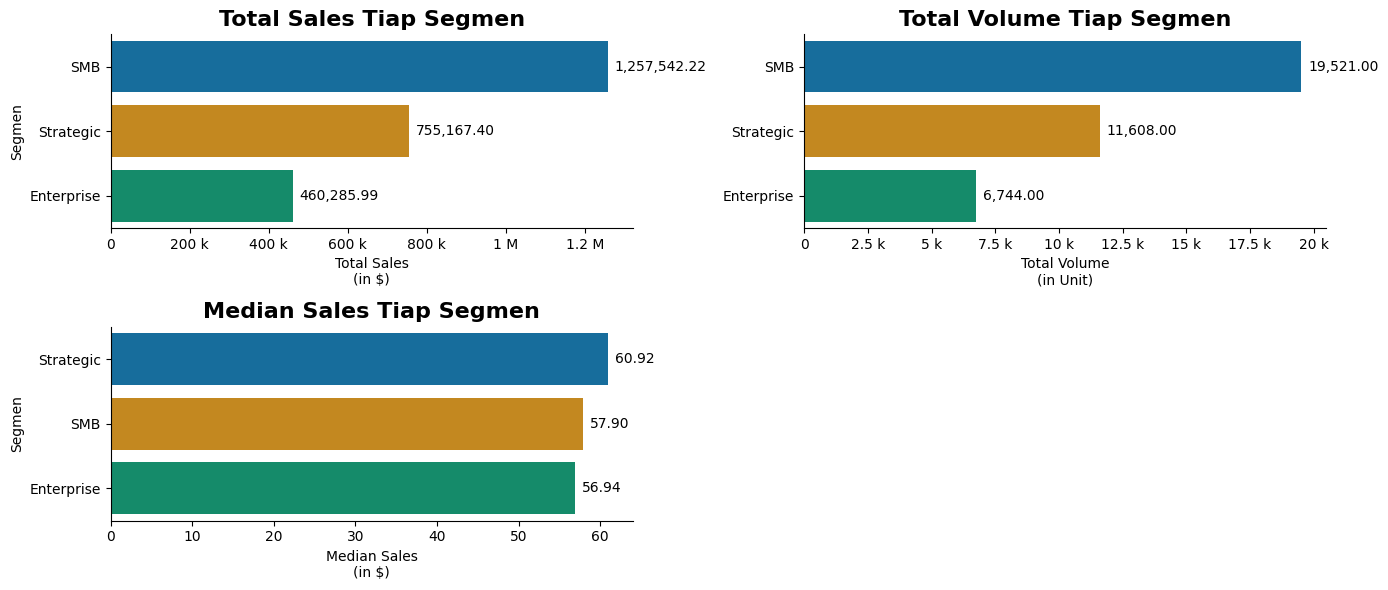

In [706]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(14, 6))

# Total Sales
sns.barplot(
    data=df_Segment.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Segment',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Sales\n(in $)',
    ylabel='Segmen',
    title='Total Sales Tiap Segmen'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Volume Sales
sns.barplot(
    data=df_Segment.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Segment',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Total Volume\n(in Unit)',
    ylabel='',
    title='Total Volume Tiap Segmen'
)

axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold')  

axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Sales
sns.barplot(
    data=df_Segment.sort_values('Median_Sales', ascending=False),
    x='Median_Sales',
    y='Segment',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Sales\n(in $)',
    ylabel='Segmen',
    title='Median Sales Tiap Segmen'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa seluruh segment memiliki **proprsi volume sales yang berbeda**. Oleh karena itu, akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa penjualan *(median sales)* untuk tiap-tiap segment berbeda signifikan** dengan:
- H0: Median Sales untuk setiap segment bernilai sama
- H1: Minimal ada 1 segment yang berbeda median Sales-nya. Tetapi kita tidak tahu yang mana.

In [707]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Segment']=='Strategic']['Sales (PV)'],
        df[df['Segment']=='SMB']['Sales (PV)'],
        df[df['Segment']=='Enterprise']['Sales (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 0.8050
p-value            : 0.6686
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Sales`, `Segment` SMB memiliki **tingkat penjualan tertinggi** diantara segment lainnya yaitu sebesar $1,257,452.
> 1. Secara volume penjualan, `Segment` SMB memiliki **volume penjualan tertinggi** diantara segment lainnya yaitu sebesar 19,521 unit.
> 1. Secara performa penjualan, dilakukan uji hipotesis dengan kesimpulan yang menandakan **tidak terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 segment dimana nilai median Sales-nya berbeda signifikan**. Berdasarkan pembacaan grafik, didapat median `Sales` untuk `Segment` SMB memiliki nilai tertinggi diantara region-region lainnya.

Analisis `Profit` tiap-tiap `Segment`

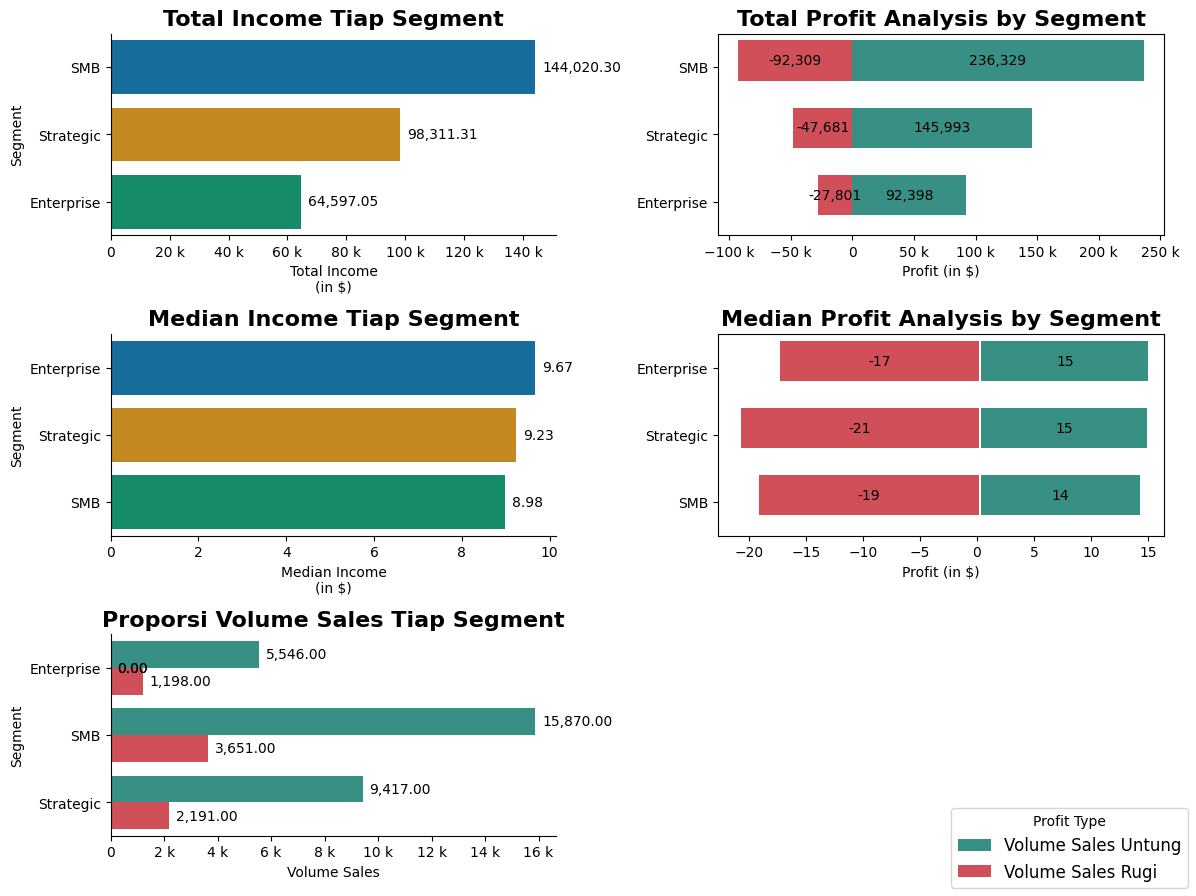

In [708]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(12, 9))

# Total Income
sns.barplot(
    data=df_Segment.sort_values('Total_Income', ascending=False),
    x='Total_Income',
    y='Segment',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Income\n(in $)',
    ylabel='Segment',
    title='Total Income Tiap Segment'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Income
sns.barplot(
    data=df_Segment.sort_values('Median_Income', ascending=False),
    x='Median_Income',
    y='Segment',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Income\n(in $)',
    ylabel='Segment',
    title='Median Income Tiap Segment'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

# Tornado chart total
bar01 = sns.barplot(
    data=df_Segment.sort_values('Total_Income', ascending=False),
    y='Segment',
    x='Total_PosProf',
    color='#2a9d8f',
    ax=axes[0,1]
)

for patch in bar01.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar02 = sns.barplot(
    data=df_Segment.sort_values('Total_Income', ascending=False),
    y='Segment',
    x='Total_NegProf',
    color='#e63946',
    ax=axes[0,1]
)

for patch in bar02.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[0,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Total Profit Analysis\nby Segment'
)
axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0,1].set_title('Total Profit Analysis by Segment', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[0,1], data=pd.concat([df_Segment.sort_values('Total_Income', ascending=False)['Total_PosProf'], df_Segment.sort_values('Total_Income', ascending=False)['Total_NegProf']], ignore_index=True), position='inside', type='barh')

# Tornado chart median
bar11 = sns.barplot(
    data=df_Segment.sort_values('Median_Income', ascending=False),
    y='Segment',
    x='Median_PosProf',
    color='#2a9d8f',
    ax=axes[1,1]
)

for patch in bar11.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar12 = sns.barplot(
    data=df_Segment.sort_values('Median_Income', ascending=False),
    y='Segment',
    x='Median_NegProf',
    color='#e63946',
    ax=axes[1,1]
)

for patch in bar12.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[1,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Median Profit Analysis\nby Segment'
)
axes[1,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1,1].set_title('Median Profit Analysis by Segment', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[1,1], data=pd.concat([df_Segment.sort_values('Median_Income', ascending=False)['Median_PosProf'], df_Segment.sort_values('Median_Income', ascending=False)['Median_NegProf']], ignore_index=True), position='inside', type='barh')

# Volume untung rugi
sns.barplot(
    data=df_Segment.melt(
        id_vars='Segment', 
        value_vars=['Volume_PosProf', 'Volume_NegProf'], 
        var_name='Profit_Type', 
        value_name='Volume'
    ),
    y='Segment',
    x='Volume',
    palette={'Volume_PosProf': '#2a9d8f', 'Volume_NegProf': '#e63946'},
    hue='Profit_Type',
    ax=axes[2,0]
)

axes[2,0].set(
    xlabel='Volume Sales',
    ylabel='Segment',
    title='Proporsi Volume Sales Tiap Segment'
)

axes[2,0].title.set_fontsize(16)  
axes[2,0].title.set_fontweight('bold')  

axes[2,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[2,0])
annotate_bar(axes[2,0], 'barh')

axes[2, 0].legend_.remove()

handles, labels = axes[2, 0].get_legend_handles_labels()
custom_labels = ['Volume Sales Untung', 'Volume Sales Rugi']
fig.legend(
    handles=handles, 
    labels=custom_labels, 
    loc='lower right', 
    fontsize=12,
    title='Profit Type'
)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa keuntungan *(median profit)* untuk tiap-tiap segmentnya berbeda signifikan** dengan:
- H0: Median Profit untuk setiap segment bernilai sama
- H1: Minimal ada 1 segment yang berbeda median Profit-nya. Tetapi kita tidak tahu yang mana.

In [709]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Segment']=='SMB']['Profit (PV)'],
        df[df['Segment']=='Enterprise']['Profit (PV)'],
        df[df['Segment']=='Strategic']['Profit (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 4.3061
p-value            : 0.1161
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **performa keuntungan *(median profit untuk transaksi dengan profit positif)* untuk tiap-tiap segmentnya berbeda signifikan** dengan:
- H0: Median Profit Positif untuk setiap segment bernilai sama
- H1: Minimal ada 1 segment yang berbeda median Profit positif-nya. Tetapi kita tidak tahu yang mana.

In [710]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[(df['Segment']=='SMB') & (df['Profit (PV)'] >= 0)]['Profit (PV)'],
        df[(df['Segment']=='Enterprise') & (df['Profit (PV)'] >= 0)]['Profit (PV)'],
        df[(df['Segment']=='Strategic') & (df['Profit (PV)'] >= 0)]['Profit (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 1.6225
p-value            : 0.4443
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **median kerugian *(median profit untuk transaksi dengan profit negatif)* untuk tiap-tiap segmentnya berbeda signifikan** dengan:
- H0: Median Profit Negatif untuk setiap segment bernilai sama
- H1: Minimal ada 1 segment yang berbeda median Profit negatif-nya. Tetapi kita tidak tahu yang mana.

In [711]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[(df['Segment']=='SMB') & (df['Profit (PV)'] < 0)]['Profit (PV)'],
        df[(df['Segment']=='Enterprise') & (df['Profit (PV)'] < 0)]['Profit (PV)'],
        df[(df['Segment']=='Strategic') & (df['Profit (PV)'] < 0)]['Profit (PV)']
)

print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 0.3258
p-value            : 0.8497
alpha              : 0.05
Kesimpulan uji stat: Fail to Reject H0 


Berdasarkan grafik serta uji statistik diatas, didapat ***insight***:
> 1. Secara total `Profit`, `Segment` SMB memiliki **tingkat keuntungan tertinggi** diantara region-region lainnya yaitu sebesar $144,020.
> 1. Secara total keuntungan atau `Profit` dengan nilai positif, `Segment` SMB memiliki **tingkat profit positif tertinggi** diantara segment lainnya yaitu sebesar $236,329
> 1. Secara total kerugian atau `Profit` dengan nilai negatif, `Segment` SMB memiliki **tingkat profit negatif tertinggi** diantara segment lainnya yaitu sebesar $92,309
> 1. Berdasarkan grafik, median `Profit`, `Segment` Enterprise memiliki **median keuntungan tertinggi** diantara segment lainnya yaitu sebesar $9.67
> 1. Berdasarkan uji hipotesis, didapat kesimpulan **tidak terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 segment dimana nilai median Profit-nya berbeda signifikan tetapi tidak tahu yang mana**. 
> 1. Berdasarkan uji hipotesis, didapat kesimpulan **tidak terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 segment dimana nilai median Profit positif-nya berbeda signifikan tetapi tidak tahu yang mana**. 
> 1. Berdasarkan uji hipotesis, didapat kesimpulan **tidak terdapat cukup bukti untuk mengatakan bahwa minimal terdapat 1 segment dimana nilai median Profit negatif-nya berbeda signifikan tetapi tidak tahu yang mana**. 

Analisis `Profit Margin` tiap-tiap `Segment`

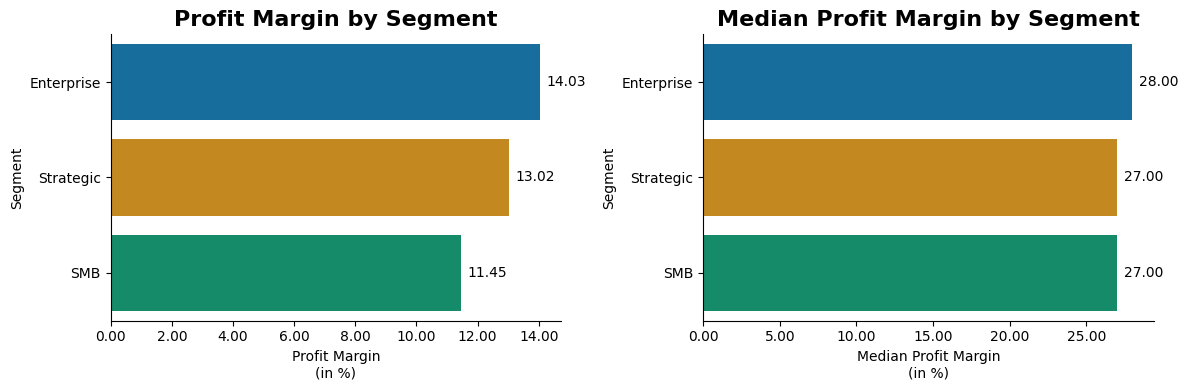

In [712]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

# Profit Margin
sns.barplot(
    data=df_Segment.sort_values('Profit_Margin', ascending=False),
    y='Segment',
    x='Profit_Margin',
    ax=axes[0],
    palette='colorblind'
)
axes[0].set(
    ylabel='Segment',
    xlabel='Profit Margin\n(in %)',
    title='Profit Margin by Segment'
)
axes[0].title.set_fontsize(16)
axes[0].title.set_fontweight('bold')
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[0])
annotate_bar(axes[0], type='barh')

# Median Profit Margin
sns.barplot(
    data=df_Segment.sort_values('Median_PM', ascending=False),
    y='Segment',
    x='Median_PM',
    ax=axes[1],
    palette='colorblind'
)
axes[1].set(
    ylabel='Segment',
    xlabel='Median Profit Margin\n(in %)',
    title='Median Profit Margin by Segment'
)
axes[1].title.set_fontsize(16)
axes[1].title.set_fontweight('bold')
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[1])
annotate_bar(axes[1], type='barh')

plt.tight_layout()
plt.show()

Akan dilakukan pengujian statistik `Kruskal-Wallis` untuk menguji apakah **median profit margin untuk tiap-tiap segment berbeda signifikan** dengan:
- H0: Median Profit Negatif untuk setiap segment bernilai sama
- H1: Minimal ada 1 segment yang berbeda median Profit negatif-nya. Tetapi kita tidak tahu yang mana.

In [713]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df_2[df_2['Segment']=='SMB']['Profit Margin'],
        df_2[df_2['Segment']=='Strategic']['Profit Margin'],
        df_2[df_2['Segment']=='Enterprise']['Profit Margin']
)
print(f"Kruskal-Wallis stat: {stat:.4f}")
print(f"p-value            : {pvalue:.4f}")
print(f"alpha              : 0.05")
print(f"Kesimpulan uji stat: {np.where(pvalue > 0.05, 'Fail to Reject H0', 'Reject H0')} ")

Kruskal-Wallis stat: 9.6527
p-value            : 0.0080
alpha              : 0.05
Kesimpulan uji stat: Reject H0 


Berdasarkan grafik dan uji hipotesis diatas, didapat ***insight***:
> 1. `Segment` Enterprise memiliki `Profit Margin` total tertinggi diantara region-region lainnya yaitu sebesar 14.03%. Hal ini menandakan **dari total penjualan, segment Enterprise berhasil mengkonversi 14.03% dari total penjualan tersebut menjadi keuntungan**
> 1. Secara uji statistik, **terdapat cukup bukti untuk mengatakan bahwa terdapat minimal 1 median Profit Margin tiap-tiap industri berbeda signifikan**. Secara pembacaan grafik, didapat median `Profit Margin` tertinggi berada pada segment Enterprise

Analisis `Product` tiap-tiap `Segment`

Akan dilakukan pengujian `Chi-Square` untuk menguji apakah `Segment` memiliki keterkaitan dengan pilihan `Product` yang akan dibeli sehingga:
- H0: `Segment` dan `Product` tidak terkait/independent (memiliki proporsi yang sama)
- H1: `Segment` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan)

Untuk mencari keterkaitan, digunakan **total volume penjualan atau `Quantity`** tiap-tiap `Product` untuk tiap-tiap Segment lalu dibentuk crosstab untuk `Product` dengan volume pejualan tertinggi pada urutan pertama hingga kelima untuk masing-masing `Segment`.

In [714]:
SegProd = df.groupby(['Segment', 'Product'],as_index=False).agg(
    Total_Volume=('Quantity','sum')
)

In [715]:
from scipy.stats import chi2_contingency

n_values = [1, 2, 3, 4, 5]

alpha = 0.05

results = []

for n in n_values:
    SegProd = (SegProd.sort_values(['Segment', 'Total_Volume'], ascending=[True, False])
                          .groupby('Segment')
                          .head(n))
    
    ctSegProd = pd.crosstab(SegProd['Segment'],
                               SegProd['Product'],
                               values=SegProd['Product'],
                               aggfunc='count',
                               margins=False
                              ).fillna(0)
    
    chi2, pvalue, dof, exp = chi2_contingency(ctSegProd)
    
    hasil_uji = 'Reject H0' if pvalue < alpha else 'Fail to reject H0'
    
    results.append({'Top-n': n, 'Stat Value': chi2, 'P-Value': pvalue, 'Hasil Uji': hasil_uji})

results_df = pd.DataFrame(results)

results_df

Top-n  Stat Value  P-Value          Hasil Uji
0      1         0.0      1.0  Fail to reject H0
1      2         0.0      1.0  Fail to reject H0
2      3         0.0      1.0  Fail to reject H0
3      4         0.0      1.0  Fail to reject H0
4      5         0.0      1.0  Fail to reject H0

Berdasarkan uji hipotesis diatas, didapat ***insight***:
> 1. Tidak terdapat cukup bukti untuk mengatakan bahwa `Segment` dan `Product` terkait/dependent (memiliki proporsi berbeda signifikan) untuk top product pertama hingga kelima

Untuk tiap-tiap `Segment`, dapat dilihat 5 top `Product` dengan volume penjualan tertinggi seperti berikut

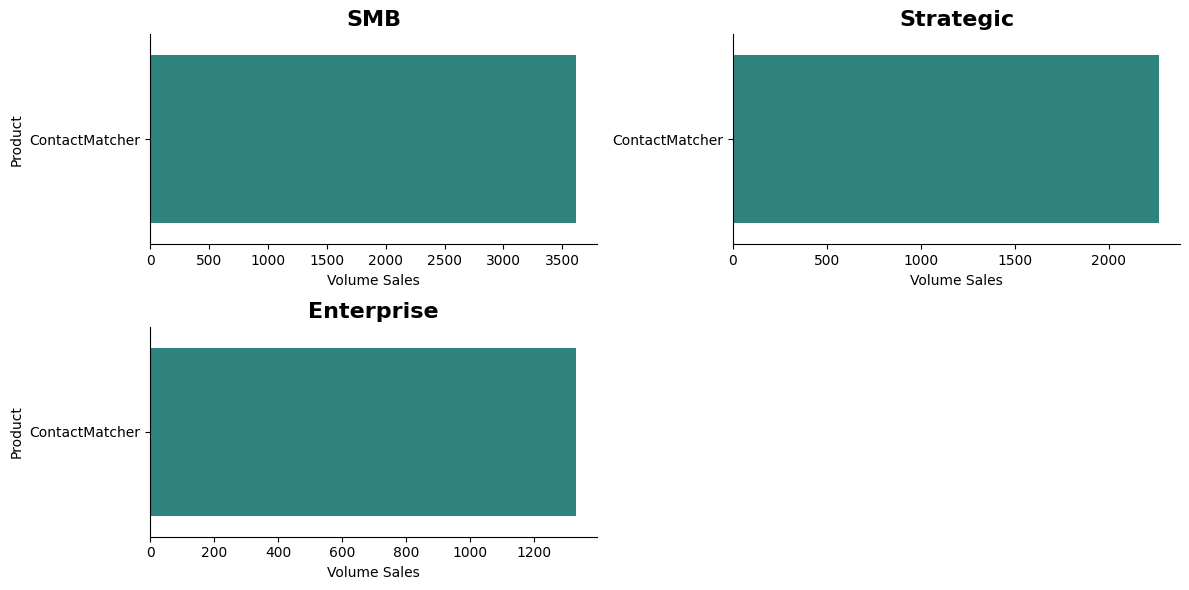

In [716]:
# Tiap Segment 5 produk paling laku
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

Segment = ['SMB', 'Strategic', 'Enterprise']

axes_flat = axes.flatten()

for i, ind in enumerate(Segment):
    if i < len(axes_flat):
        sns.barplot(
            data=SegProd[SegProd['Segment'] == ind].sort_values('Total_Volume', ascending=False).head(),
            x='Total_Volume',
            y='Product',
            ax=axes_flat[i],
            palette='viridis'
        )
        axes_flat[i].set_title(ind, fontsize=16, fontweight='bold')
        axes_flat[i].set_xlabel('Volume Sales')
        if i % ncols == 0:
            axes_flat[i].set_ylabel('Product')
        else:
            axes_flat[i].set_ylabel('')
        despine(axes_flat[i])

for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])


plt.tight_layout()
plt.show()

### 5. Analisis berdasarkan `Product`

Akan dilakukan analisis terhadap variabel `Product` untuk menjawab:
1. Bagaimana kondisi `Sales` untuk tiap-tiap `Product`?
1. Bagaimana kondisi `Profit` untuk tiap-tiap `Product`?
1. `Product` mana yang memiliki tingkat profitabilitas tertinggi?

In [717]:
# groupby Product
df_Product = df_2.groupby('Product', as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Median_Sales=('Sales (PV)', 'median'),
    Total_Volume=('Quantity', 'sum'),
    Total_Income=('Profit (PV)', 'sum'),
    Median_Income=('Profit (PV)', 'median'),
    Median_PM=('Profit Margin', 'median'),
    Total_PosProf=('Profit (PV)', lambda x: x[x >= 0].sum()),
    Median_PosProf=('Profit (PV)', lambda x: x[x >= 0].median()),
    Total_NegProf=('Profit (PV)', lambda x: x[x < 0].sum()),
    Median_NegProf=('Profit (PV)', lambda x: x[x < 0].median()),
    Volume_PosProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] >= 0].sum()),
    Volume_NegProf=('Quantity', lambda x: x[df_2.loc[x.index, 'Profit (PV)'] < 0].sum())
).fillna(0)
df_Product['Profit_Margin'] = round(df_Product['Total_Income']/df_Product['Total_Sales'] * 100, 2)

Analisis `Sales` tiap-tiap `Product`

Digunakan total `Sales`, total volume sales `Quantity`, serta median `Sales` untuk tiap-tiap `Industry` dalam melakukan analisis seperti berukit.

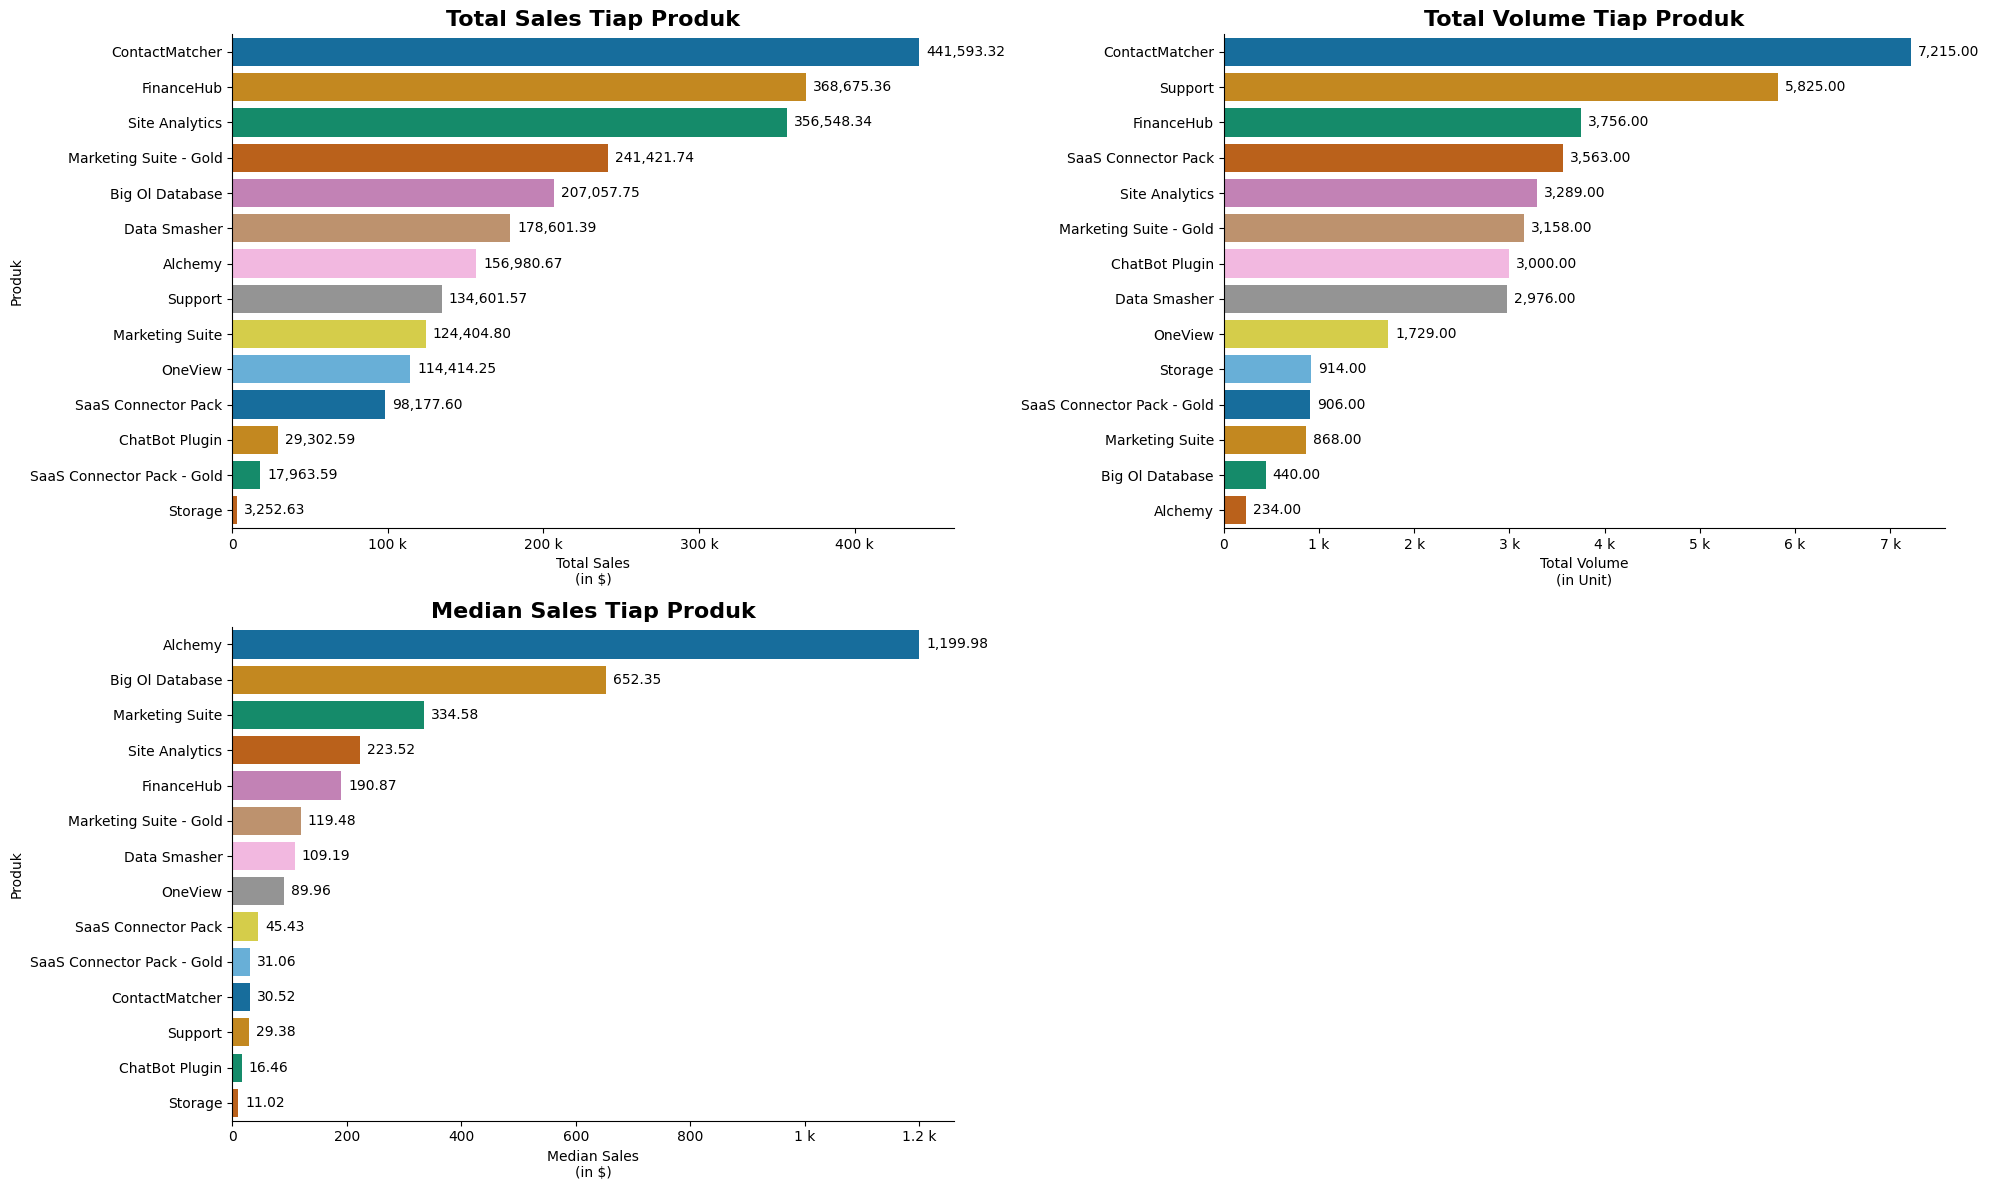

In [718]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20, 12))

# Total Sales
sns.barplot(
    data=df_Product.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Product',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Sales\n(in $)',
    ylabel='Produk',
    title='Total Sales Tiap Produk'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Volume Sales
sns.barplot(
    data=df_Product.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Product',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Total Volume\n(in Unit)',
    ylabel='',
    title='Total Volume Tiap Produk'
)

axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold')  

axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Sales
sns.barplot(
    data=df_Product.sort_values('Median_Sales', ascending=False),
    x='Median_Sales',
    y='Product',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Sales\n(in $)',
    ylabel='Produk',
    title='Median Sales Tiap Produk'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. Secara total `Sales`, `Product` ContactMatcher memiliki **tingkat penjualan tertinggi** diantara produk lainnya yaitu sebesar $441,593
> 1. Secara volume penjualan, `Product` ContactMatcher memiliki **volume penjualan tertinggi** diantara produk lainnya yaitu sebesar 7,215 unit
> 1. Secara performa penjualan, didapat pembacaan grafik: median `Sales` untuk `Product` Alchemy memiliki nilai tertinggi diantara produk lainnya.

Analisis `Profit` tiap-tiap `Product`

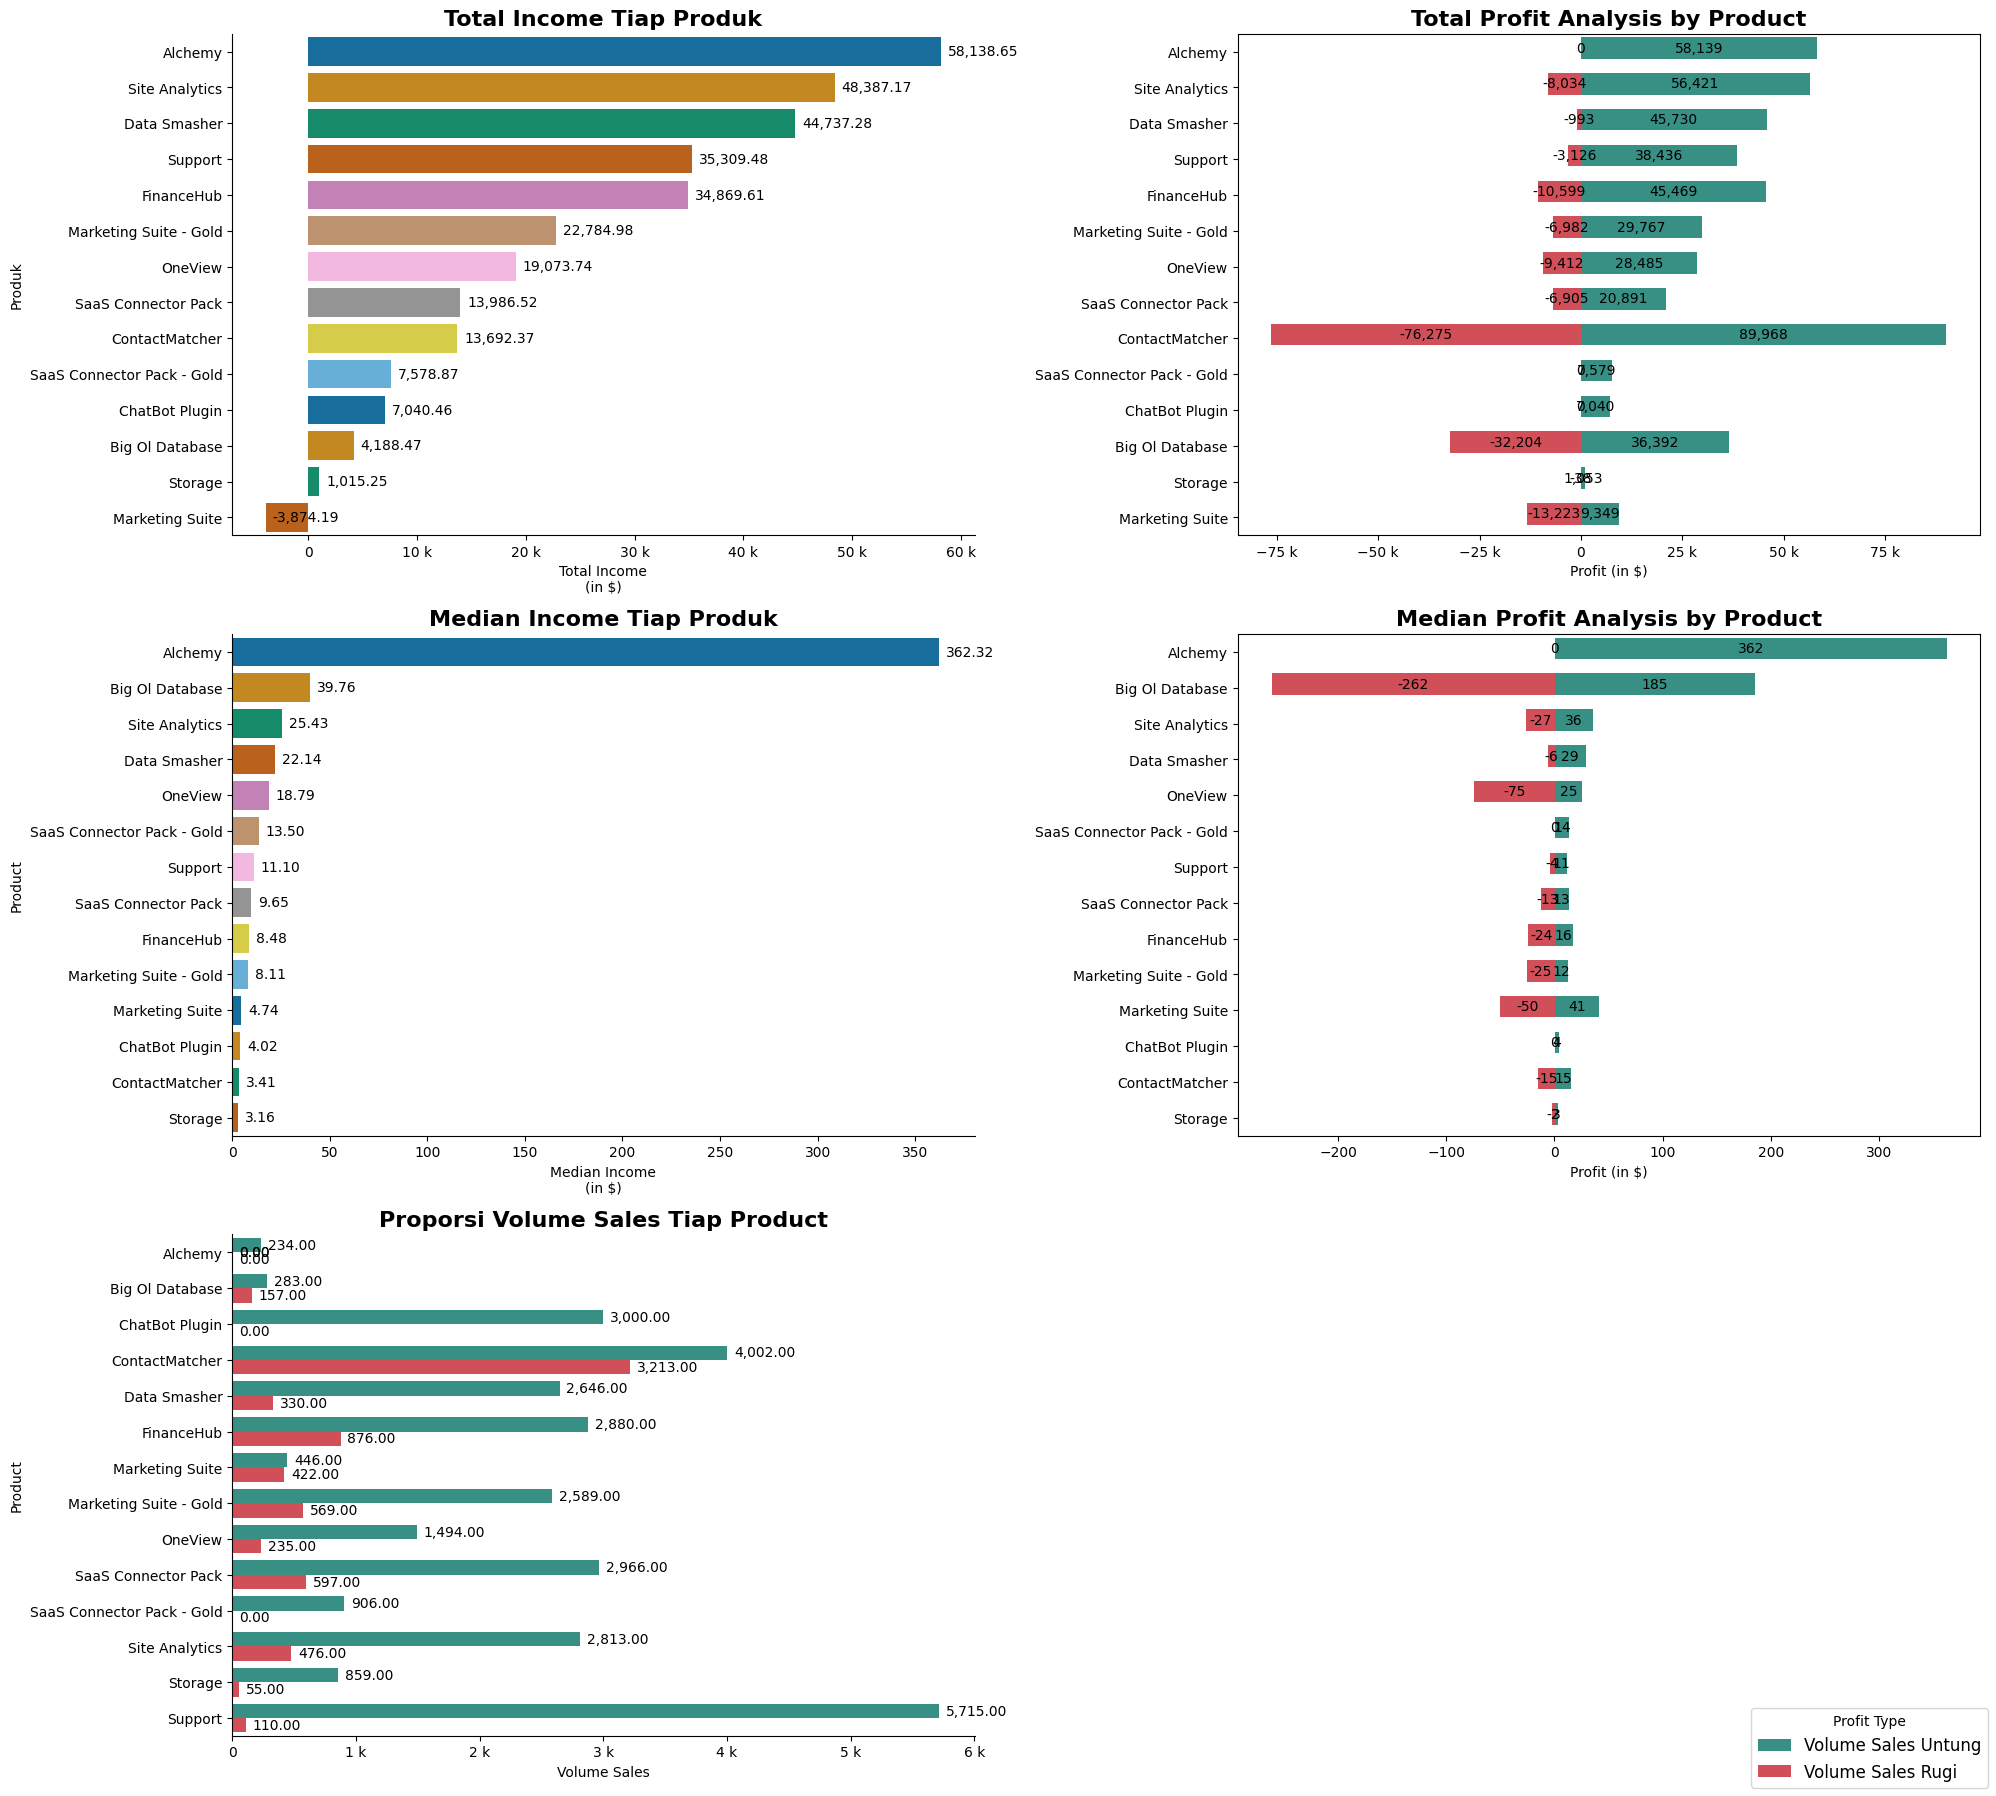

In [719]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20, 18))

# Total Income
sns.barplot(
    data=df_Product.sort_values('Total_Income', ascending=False),
    x='Total_Income',
    y='Product',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Total Income\n(in $)',
    ylabel='Produk',
    title='Total Income Tiap Produk'
)

axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold')  

axes[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Income
sns.barplot(
    data=df_Product.sort_values('Median_Income', ascending=False),
    x='Median_Income',
    y='Product',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Income\n(in $)',
    ylabel='Product',
    title='Median Income Tiap Produk'
)

axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold')  

axes[1,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

# Tornado chart total
bar01 = sns.barplot(
    data=df_Product.sort_values('Total_Income', ascending=False),
    y='Product',
    x='Total_PosProf',
    color='#2a9d8f',
    ax=axes[0,1]
)

for patch in bar01.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar02 = sns.barplot(
    data=df_Product.sort_values('Total_Income', ascending=False),
    y='Product',
    x='Total_NegProf',
    color='#e63946',
    ax=axes[0,1]
)

for patch in bar02.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[0,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Total Profit Analysis\nby Product'
)
axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0,1].set_title('Total Profit Analysis by Product', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[0,1], data=pd.concat([df_Product.sort_values('Total_Income', ascending=False)['Total_PosProf'], df_Product.sort_values('Total_Income', ascending=False)['Total_NegProf']], ignore_index=True), position='inside', type='barh')

# Tornado chart median
bar11 = sns.barplot(
    data=df_Product.sort_values('Median_Income', ascending=False),
    y='Product',
    x='Median_PosProf',
    color='#2a9d8f',
    ax=axes[1,1]
)

for patch in bar11.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

bar12 = sns.barplot(
    data=df_Product.sort_values('Median_Income', ascending=False),
    y='Product',
    x='Median_NegProf',
    color='#e63946',
    ax=axes[1,1]
)

for patch in bar12.patches:
    patch.set_height(barsize)
    patch.set_x(patch.get_x() + (1 - barsize) / 2)

axes[1,1].set(
    xlabel='Profit (in $)',
    ylabel='',
    title='Median Profit Analysis\nby Product'
)
axes[1,1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1,1].set_title('Median Profit Analysis by Product', fontsize=16, fontweight='bold')

annotate_bar(ax=axes[1,1], data=pd.concat([df_Product.sort_values('Median_Income', ascending=False)['Median_PosProf'], df_Product.sort_values('Median_Income', ascending=False)['Median_NegProf']], ignore_index=True), position='inside', type='barh')

# Volume untung rugi
sns.barplot(
    data=df_Product.melt(
        id_vars='Product', 
        value_vars=['Volume_PosProf', 'Volume_NegProf'], 
        var_name='Profit_Type', 
        value_name='Volume'
    ),
    y='Product',
    x='Volume',
    palette={'Volume_PosProf': '#2a9d8f', 'Volume_NegProf': '#e63946'},
    hue='Profit_Type',
    ax=axes[2,0]
)

axes[2,0].set(
    xlabel='Volume Sales',
    ylabel='Product',
    title='Proporsi Volume Sales Tiap Product'
)

axes[2,0].title.set_fontsize(16)  
axes[2,0].title.set_fontweight('bold')  

axes[2,0].xaxis.set_major_formatter(ticker.EngFormatter())
despine(axes[2,0])
annotate_bar(axes[2,0], 'barh')

axes[2, 0].legend_.remove()

handles, labels = axes[2, 0].get_legend_handles_labels()
custom_labels = ['Volume Sales Untung', 'Volume Sales Rugi']
fig.legend(
    handles=handles, 
    labels=custom_labels, 
    loc='lower right', 
    fontsize=12,
    title='Profit Type'
)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. Secara total `Profit`, `Product` Alchemy memiliki **tingkat keuntungan tertinggi** diantara produk lainnya yaitu sebesar $58,138
> 1. Secara total keuntungan atau `Profit` dengan nilai positif, `Product` ContactMatcher memiliki **tingkat profit positif tertinggi** diantara produk lainnya yaitu sebesar $89,968
> 1. Secara total kerugian atau `Profit` dengan nilai negatif, `Product` ContactMatcher memiliki **tingkat profit negatif tertinggi** diantara produk lainnya yaitu sebesar $76,275
> 1. Berdasarkan grafik, median `Profit`, `Product` Alchemy memiliki **median keuntungan tertinggi** diantara produk lainnya yaitu sebesar $362,32
> 1. Berdasarkan proporsi volume, didapat volume `Sales` dengan proporsi profit positif terbanyak berada di produk Support
> 1. Berdasarkan proporsi volume, didapat volume `Sales` dengan proporsi profit negtif terbanyak berada di produk ContactMatcher

Analisis `Profit Margin` tiap-tiap `Product`

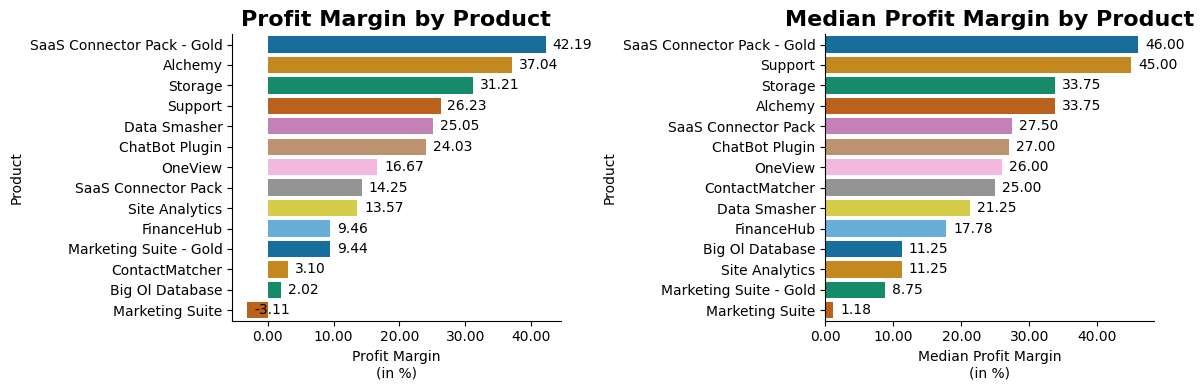

In [720]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

# Profit Margin
sns.barplot(
    data=df_Product.sort_values('Profit_Margin', ascending=False),
    y='Product',
    x='Profit_Margin',
    ax=axes[0],
    palette='colorblind'
)
axes[0].set(
    ylabel='Product',
    xlabel='Profit Margin\n(in %)',
    title='Profit Margin by Product'
)
axes[0].title.set_fontsize(16)
axes[0].title.set_fontweight('bold')
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[0])
annotate_bar(axes[0], type='barh')

# Median Profit Margin
sns.barplot(
    data=df_Product.sort_values('Median_PM', ascending=False),
    y='Product',
    x='Median_PM',
    ax=axes[1],
    palette='colorblind'
)
axes[1].set(
    ylabel='Product',
    xlabel='Median Profit Margin\n(in %)',
    title='Median Profit Margin by Product'
)
axes[1].title.set_fontsize(16)
axes[1].title.set_fontweight('bold')
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
despine(axes[1])
annotate_bar(axes[1], type='barh')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. `Product` SaaS Connector Pack - Gold memiliki `Profit Margin` total tertinggi diantara produk lainnya yaitu sebesar 42.19%. Hal ini menandakan **dari total penjualan, produk SaaS Connector Pack - Gold berhasil mengkonversi 42.19% dari total penjualan tersebut menjadi keuntungan**
> 1. `Product` Marketing Suite memiliki `Profit Margin` total bernilai negatif. Hal ini menandakan **dari total penjualan, produk Marketing Suite mengkonversi 3.11% dari total penjualan tersebut menjadi kerugian**
> 1. `Product` SaaS Connector Pack - Gold memiliki `Profit Margin` tipikal per transaksi (*median*) tertinggi diantara subregion lainnya yaitu sebesar 46%. Hal ini menandakan **dari median penjualan, produk SaaS Connector Pack - Gold berhasil mengkonversi 46% dari total penjualan tersebut menjadi keuntungan**

### 6. Analisis berdasarkan `Order ID`

Akan dilakukan analisis berdasarkan `Order ID` yang menandakan satu transaksi untuk menjawab:
1. Dalam satu kali transaksi, tiap-tiap customer secara tipikal menghabiskan berapa dollar?
1. Dalam satu kali transaksi, tiap-tiap customer secara tipikal membeli berapa banyak produk?
1. Dalam satu kali transaksi, tiap-tiap customer secara tipikal membeli berapa banyak produk yang berbeda?

Analisis dilakukan untuk data secara umum, berdasarkan `Region`, `Subregion`, `Industry`, dan `Segment`

#### Analisis Transaksi Secara General

In [721]:
# groupby Order_ID
df_Order_ID = df_2.groupby('Order ID', as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Volume=('Quantity', 'sum'),
    Unique_Product=('Product', 'nunique')
)
print(f"Median Total Sales   : ${df_Order_ID['Total_Sales'].median():,.2f}")
print(f"Median Quantity      : {df_Order_ID['Total_Volume'].median()}")
print(f"Median Unique Product: {df_Order_ID['Unique_Product'].median()}")

Median Total Sales   : $163.80
Median Quantity      : 6.0
Median Unique Product: 1.0


Berdasarkan analisis diatas, didapat ***insight*** secara umum, dalam satu transaksi, pelanggan tipikal **menghabiskan $163.80 dengan banyaknya produk sebanyak 6 untuk 1 jenis produk**.

#### Analisis transaksi tiap-tiap `Region`

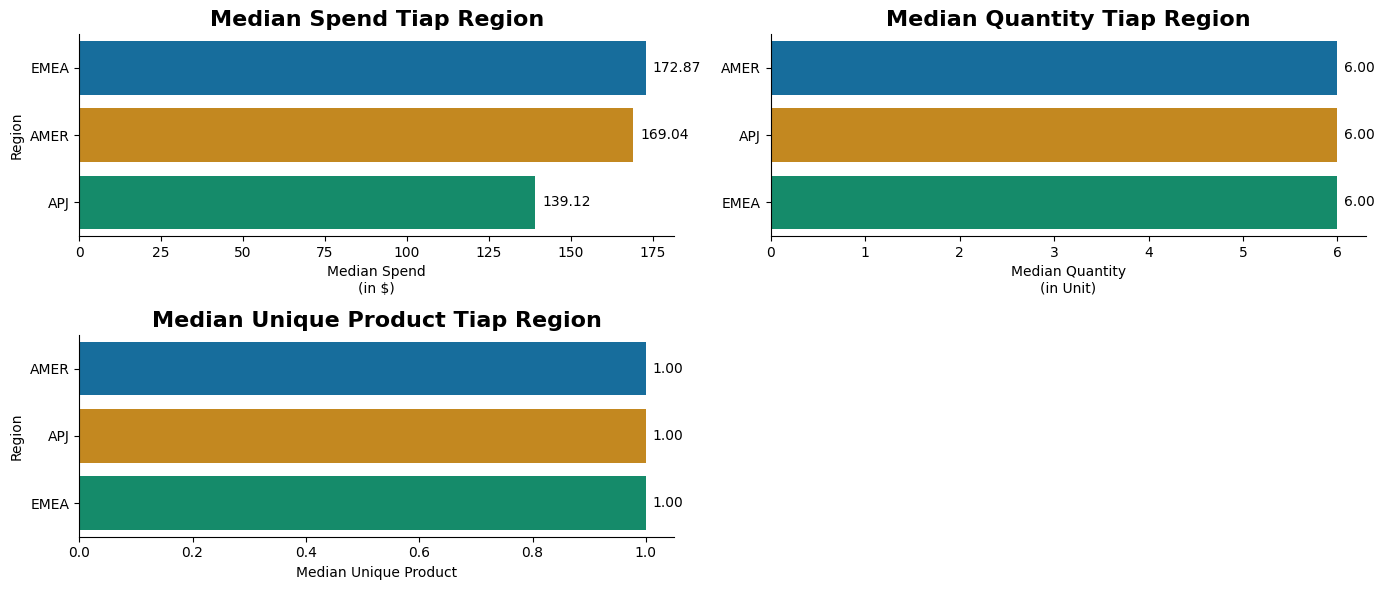

In [722]:
df_Order_ID_Region = df_2.groupby(['Region','Order ID'], as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Volume=('Quantity', 'sum'),
    Unique_Product=('Product', 'nunique')
)
df_Order_ID_Region = df_Order_ID_Region.groupby('Region', as_index=False)[['Total_Sales', 'Total_Volume', 'Unique_Product']].median()
fig, axes = plt.subplots(2,2,figsize=(14,6))

# Median Total Spend per Transaction
sns.barplot(
    data=df_Order_ID_Region.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Region',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Median Spend\n(in $)',
    ylabel='Region',
    title='Median Spend Tiap Region'
)
axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold') 
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Quantity per Transaction
sns.barplot(
    data=df_Order_ID_Region.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Region',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Median Quantity\n(in Unit)',
    ylabel='',
    title='Median Quantity Tiap Region'
)
axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold') 
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Unique Products per Transaction
sns.barplot(
    data=df_Order_ID_Region.sort_values('Unique_Product', ascending=False),
    x='Unique_Product',
    y='Region',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Unique Product',
    ylabel='Region',
    title='Median Unique Product Tiap Region'
)
axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold') 
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan analisis diatas, didapat ***insight*** secara region, dalam satu transaksi, region EMEA memiliki nilai tipikal *spend* yang paling tinggi dan APJ memiliki nilai terendah. Untuk *quantity* dan *unique* didapat hasil yang sama, secara berurutan sebanyak 6 dan 1 produk yang berbeda. 

#### Analisis transaksi tiap-tiap `Subregion`

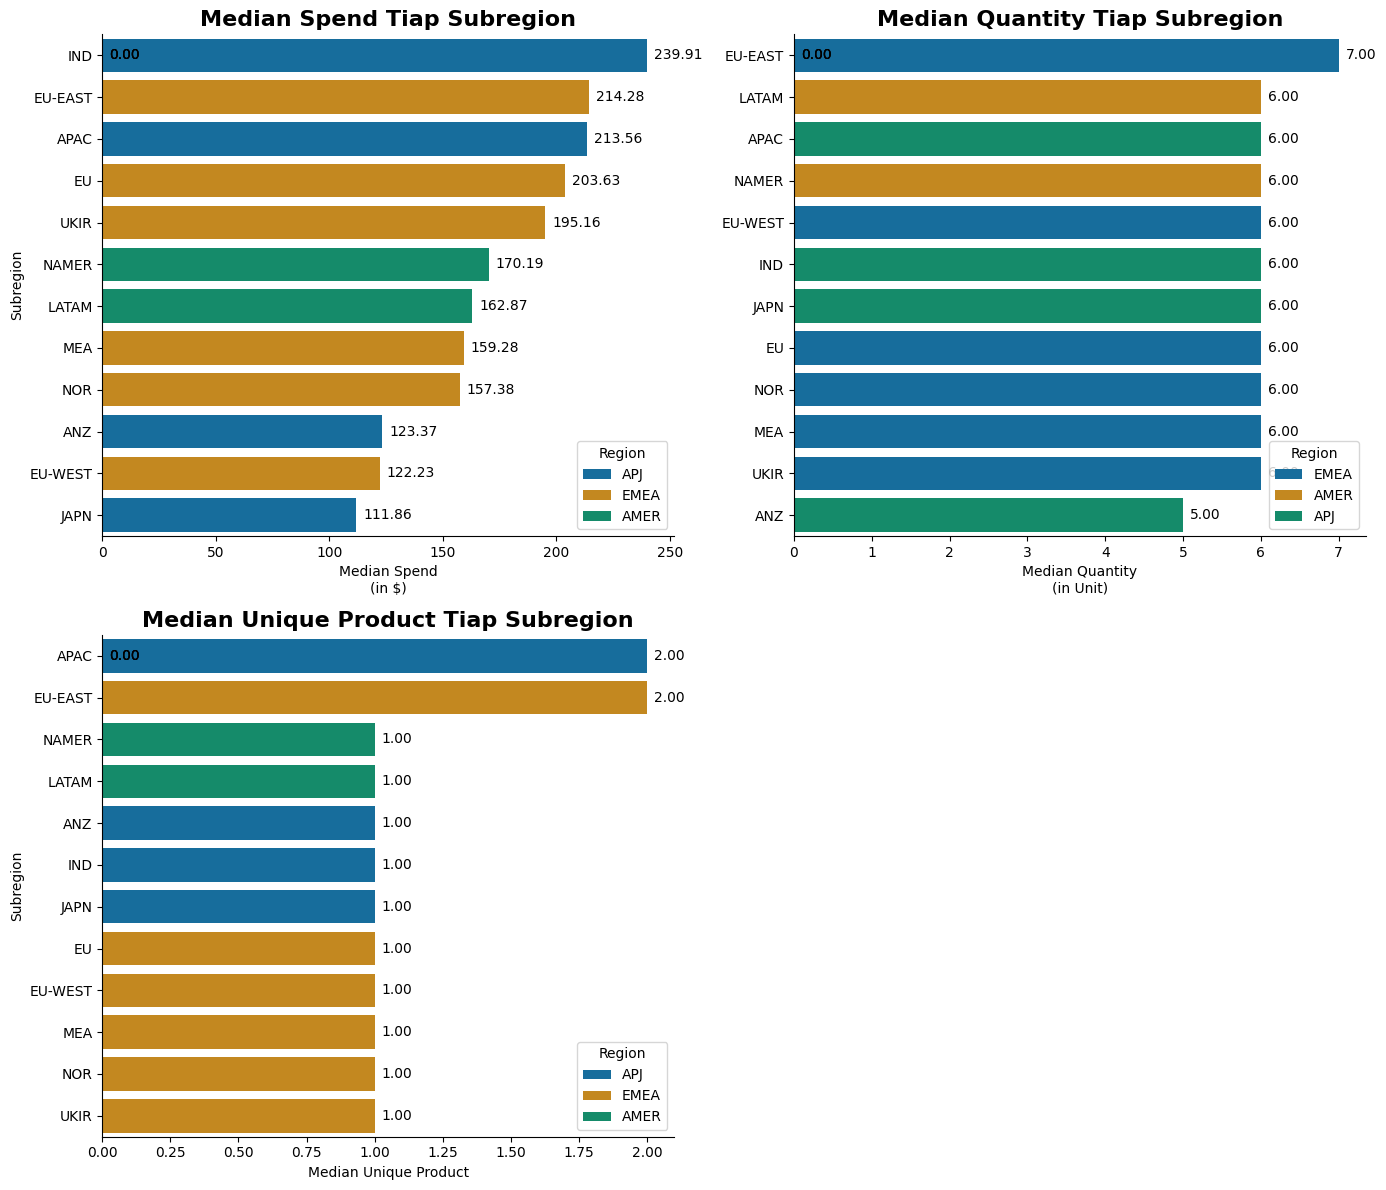

In [723]:
df_Order_ID_Subregion = df_2.groupby(['Region','Subregion','Order ID'], as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Volume=('Quantity', 'sum'),
    Unique_Product=('Product', 'nunique')
)
df_Order_ID_Subregion = df_Order_ID_Subregion.groupby(['Region','Subregion'], as_index=False)[['Total_Sales', 'Total_Volume', 'Unique_Product']].median()
fig, axes = plt.subplots(2,2,figsize=(14,12))

# Median Total Spend per Transaction
sns.barplot(
    data=df_Order_ID_Subregion.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Subregion',
    ax=axes[0,0],
    palette='colorblind',
    hue='Region'
)

axes[0,0].set(
    xlabel='Median Spend\n(in $)',
    ylabel='Subregion',
    title='Median Spend Tiap Subregion'
)
axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold') 
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Quantity per Transaction
sns.barplot(
    data=df_Order_ID_Subregion.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Subregion',
    ax=axes[0,1],
    palette='colorblind',
    hue='Region'
)

axes[0,1].set(
    xlabel='Median Quantity\n(in Unit)',
    ylabel='',
    title='Median Quantity Tiap Subregion'
)
axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold') 
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Unique Products per Transaction
sns.barplot(
    data=df_Order_ID_Subregion.sort_values('Unique_Product', ascending=False),
    x='Unique_Product',
    y='Subregion',
    ax=axes[1,0],
    palette='colorblind',
    hue='Region'
)

axes[1,0].set(
    xlabel='Median Unique Product',
    ylabel='Subregion',
    title='Median Unique Product Tiap Subregion'
)
axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold') 
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis transaksi tiap-tiap `Industry`

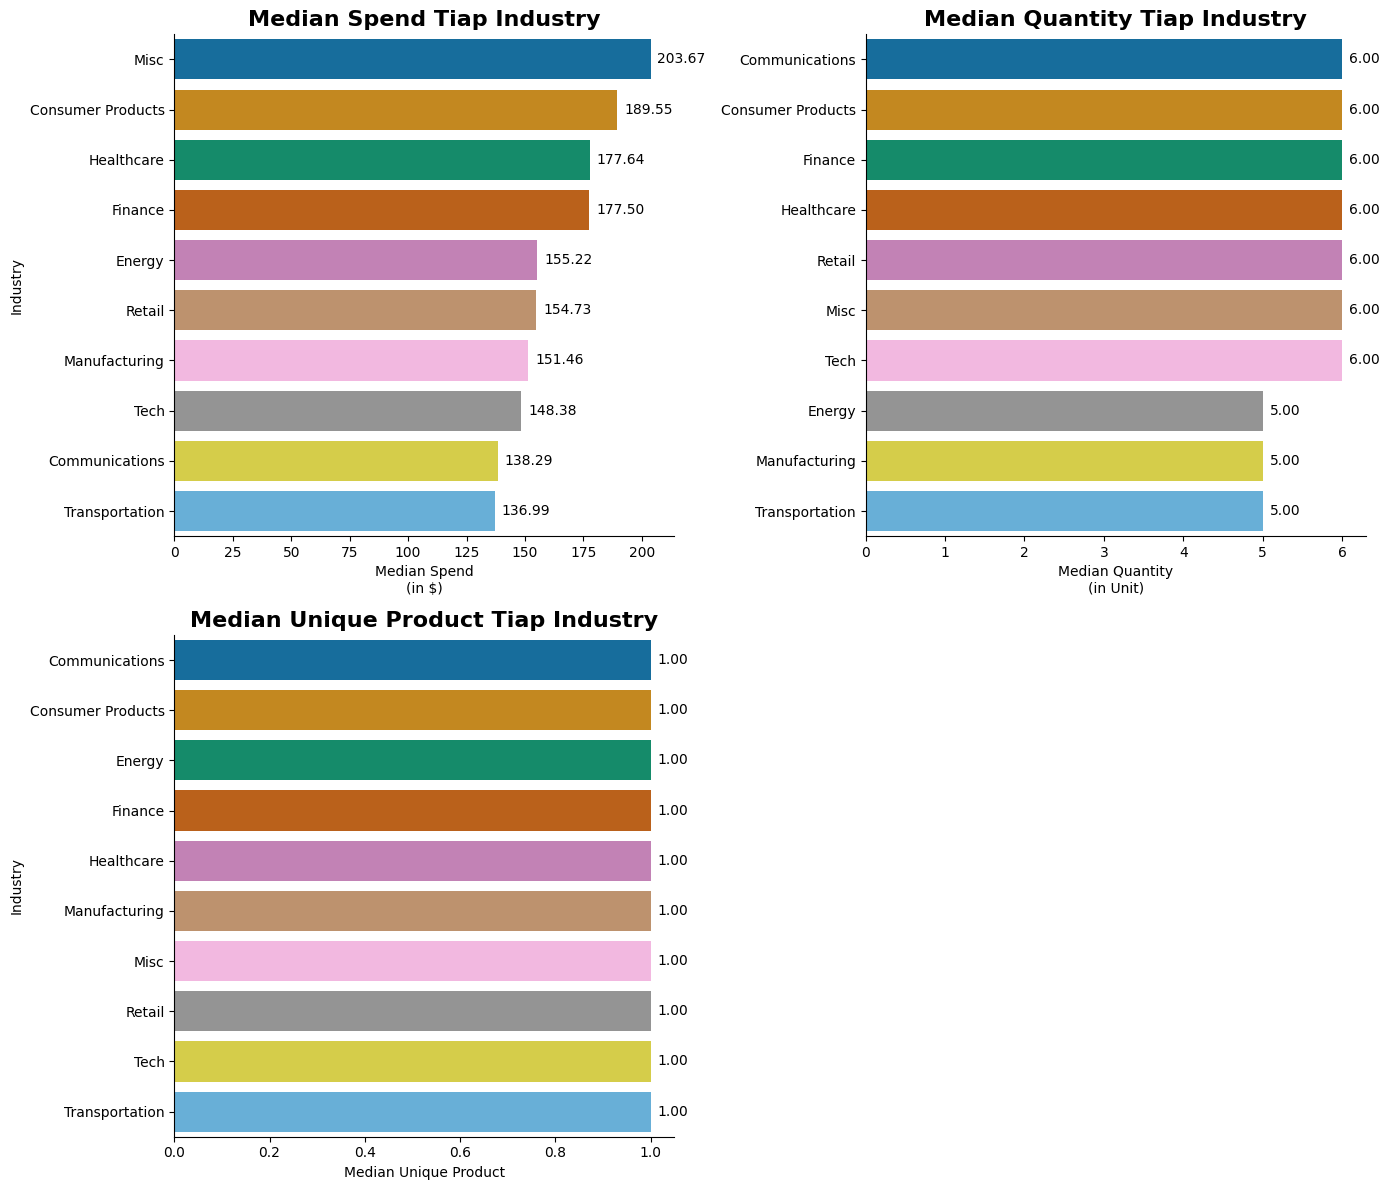

In [724]:
df_Order_ID_Industry = df_2.groupby(['Industry','Order ID'], as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Volume=('Quantity', 'sum'),
    Unique_Product=('Product', 'nunique')
)
df_Order_ID_Industry = df_Order_ID_Industry.groupby('Industry', as_index=False)[['Total_Sales', 'Total_Volume', 'Unique_Product']].median()
fig, axes = plt.subplots(2,2,figsize=(14,12))

# Median Total Spend per Transaction
sns.barplot(
    data=df_Order_ID_Industry.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Industry',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Median Spend\n(in $)',
    ylabel='Industry',
    title='Median Spend Tiap Industry'
)
axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold') 
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Quantity per Transaction
sns.barplot(
    data=df_Order_ID_Industry.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Industry',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Median Quantity\n(in Unit)',
    ylabel='',
    title='Median Quantity Tiap Industry'
)
axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold') 
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Unique Products per Transaction
sns.barplot(
    data=df_Order_ID_Industry.sort_values('Unique_Product', ascending=False),
    x='Unique_Product',
    y='Industry',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Unique Product',
    ylabel='Industry',
    title='Median Unique Product Tiap Industry'
)
axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold') 
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis transaksi tiap-tiap `Segment`

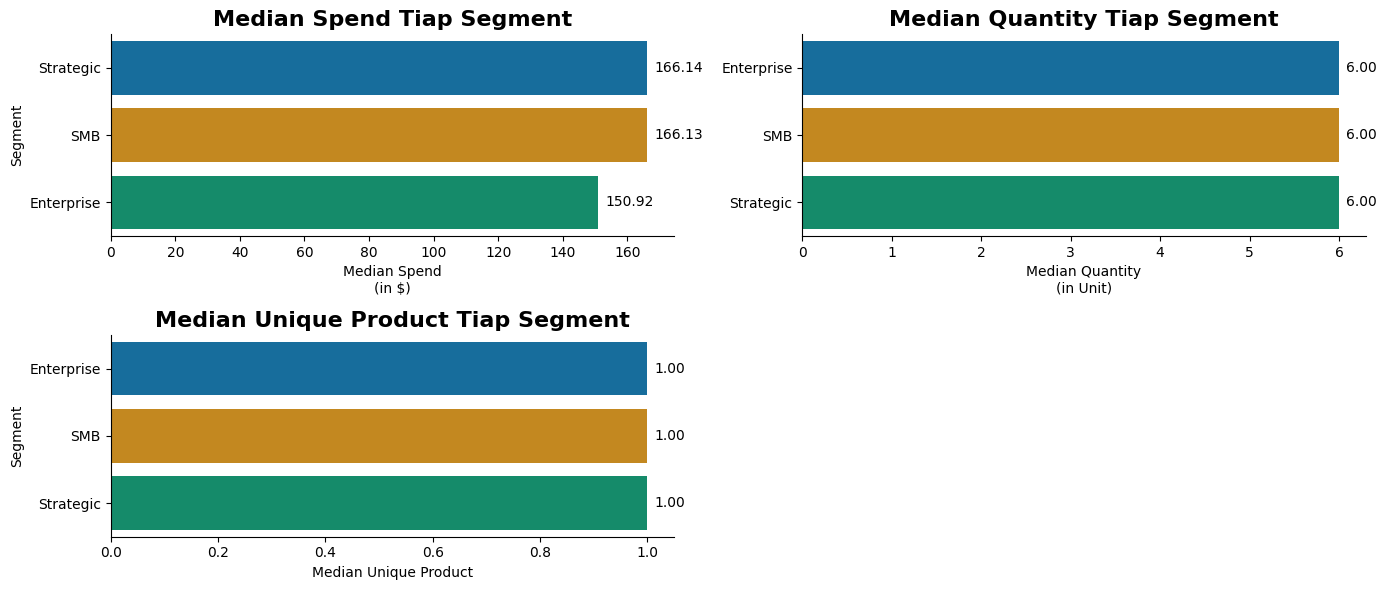

In [725]:
df_Order_ID_Segment = df_2.groupby(['Segment','Order ID'], as_index=False).agg(
    Total_Sales=('Sales (PV)', 'sum'),
    Total_Volume=('Quantity', 'sum'),
    Unique_Product=('Product', 'nunique')
)
df_Order_ID_Segment = df_Order_ID_Segment.groupby('Segment', as_index=False)[['Total_Sales', 'Total_Volume', 'Unique_Product']].median()
fig, axes = plt.subplots(2,2,figsize=(14,6))

# Median Total Spend per Transaction
sns.barplot(
    data=df_Order_ID_Segment.sort_values('Total_Sales', ascending=False),
    x='Total_Sales',
    y='Segment',
    ax=axes[0,0],
    palette='colorblind'
)

axes[0,0].set(
    xlabel='Median Spend\n(in $)',
    ylabel='Segment',
    title='Median Spend Tiap Segment'
)
axes[0,0].title.set_fontsize(16)  
axes[0,0].title.set_fontweight('bold') 
despine(axes[0,0])
annotate_bar(axes[0,0], 'barh')

# Median Quantity per Transaction
sns.barplot(
    data=df_Order_ID_Segment.sort_values('Total_Volume', ascending=False),
    x='Total_Volume',
    y='Segment',
    ax=axes[0,1],
    palette='colorblind'
)

axes[0,1].set(
    xlabel='Median Quantity\n(in Unit)',
    ylabel='',
    title='Median Quantity Tiap Segment'
)
axes[0,1].title.set_fontsize(16)  
axes[0,1].title.set_fontweight('bold') 
despine(axes[0,1])
annotate_bar(axes[0,1], 'barh')

# Median Unique Products per Transaction
sns.barplot(
    data=df_Order_ID_Segment.sort_values('Unique_Product', ascending=False),
    x='Unique_Product',
    y='Segment',
    ax=axes[1,0],
    palette='colorblind'
)

axes[1,0].set(
    xlabel='Median Unique Product',
    ylabel='Segment',
    title='Median Unique Product Tiap Segment'
)
axes[1,0].title.set_fontsize(16)  
axes[1,0].title.set_fontweight('bold') 
despine(axes[1,0])
annotate_bar(axes[1,0], 'barh')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### 7. Analisis berdasarkan `Discount`

Akan dilakukan uji korelasi dengan metode `spearman` terlebih dahulu untuk mencari korelasi nilai `Discount` terhadap variabel numerik lain yang ada.

In [726]:
df[['Discount', 'Profit (PV)', 'Quantity', 'Sales (PV)']].corr(method='spearman')

Discount  Profit (PV)  Quantity  Sales (PV)
Discount     1.000000    -0.543345 -0.000878   -0.057163
Profit (PV) -0.543345     1.000000  0.234144    0.518724
Quantity    -0.000878     0.234144  1.000000    0.327091
Sales (PV)  -0.057163     0.518724  0.327091    1.000000

Berdasarkan hasil diatas, didapat bahwa **secara general `Discount` hanya berkorelasi negatif agak kuat untuk variabel `Profit` saja dan tidak berkorelasi (korelasi mendekati 0) terhadap variabel `Quantity` dan `Sales`**. Hal ini menandakan bahwa dari dataset yang tersedia, `Discount` bukan menjadi salah satu faktor dalam menaikkan sales suatu produk.

Akan dilakukan analisis korelasi dengan `Region`, `Subregion`, `Industry`, `Segment`, serta `Product` untuk mencari tahu apakah dengan adanya `Discount`, median untuk `Quantity` dan `Sales` dari masing-masing variabel tersebut berkorelasi.

In [727]:
# Analisis Region
df.groupby(['Region','Discount'], as_index=False)[['Quantity', 'Sales (PV)']].median().corr(method='spearman', numeric_only=True)

Discount  Quantity  Sales (PV)
Discount    1.000000  0.177691   -0.166450
Quantity    0.177691  1.000000    0.325545
Sales (PV) -0.166450  0.325545    1.000000

In [728]:
# Analisis Subregion
df.groupby(['Subregion','Discount'], as_index=False)[['Quantity', 'Sales (PV)']].median().corr(method='spearman', numeric_only=True)

Discount  Quantity  Sales (PV)
Discount    1.000000  0.071276   -0.063835
Quantity    0.071276  1.000000    0.070769
Sales (PV) -0.063835  0.070769    1.000000

In [729]:
# Analisis Industry
df.groupby(['Industry','Discount'], as_index=False)[['Quantity', 'Sales (PV)']].median().corr(method='spearman', numeric_only=True)

Discount  Quantity  Sales (PV)
Discount    1.000000  0.145564   -0.465959
Quantity    0.145564  1.000000    0.276824
Sales (PV) -0.465959  0.276824    1.000000

In [730]:
# Analisis Segment
df.groupby(['Segment','Discount'], as_index=False)[['Quantity', 'Sales (PV)']].median().corr(method='spearman', numeric_only=True)

Discount  Quantity  Sales (PV)
Discount    1.000000  0.107769   -0.404340
Quantity    0.107769  1.000000    0.230702
Sales (PV) -0.404340  0.230702    1.000000

In [731]:
# Analisis Product
df.groupby(['Product','Discount'], as_index=False)[['Quantity', 'Sales (PV)']].median().corr(method='spearman', numeric_only=True)

Discount  Quantity  Sales (PV)
Discount    1.000000  0.145530    0.081486
Quantity    0.145530  1.000000   -0.124596
Sales (PV)  0.081486 -0.124596    1.000000

In [732]:
# Analisis Customer
df.groupby(['Customer','Discount'], as_index=False)[['Quantity', 'Sales (PV)']].median().corr(method='spearman', numeric_only=True)

Discount  Quantity  Sales (PV)
Discount    1.000000  0.093522   -0.422944
Quantity    0.093522  1.000000    0.188531
Sales (PV) -0.422944  0.188531    1.000000

Berdasarkan hasil diatas, didapat kesimpulan bahwa dari masing-masing variabel yang ada, dengan adanya discount **tidak berpengaruh dengan volume sales maupun sales** untuk tiap-tiap product. Hal ini menandakan **Strategi marketing menggunakan Discount kurang efektif**. Akan dilakukan analisis `Discount` dengan hasil `Profit` yang didapat.

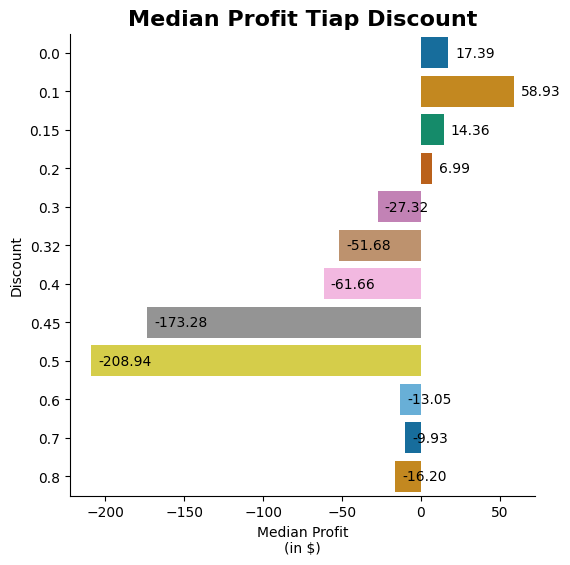

In [733]:
DiscProf = df.groupby('Discount', as_index=False)[['Profit (PV)']].median()

fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(
    data=DiscProf,
    x='Profit (PV)',
    y='Discount',
    ax=ax,
    palette='colorblind',
    orient='h'
)

ax.set(
    xlabel='Median Profit\n(in $)',
    ylabel='Discount',
    title='Median Profit Tiap Discount'
)

ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')

despine(ax)
annotate_bar(ax, 'barh')

plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. Secara tipikal (*median*), `Discount` diatas 20% akan **menghasilkan kerugian (profit negatif)**
> 1. Secara tipikal (*median*), `Discount` yang menghasilkan kerugian tertinggi berada pada 50%

Salah satu faktor penyebab kerugian akibat `Discount` adalah nilai `Discount` yang melebihi nilai *Break-Even Discount*. Nilai tersebut melambangkan suatu faktor dimana harga akhir atau `Sales` sama dengan biaya atau `Cost` dengan kata lain **suatu faktor pengkali dimana suatu transaksi tidak mengalami untung maupun rugi**. *Break-Even Discount* dapat dihitung dengan:
$$
\text{Break-Even Discount} = \frac{{(\text{Unit Price} \times \text{Quantity}) - (\text{Cost} \times \text{Quantity})}}{{\text{Unit Price} \times \text{Quantity}}}
$$
Akan dilakukan perhitungan *Break-Even Discount* serta melakukan analisis untuk tiap transaksi.

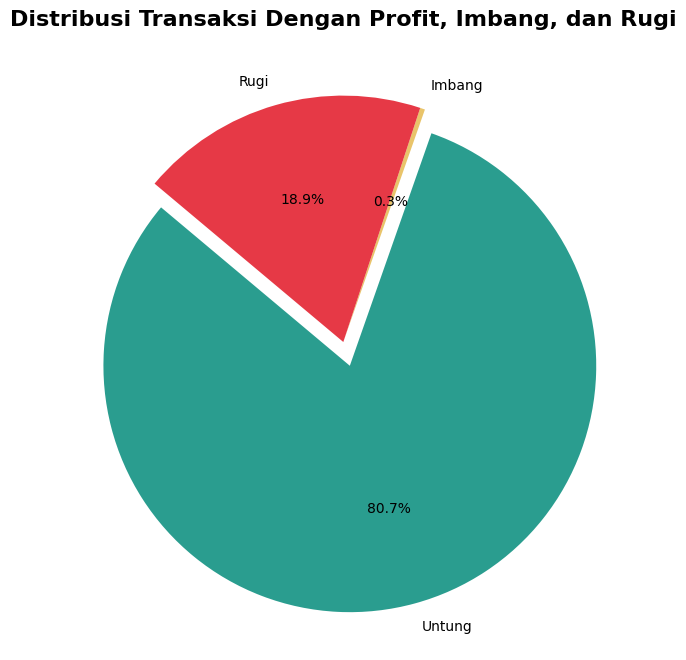

In [734]:
UntungRugi = df_3[['Untung', 'Imbang', 'Rugi']].sum()
sizes = [UntungRugi['Untung'], UntungRugi['Imbang'], UntungRugi['Rugi']]
labels = ['Untung', 'Imbang', 'Rugi']
colors = ['#2a9d8f', '#e9c46a', '#e63946']

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=(0.1, 0, 0)
)
plt.title('Distribusi Transaksi Dengan Profit, Imbang, dan Rugi', fontsize=16, fontweight='bold')

plt.show()

Berdasarkan grafik diatas, didapat ***insight***:
> 1. Perlu dilakukannya analisis Break-Even discount sebelum ditetapkan angka discount untuk setiap transaksi

---
## ***Conclusions and Recommendations***

Dari analisis yang telah dilakukan, dapat dibentuk kesimpulan:
1. Dibutuhkan strategi penjualan secara spesifik untuk region APJ, terutama subregion ANZ dan JAPN dikarenakan **tingkat dan volume performa penjualan yang lebih rendah signifikan dari region-region lainnya serta**
1. Dibutuhkan strategi penyusunan *Discount* dan *Unit Price* yang lebih sesuai terutama untuk region APJ, subregion ANZ dan JAPN dikarenakan **kedua subregion tersebut menyebabkan kerugian dari keseluruhan penjualan**
1. Tingkat dan volume performa penjualan **tidak dipengaruhi oleh industri customer**
1. Seluruh industri memiliki tingkat **profitabilitas yang sama**
1. Pemilihan produk **tidak dipengaruhi oleh industri, segment, region, maupun subregion**
1. Discount tidak mempengaruhi volume penjualan

Rekomendasi:
1. Strategi marketing terkhusus untuk region APJ
1. Mengganti diskon sebagai strategi marketing
1. Mengkonsiderasi Break-Even discount untuk setiap transaksi
1. Dengan menggunakan daya beli segmen market, dapat dibentuk strategi market berupa bundling top product